In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import random
from tensorflow.keras.models import load_model

In [2]:
ref_image1 = cv2.imread('./090523_checkerboard_2/left/Left_7850nm.png',0)
ref_image2 = cv2.imread('./090523_checkerboard_2/right/Right_7850nm.png',0)

CHECKERBOARD = (6,7)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001) #maxiter = 30, epsilon = 0.0001

objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
# Defining checkerboard dimensions and size in real world coordinates (in mm)
objp = objp*4.235 + [[[4.235, 4.235, 0]]]
objp = objp.astype('float32')
objp

array([[[ 4.235   ,  4.235   ,  0.      ],
        [ 8.47    ,  4.235   ,  0.      ],
        [12.705   ,  4.235   ,  0.      ],
        [16.94    ,  4.235   ,  0.      ],
        [21.175001,  4.235   ,  0.      ],
        [25.410002,  4.235   ,  0.      ],
        [ 4.235   ,  8.47    ,  0.      ],
        [ 8.47    ,  8.47    ,  0.      ],
        [12.705   ,  8.47    ,  0.      ],
        [16.94    ,  8.47    ,  0.      ],
        [21.175001,  8.47    ,  0.      ],
        [25.410002,  8.47    ,  0.      ],
        [ 4.235   , 12.705   ,  0.      ],
        [ 8.47    , 12.705   ,  0.      ],
        [12.705   , 12.705   ,  0.      ],
        [16.94    , 12.705   ,  0.      ],
        [21.175001, 12.705   ,  0.      ],
        [25.410002, 12.705   ,  0.      ],
        [ 4.235   , 16.94    ,  0.      ],
        [ 8.47    , 16.94    ,  0.      ],
        [12.705   , 16.94    ,  0.      ],
        [16.94    , 16.94    ,  0.      ],
        [21.175001, 16.94    ,  0.      ],
        [25

# Left Camera Calibration

In [3]:
objpoints1 = []
imgpoints1 = []

img = cv2.imread("./090523_checkerboard_2/left/Left_7850nm.png", 0)
ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

print(ret)
print("")
if ret == True:
    objpoints1.append(objp)
    # refining pixel coordinates for given 2d points.
    corners2 = cv2.cornerSubPix(img, corners, (11,11),(-1,-1), criteria)
         
    imgpoints1.append(corners2)
 
    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)

images = glob.glob('./090523_checkerboard_2/left/Left*850nm.png')
for fname in images:
    img = cv2.imread(fname, 0)
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    print(ret)
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints1.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(img, corners, (11,11),(-1,-1), criteria)
         
        imgpoints1.append(corners2)
 
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
        
#         cv2.imshow('img', img)
#         cv2.waitKey(0)

#         cv2.destroyAllWindows()

True

True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [4]:
        """
        Performing camera calibration by 
        passing the value of known 3D points (objpoints)
        and corresponding pixel coordinates of the 
        detected corners (imgpoints)
        """
ret1, mtx1, dist1, rvecs1, tvecs1 = cv2.calibrateCamera(objpoints1, imgpoints1, ref_image1.shape[::-1], None, None)

print(" ")
print("Reprojection error : \n")
print(ret1)
print("Camera matrix : \n")
print(mtx1)
print("dist : \n")
print(dist1)
print("rvecs : \n")
print(rvecs1)
print("tvecs : \n")
print(tvecs1)

 
Reprojection error : 

0.5439627408432801
Camera matrix : 

[[2.32129063e+03 0.00000000e+00 6.25384911e+02]
 [0.00000000e+00 2.30275672e+03 4.97085395e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-3.71562416e-02 -4.19030584e-01  1.65638727e-03 -1.59739572e-02
   2.21043762e+00]]
rvecs : 

(array([[ 0.16348057],
       [-0.17861793],
       [-1.57886737]]), array([[ 0.17414025],
       [-0.18789145],
       [-1.59624892]]), array([[ 0.14476907],
       [-0.20084549],
       [-1.55708622]]), array([[ 0.14768669],
       [-0.17903322],
       [-1.53879886]]), array([[ 0.15816203],
       [-0.1783695 ],
       [-1.55156473]]), array([[ 0.15310982],
       [-0.17427989],
       [-1.518214  ]]), array([[ 0.15345994],
       [-0.17831916],
       [-1.52988619]]), array([[ 0.15368572],
       [-0.19004122],
       [-1.51718669]]), array([[-0.00719538],
       [ 0.03653   ],
       [-1.66595699]]), array([[-0.03869273],
       [ 0.01994234],
       [-1.55600175]]), array([

In [5]:
#undistortion
img = cv2.imread('./Left_Sample850nm.png')
h,  w = img.shape[:2]
newcameramtx1, roi = cv2.getOptimalNewCameraMatrix(mtx1, dist1, (w,h), 1, (w,h))

# # undistort
# dst = cv2.undistort(img, mtx1, dist1, None, newcameramtx1)
# dst = cv2.resize(dst, (0,0), fx = 0.5, fy = 0.5)

# cv2.imshow('dst', dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [6]:
#reprojection error
mean_error = 0
for i in range(len(objpoints1)):
    imgpoints2_, _ = cv2.projectPoints(objpoints1[i], rvecs1[i], tvecs1[i], mtx1, dist1)
    error = cv2.norm(imgpoints1[i], imgpoints2_, cv2.NORM_L2)/len(imgpoints2_)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints1)) )

total error: 0.08343948453051139


# Right Camera Calibration

In [7]:
objpoints2 = []
imgpoints2 = []

img = cv2.imread("./090523_checkerboard_2/right/Right_7850nm.png", 0)
ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

print(ret)
print("")
if ret == True:
    objpoints2.append(objp)
    # refining pixel coordinates for given 2d points.
    corners2 = cv2.cornerSubPix(img, corners, (11,11),(-1,-1), criteria)
         
    imgpoints2.append(corners2)
 
    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)



images = glob.glob("./090523_checkerboard_2/right/Right_*850nm.png")
for fname in images:
    img = cv2.imread(fname, 0)
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    print(ret)
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints2.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(img, corners, (11,11),(-1,-1), criteria)
         
        imgpoints2.append(corners2)
 
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
        
#         cv2.imshow('img', img)
#         cv2.waitKey(0)

#         cv2.destroyAllWindows()

True

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [8]:
        """
        Performing camera calibration by 
        passing the value of known 3D points (objpoints)
        and corresponding pixel coordinates of the 
        detected corners (imgpoints)
        """
ret2, mtx2, dist2, rvecs2, tvecs2 = cv2.calibrateCamera(objpoints2, imgpoints2, ref_image2.shape[::-1], None, None)

print(" ")
print("Reprojection error : \n")
print(ret2)
print("Camera matrix : \n")
print(mtx2)
print("dist : \n")
print(dist2)
print("rvecs : \n")
print(rvecs2)
print("tvecs : \n")
print(tvecs2)

 
Reprojection error : 

0.5679182150943587
Camera matrix : 

[[2.00780317e+03 0.00000000e+00 9.24269095e+02]
 [0.00000000e+00 1.98517482e+03 5.34197443e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-0.0812288  -0.19315014 -0.00052123  0.00874037  0.40406093]]
rvecs : 

(array([[-0.17232032],
       [ 0.17001086],
       [-1.57346225]]), array([[-0.16727725],
       [ 0.19087797],
       [-1.54658262]]), array([[-0.11866293],
       [ 0.16381876],
       [-1.55761288]]), array([[-0.37187936],
       [ 0.36876828],
       [-1.52109646]]), array([[-0.36179386],
       [ 0.37393742],
       [-1.52732909]]), array([[-0.25384046],
       [ 0.37922375],
       [-1.5674017 ]]), array([[-0.33538017],
       [ 0.35475463],
       [-1.5706893 ]]), array([[-0.36506763],
       [ 0.35396669],
       [-1.603272  ]]), array([[-0.39602892],
       [ 0.38551584],
       [-1.68350011]]), array([[-0.41994233],
       [ 0.39557201],
       [-1.54220132]]), array([[-0.37653773],
       

In [9]:
#undistortion
img = cv2.imread('./Right_Sample850nm.png')
h,  w = img.shape[:2]
newcameramtx2, roi = cv2.getOptimalNewCameraMatrix(mtx2, dist2, (w,h), 1, (w,h))

# # undistort
# dst = cv2.undistort(img, mtx2, dist2, None, newcameramtx2)
# dst = cv2.resize(dst, (0,0), fx = 0.5, fy = 0.5)

# cv2.imshow('dst', dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [10]:
#reprojection error
mean_error = 0
for i in range(len(objpoints2)):
    imgpoints2_, _ = cv2.projectPoints(objpoints2[i], rvecs2[i], tvecs2[i], mtx2, dist2)
    error = cv2.norm(imgpoints2[i], imgpoints2_, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints2)) )

total error: 0.12119775554027437


#  

# Keypoint Detection

In [11]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

1/1 [==============================] - 2s 2s/step


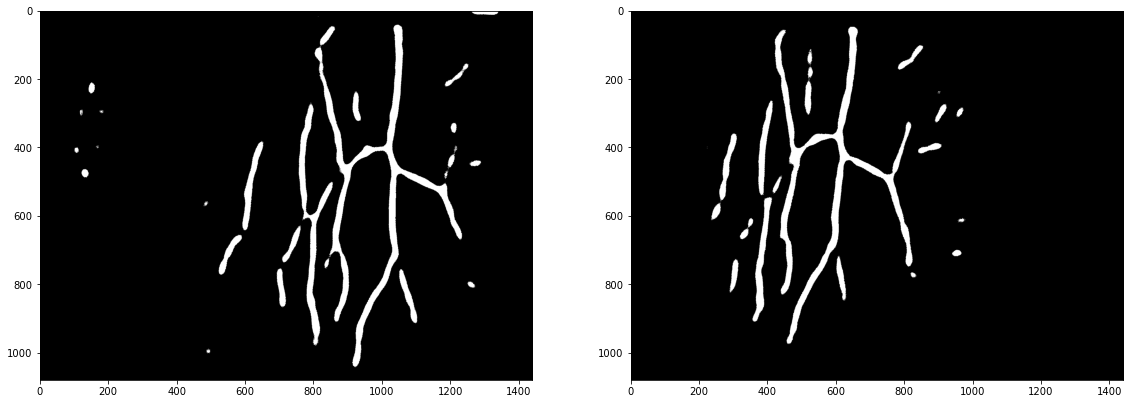

In [13]:
vein_l = cv2.imread(r"./09_05_23/Left_shubham2850nm.png",0)
vein_r = cv2.imread(r"./09_05_23/Right_shubham2850nm.png",0)

vein_l = cv2.undistort(vein_l,mtx1,dist1,None,newcameramtx1)
vein_r = cv2.undistort(vein_r,mtx2,dist2,None,newcameramtx2)

autoencoder_vein = load_model("./server output h5 file/trial_error_vein_train12.h5")

vein_l_input = vein_l.reshape((1,1080, 1440,1)).astype('float32') / 255.
vein_r_input = vein_r.reshape((1,1080, 1440,1)).astype('float32') / 255.

vein_proc_l = autoencoder_vein.predict(vein_l_input)
vein_proc_l = (vein_proc_l.reshape((1080, 1440)) * 255 ).astype('uint8')
vein_proc_r = autoencoder_vein.predict(vein_r_input)
vein_proc_r = (vein_proc_r.reshape((1080, 1440)) * 255 ).astype('uint8')

vein_proc_l = cv2.GaussianBlur(vein_proc_l,(75,75),0)
vein_proc_r = cv2.GaussianBlur(vein_proc_r,(75,75),0)

vein_proc_l = cv2.adaptiveThreshold(vein_proc_l, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 35, 5)
vein_proc_r = cv2.adaptiveThreshold(vein_proc_r, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 35, 5)

# vein_proc_l = sp_noise(vein_proc_l, 0.1)
# vein_proc_r = sp_noise(vein_proc_r, 0.1)

# clahe = cv2.createCLAHE(clipLimit = 8)

# feat1 = clahe.apply(vein_l)
# feat2 = clahe.apply(vein_r)

feat1 = vein_proc_l
feat2 = vein_proc_r

plt.figure(figsize=(30,10))

ax = plt.subplot(1,3,1)

plt.imshow(vein_proc_l,cmap='gray')
# plt.imshow(feat1,cmap='gray')

# target image

ax = plt.subplot(1,3,2)
plt.imshow(vein_proc_r,cmap='gray')
# plt.imshow(feat2,cmap='gray')

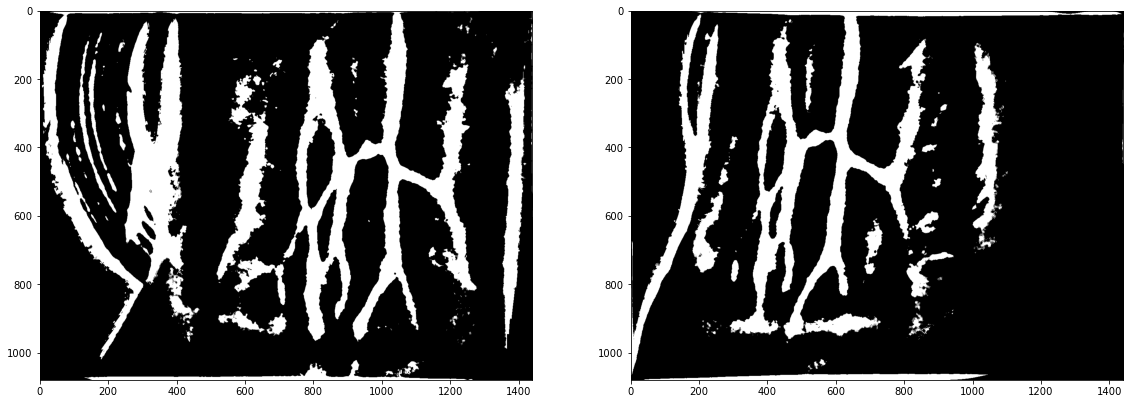

In [28]:
vein_l = cv2.imread(r"./09_05_23/Left_shubham2850nm.png",0)
vein_r = cv2.imread(r"./09_05_23/Right_shubham2850nm.png",0)

vein_l = cv2.undistort(vein_l,mtx1,dist1,None,newcameramtx1)
vein_r = cv2.undistort(vein_r,mtx2,dist2,None,newcameramtx2)

vein_proc_l = vein_l
vein_proc_r = vein_r

# autoencoder_vein = load_model("./server output h5 file/trial_error_vein_train12.h5")

# vein_l_input = vein_l.reshape((1,1080, 1440,1)).astype('float32') / 255.
# vein_r_input = vein_r.reshape((1,1080, 1440,1)).astype('float32') / 255.

# vein_proc_l = autoencoder_vein.predict(vein_l_input)
# vein_proc_l = (vein_proc_l.reshape((1080, 1440)) * 255 ).astype('uint8')
# vein_proc_r = autoencoder_vein.predict(vein_r_input)
# vein_proc_r = (vein_proc_r.reshape((1080, 1440)) * 255 ).astype('uint8')

# vein_proc_l = cv2.GaussianBlur(vein_proc_l,(75,75),0)
# vein_proc_r = cv2.GaussianBlur(vein_proc_r,(75,75),0)

vein_proc_l = cv2.adaptiveThreshold(vein_proc_l, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 255, 5)
vein_proc_r = cv2.adaptiveThreshold(vein_proc_r, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 255, 5)

# vein_proc_l = sp_noise(vein_proc_l, 0.1)
# vein_proc_r = sp_noise(vein_proc_r, 0.1)

clahe = cv2.createCLAHE(clipLimit = 8)

feat1 = clahe.apply(vein_l)
feat2 = clahe.apply(vein_r)

feat1 = cv2.GaussianBlur(feat1,(15,15),0)
feat2 = cv2.GaussianBlur(feat2,(15,15),0)

feat1 = cv2.adaptiveThreshold(feat1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 205, 5)
feat2 = cv2.adaptiveThreshold(feat2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 205, 5)

plt.figure(figsize=(30,10))

ax = plt.subplot(1,3,1)

# plt.imshow(vein_proc_l,cmap='gray')
plt.imshow(feat1,cmap='gray')

# target image

ax = plt.subplot(1,3,2)
# plt.imshow(vein_proc_r,cmap='gray')
plt.imshow(feat2,cmap='gray')

In [29]:
#scaling down the images
scale = 1
widthl = int(feat1.shape[1]/scale)
heightl = int(feat1.shape[0]/scale)
diml = (widthl, heightl)
img1 = cv2.resize(feat1, diml, cv2.INTER_AREA)

widthr = int(feat2.shape[1]/scale)
heightr = int(feat2.shape[0]/scale)
dimr = (widthr, heightr)
img2 = cv2.resize(feat2, dimr, cv2.INTER_AREA)

In [30]:
orb = cv2.ORB_create(nfeatures = 1500, edgeThreshold = 30, patchSize = 30, WTA_K = 4)

KeyPoints1 = orb.detect(img1, None)
KeyPoints2 = orb.detect(img2, None)
len(KeyPoints1)

1500

In [31]:
beblid = cv2.xfeatures2d.BEBLID_create(0.75)

KeyPoints1, des1 = beblid.compute(img1, KeyPoints1)
KeyPoints2, des2 = beblid.compute(img2, KeyPoints2)

In [32]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING2, crossCheck= False)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
len(matches)

1500

In [26]:
# nn_matches = bf.knnMatch(des1, des2, 2)
# matched1 = []
# matched2 = []
# good_matches = []
# nn_match_ratio = 0.8  # Nearest neighbor matching ratio
# for m, n in nn_matches:
#     if m.distance < nn_match_ratio * n.distance:
# #         matched1.append(KeyPoints1[m.queryIdx])
# #         matched2.append(KeyPoints2[m.trainIdx])
#         good_matches.append(m)

In [ ]:
# inliers1 = []
# inliers2 = []
# good_matches = []
# inlier_threshold = 2.5  # Distance threshold to identify inliers with homography check
# for i, m in enumerate(matched1):
#     # Create the homogeneous point
#     col = np.ones((3, 1), dtype=np.float64)
#     col[0:2, 0] = m.pt
#     # Project from image 1 to image 2
#     col = np.dot(homography, col)
#     col /= col[2, 0]
#     # Calculate euclidean distance
#     dist = sqrt(pow(col[0, 0] - matched2[i].pt[0], 2) + pow(col[1, 0] - matched2[i].pt[1], 2))
#     if dist < inlier_threshold:
#         good_matches.append(cv.DMatch(len(inliers1), len(inliers2), 0))
#         inliers1.append(matched1[i])
#         inliers2.append(matched2[i])

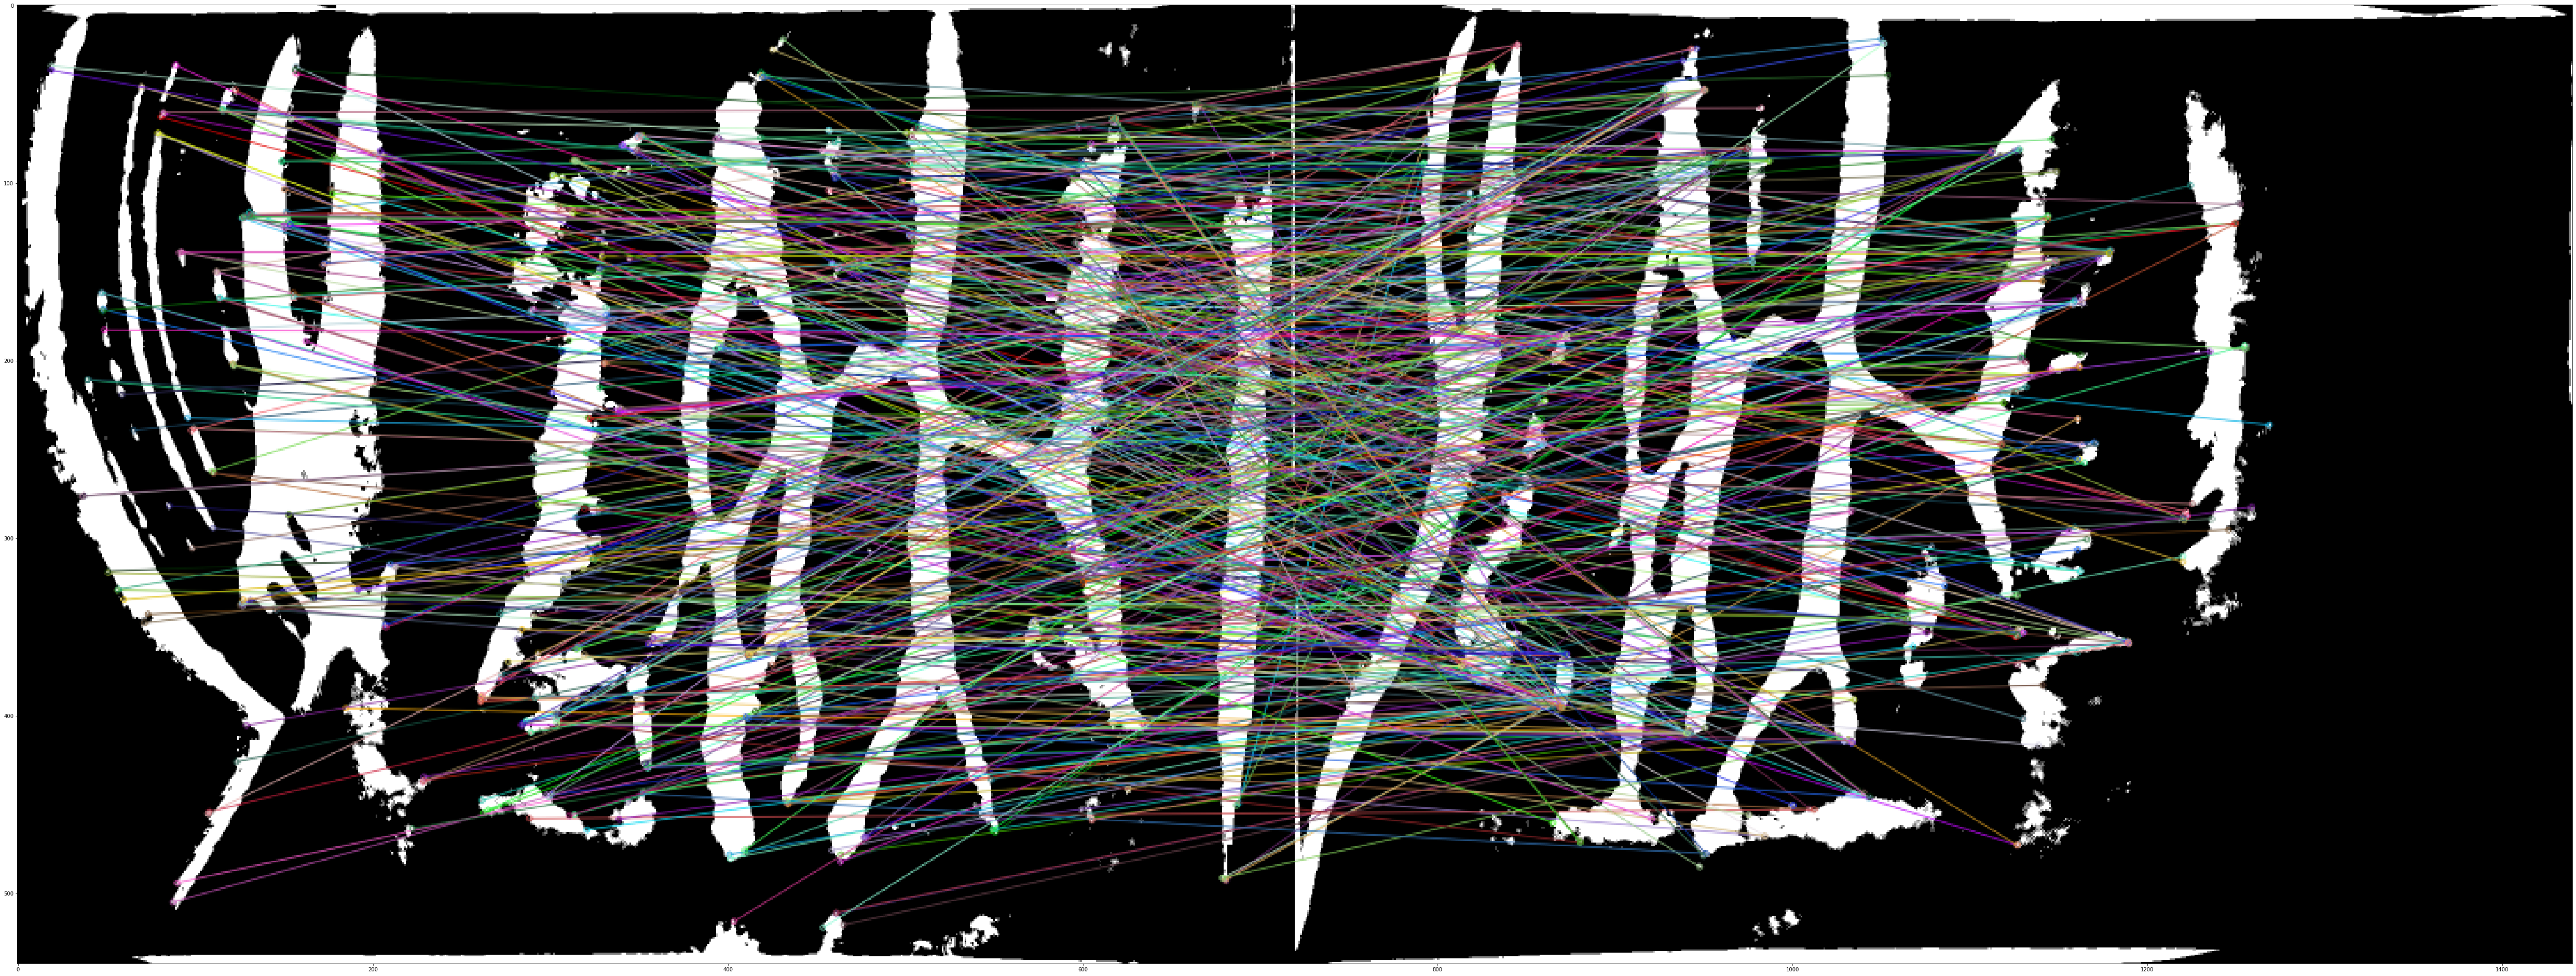

In [35]:
matching_result = cv2.drawMatches(img1, KeyPoints1, img2, KeyPoints2, matches[0:500], None, flags=2)

mr = cv2.resize(matching_result, (0, 0), fx = 0.5, fy = 0.5)
plt.figure(figsize=(300,100))
ax = plt.subplot(1,3,1)
plt.imshow(mr, cmap = 'gray')

p1=[]
p2=[]
for match in matches:
    p1.append([KeyPoints1[match.queryIdx].pt])
    p2.append([KeyPoints2[match.trainIdx].pt])

p1 = np.array(p1)
p2 = np.array(p2)

p1 = p1.reshape(p1.shape[0],2)
p2 = p2.reshape(p2.shape[0],2)

p1 = p1*scale
p2 = p2*scale

# Homography

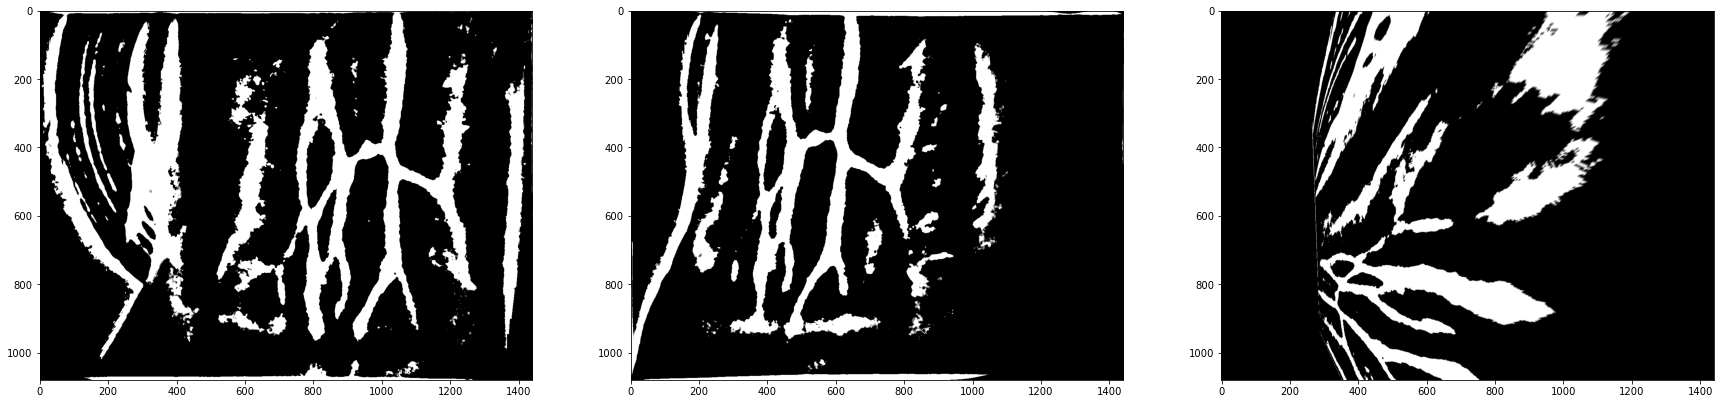

In [34]:
# Homography

h,status = cv2.findHomography(p1, p2, cv2.RANSAC, ransacReprojThreshold = 5, maxIters = 15, confidence = 0.999)

im_out = cv2.warpPerspective(img1,  h, (img1.shape[1],img1.shape[0]))

plt.figure(figsize=(30,10))

ax = plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')

# target image

ax = plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
cv2.imwrite('image_r.png', img2)

ax = plt.subplot(1,3,3)
plt.imshow(im_out,cmap='gray')
cv2.imwrite('homography_out.png', im_out)

im_out = cv2.resize(im_out,(1440,1080))

a_h = np.where(im_out==255)
a_h=np.array(a_h)

pa_h = []
for i in range(len(a_h[0])):
    pa_h32 = (a_h[0][i],a_h[1][i])
    pa_h.append(pa_h32)

pa_h = np.array(pa_h)

In [35]:
# Check the overlap
right = cv2.imread(r"./image_r.png")
hom_left = cv2.imread(r"./homography_out.png")
dst = cv2.addWeighted(right, 0.4, hom_left, 0.9, 0)

# img_arr = np.hstack((img1, img2))
# cv2.imshow('Input Images',img_arr)
cv2.imshow('Blended Image',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Triangulation

In [52]:
a = np.where((img1 < 230) & (img1 > 210))
pa = []
for i in range(len(a[0])):
    pa32 = (a[0][i],a[1][i])
#     print(p32)
    pa.append(pa32)
pa = np.array(pa)
# pa

pa_h = []
for i in range(len(a[0])):
    pa_h32 = np.dot(h,(a[0][i],a[1][i], 1))
    pa_h32 = (pa_h32[0],pa_h32[1])
#     print(pa_h32)
    pa_h.append(pa_h32)
pa_h = np.asarray(pa_h)    

pa.shape

(73366, 2)

In [66]:
# rot1 = cv2.Rodrigues(rvecs1[0])
# rot2 = cv2.Rodrigues(rvecs2[0])

_, R1, t1, _ = cv2.decomposeHomographyMat(h, mtx1)
_, R2, t2, _ = cv2.decomposeHomographyMat(h, mtx2)

In [77]:
#RT matrix for C1 is identity.
RT1 = np.concatenate([R1[2], t1[2]], axis = -1)
P1 = mtx1 @ RT1 #projection matrix for C1
 
#RT matrix for C2 is the R and T obtained from stereo calibration.
RT2 = np.concatenate([R2[2], t2[2]], axis = -1)
P2 = mtx2 @ RT2 #projection matrix for C2

P1[2,:]

array([0.56954177, 0.01382745, 0.82184607, 0.19287075])

In [73]:
def DLT(P1, P2, point1, point2):
    A = [point1[1]*P1[2,:] - P1[1,:],
         P1[0,:] - point1[0]*P1[2,:],
         point2[1]*P2[2,:] - P2[1,:],
         P2[0,:] - point2[0]*P2[2,:]
        ]
    A = np.array(A).reshape((4,4))
    #print('A: ')
    #print(A)
 
    B = A.transpose() @ A
    from scipy import linalg
    U, s, Vh = linalg.svd(B, full_matrices = False)
 
    print('Triangulated point: ')
    print(Vh[3,0:3]/Vh[3,3])
    
    return Vh[3,0:3]/Vh[3,3]

In [74]:
# pa = pa.reshape(len(pa),2)
# pa = np.array(pa)
# pb = pb.reshape(len(pb),2)
# pb=np.array(pb)


p3ds = []
for uv1, uv2 in zip(pa, pa_h):
    _p3d = DLT(P1, P2, uv1, uv2)
#     if _p3d[0]<1440 and _p3d[1]<1440 and _p3d[2]<1440:
    p3ds.append(_p3d)
p3ds = np.array(p3ds)

# p3ds

Triangulated point: 
[-0.5763801   0.00303207  0.49613749]
Triangulated point: 
[-0.57642631  0.00317779  0.49599173]
Triangulated point: 
[-0.57647265  0.00332332  0.49584554]
Triangulated point: 
[-0.57576792  0.00334141  0.49696127]
Triangulated point: 
[-0.57548456  0.00356965  0.49729901]
Triangulated point: 
[-0.57487024  0.00277093  0.49867215]
Triangulated point: 
[-0.5749641   0.00306546  0.49837823]
Triangulated point: 
[-0.57501123  0.00321243  0.49823062]
Triangulated point: 
[-0.57467823  0.00329445  0.49871962]
Triangulated point: 
[-0.57472578  0.00344143  0.49857088]
Triangulated point: 
[-0.57420153  0.00293388  0.49965514]
Triangulated point: 
[-0.5743443   0.00337666  0.49920946]
Triangulated point: 
[-0.57439215  0.00352385  0.49906002]
Triangulated point: 
[-0.57444012  0.00367083  0.49891014]
Triangulated point: 
[-0.57400944  0.00345905  0.49970012]
Triangulated point: 
[-0.5594898  -0.00363173  0.5255543 ]
Triangulated point: 
[-0.55890468 -0.00423042  0.5266941

[-0.53924106 -0.02100854  0.56169917]
Triangulated point: 
[-0.53932103 -0.02061425  0.56148706]
Triangulated point: 
[-0.53936136 -0.02041731  0.56137997]
Triangulated point: 
[-0.53940192 -0.0202205   0.56127219]
Triangulated point: 
[-0.53944272 -0.02002382  0.56116373]
Triangulated point: 
[-0.53948375 -0.01982729  0.56105458]
Triangulated point: 
[-0.53830508 -0.02334629  0.56361924]
Triangulated point: 
[-0.53849419 -0.02235183  0.56312191]
Triangulated point: 
[-0.53853272 -0.02215331  0.56302034]
Triangulated point: 
[-0.5385715  -0.02195492  0.56291807]
Triangulated point: 
[-0.5386105  -0.02175665  0.5628151 ]
Triangulated point: 
[-0.53864975 -0.02155852  0.56271144]
Triangulated point: 
[-0.53868923 -0.02136051  0.56260707]
Triangulated point: 
[-0.53872895 -0.02116264  0.56250202]
Triangulated point: 
[-0.5387689  -0.02096489  0.56239627]
Triangulated point: 
[-0.53880909 -0.02076728  0.56228983]
Triangulated point: 
[-0.53884951 -0.02056981  0.56218269]
Triangulated point

Triangulated point: 
[-0.47963832 -0.0221638   0.64778913]
Triangulated point: 
[-0.47987891 -0.02141615  0.64722941]
Triangulated point: 
[-0.48045397 -0.01967964  0.64588932]
Triangulated point: 
[-0.48053768 -0.0194325   0.645694  ]
Triangulated point: 
[-0.48096197 -0.01820045  0.64470305]
Triangulated point: 
[-0.47801784 -0.02513388  0.65089384]
Triangulated point: 
[-0.47809351 -0.0248813   0.65071886]
Triangulated point: 
[-0.4784779  -0.02362154  0.64982892]
Triangulated point: 
[-0.47879263 -0.02261759  0.64909904]
Triangulated point: 
[-0.4788723  -0.02236715  0.64891409]
Triangulated point: 
[-0.47895238 -0.02211694  0.64872815]
Triangulated point: 
[-0.47944112 -0.0206204   0.64759192]
Triangulated point: 
[-0.47985918 -0.01937968  0.64661824]
Triangulated point: 
[-0.48002913 -0.01888507  0.64622201]
Triangulated point: 
[-0.48054819 -0.01740714  0.64501029]
Triangulated point: 
[-0.48063604 -0.0171617   0.644805  ]
Triangulated point: 
[-0.48314915 -0.01063555  0.6389102

[-0.4752501  -0.00952401  0.64931561]
Triangulated point: 
[-0.47546645 -0.00903801  0.64881424]
Triangulated point: 
[-0.47590363 -0.00806984  0.64780052]
Triangulated point: 
[-0.47634673 -0.00710688  0.64677226]
Triangulated point: 
[-0.47771098 -0.00425002  0.64360173]
Triangulated point: 
[-0.477827   -0.00401417  0.6433318 ]
Triangulated point: 
[-0.50220534  0.03049684  0.58595918]
Triangulated point: 
[-0.5051545   0.03332539  0.57896043]
Triangulated point: 
[-0.50664919  0.03467969  0.57540992]
Triangulated point: 
[-0.51001426  0.03754495  0.56740863]
Triangulated point: 
[-0.5195223   0.04438994  0.54474732]
Triangulated point: 
[-0.46867948 -0.02485853  0.66374853]
Triangulated point: 
[-0.46876362 -0.02459818  0.66355696]
Triangulated point: 
[-0.46893318 -0.02407818  0.66317069]
Triangulated point: 
[-0.46901861 -0.02381852  0.66297599]
Triangulated point: 
[-0.46910446 -0.02355909  0.66278024]
Triangulated point: 
[-0.46936458 -0.02278222  0.66218676]
Triangulated point

[-0.46586981 -0.01802559  0.66541637]
Triangulated point: 
[-0.46678654 -0.01571327  0.66332894]
Triangulated point: 
[-0.46689049 -0.01545779  0.66309197]
Triangulated point: 
[-0.46699485 -0.0152026   0.66285399]
Triangulated point: 
[-0.46709962 -0.0149477   0.66261502]
Triangulated point: 
[-0.4673104  -0.01443881  0.66213409]
Triangulated point: 
[-0.4674164  -0.01418481  0.66189214]
Triangulated point: 
[-0.46752282 -0.01393112  0.6616492 ]
Triangulated point: 
[-0.46762964 -0.01367773  0.66140528]
Triangulated point: 
[-0.46773687 -0.01342464  0.66116037]
Triangulated point: 
[-0.46806099 -0.01266723  0.66041976]
Triangulated point: 
[-0.46816983 -0.01241537  0.66017094]
Triangulated point: 
[-0.46894297 -0.01066124  0.65840207]
Triangulated point: 
[-0.46905501 -0.01041192  0.65814553]
Triangulated point: 
[-0.46916744 -0.01016294  0.65788803]
Triangulated point: 
[-0.46928027 -0.00991427  0.65762959]
Triangulated point: 
[-0.47054703 -0.00720088  0.65472447]
Triangulated point

[-0.45868309 -0.02511005  0.67753988]
Triangulated point: 
[-0.45877573 -0.02484113  0.67733236]
Triangulated point: 
[-0.45886883 -0.02457245  0.67712375]
Triangulated point: 
[-0.45896239 -0.02430402  0.67691404]
Triangulated point: 
[-0.45905641 -0.02403584  0.67670324]
Triangulated point: 
[-0.45915089 -0.02376791  0.67649134]
Triangulated point: 
[-0.45924582 -0.02350023  0.67627836]
Triangulated point: 
[-0.45934121 -0.0232328   0.67606428]
Triangulated point: 
[-0.45943706 -0.02296563  0.67584912]
Triangulated point: 
[-0.45953336 -0.02269872  0.67563288]
Triangulated point: 
[-0.45963011 -0.02243206  0.67541556]
Triangulated point: 
[-0.45972731 -0.02216566  0.67519715]
Triangulated point: 
[-0.45992307 -0.02163366  0.67475712]
Triangulated point: 
[-0.46022008 -0.02083764  0.67408903]
Triangulated point: 
[-0.46031997 -0.02057284  0.6738642 ]
Triangulated point: 
[-0.46042031 -0.02030831  0.6736383 ]
Triangulated point: 
[-0.4605211  -0.02004405  0.67341134]
Triangulated point

[-0.51574848  0.04817695  0.54408544]
Triangulated point: 
[-0.51594226  0.04827648  0.54363396]
Triangulated point: 
[-0.51652392  0.04857192  0.5422786 ]
Triangulated point: 
[-0.51671792  0.04866935  0.54182651]
Triangulated point: 
[-0.51885516  0.04970634  0.53684444]
Triangulated point: 
[-0.45192226 -0.0368244   0.68981985]
Triangulated point: 
[-0.45253513 -0.03458533  0.68847483]
Triangulated point: 
[-0.45447451 -0.02821729  0.6841883 ]
Triangulated point: 
[-0.45474648 -0.0273951   0.68358418]
Triangulated point: 
[-0.45511581 -0.02630212  0.68276283]
Triangulated point: 
[-0.45520933 -0.02602948  0.68255467]
Triangulated point: 
[-0.45530332 -0.02575708  0.68234539]
Triangulated point: 
[-0.45539779 -0.02548492  0.68213499]
Triangulated point: 
[-0.45549272 -0.02521301  0.68192347]
Triangulated point: 
[-0.45558813 -0.02494135  0.68171083]
Triangulated point: 
[-0.45568401 -0.02466993  0.68149708]
Triangulated point: 
[-0.45578036 -0.02439877  0.68128222]
Triangulated point

[-0.45497284 -0.02020327  0.68100511]
Triangulated point: 
[-0.45550905 -0.01886277  0.6798077 ]
Triangulated point: 
[-0.45561766 -0.01859555  0.67956498]
Triangulated point: 
[-0.45572672 -0.01832863  0.67932119]
Triangulated point: 
[-0.45583624 -0.018062    0.67907633]
Triangulated point: 
[-0.45594621 -0.01779567  0.67883041]
Triangulated point: 
[-0.45605662 -0.01752964  0.67858342]
Triangulated point: 
[-0.45616749 -0.01726391  0.67833536]
Triangulated point: 
[-0.4562788  -0.01699849  0.67808625]
Triangulated point: 
[-0.45661543 -0.01620408  0.67733257]
Triangulated point: 
[-0.45764915 -0.0138378   0.67501503]
Triangulated point: 
[-0.4577662  -0.01357648  0.67475235]
Triangulated point: 
[-0.45788367 -0.0133155   0.67448864]
Triangulated point: 
[-0.45800159 -0.01305484  0.6742239 ]
Triangulated point: 
[-0.4583579  -0.01227486  0.67342358]
Triangulated point: 
[-0.45944984 -0.00995317  0.67096808]
Triangulated point: 
[-0.45957328 -0.00969693  0.67069025]
Triangulated point

Triangulated point: 
[-0.45937076 -0.00699199  0.669749  ]
Triangulated point: 
[-0.46002443 -0.00572928  0.66827824]
Triangulated point: 
[-0.46015638 -0.00547787  0.66798121]
Triangulated point: 
[-0.4606882  -0.004476    0.66678356]
Triangulated point: 
[-0.46082215 -0.00422649  0.66648179]
Triangulated point: 
[-0.48456734  0.02800185  0.61248927]
Triangulated point: 
[-0.48474759  0.0281814   0.61207672]
Triangulated point: 
[-0.48510874  0.0285389   0.61125005]
Triangulated point: 
[-0.48565207  0.02907121  0.61000612]
Triangulated point: 
[-0.48583361  0.02924759  0.60959044]
Triangulated point: 
[-0.48784415  0.03115281  0.60498479]
Triangulated point: 
[-0.48821232  0.0314923   0.60414102]
Triangulated point: 
[-0.49458291  0.03693486  0.58952312]
Triangulated point: 
[-0.49496369  0.03723555  0.58864836]
Triangulated point: 
[-0.49515431  0.03738507  0.58821042]
Triangulated point: 
[-0.49938443  0.04053691  0.57848505]
Triangulated point: 
[-0.49957826  0.0406739   0.5780391

[-0.4494026  -0.02206791  0.68918068]
Triangulated point: 
[-0.44951053 -0.02179327  0.68894204]
Triangulated point: 
[-0.44961894 -0.02151893  0.68870228]
Triangulated point: 
[-0.44972784 -0.02124487  0.68846139]
Triangulated point: 
[-0.4498372  -0.0209711   0.68821939]
Triangulated point: 
[-0.44994705 -0.02069762  0.68797628]
Triangulated point: 
[-0.45005737 -0.02042444  0.68773205]
Triangulated point: 
[-0.45016816 -0.02015155  0.68748671]
Triangulated point: 
[-0.45027943 -0.01987896  0.68724026]
Triangulated point: 
[-0.45039117 -0.01960666  0.68699271]
Triangulated point: 
[-0.45050338 -0.01933467  0.68674405]
Triangulated point: 
[-0.45061606 -0.01906297  0.68649429]
Triangulated point: 
[-0.45072921 -0.01879159  0.68624344]
Triangulated point: 
[-0.45084282 -0.0185205   0.68599148]
Triangulated point: 
[-0.45095691 -0.01824973  0.68573844]
Triangulated point: 
[-0.45107145 -0.01797926  0.6854843 ]
Triangulated point: 
[-0.45118647 -0.0177091   0.68522908]
Triangulated point

Triangulated point: 
[-0.44912051 -0.01503143  0.68697839]
Triangulated point: 
[-0.45037601 -0.01235433  0.68419794]
Triangulated point: 
[-0.45141284 -0.01023797  0.68189786]
Triangulated point: 
[-0.45154444 -0.00997506  0.6816057 ]
Triangulated point: 
[-0.45180896 -0.00945033  0.68101829]
Triangulated point: 
[-0.45207522 -0.00892708  0.6804268 ]
Triangulated point: 
[-0.452209   -0.00866602  0.68012953]
Triangulated point: 
[-0.45234322 -0.00840533  0.67983124]
Triangulated point: 
[-0.45247786 -0.00814501  0.67953195]
Triangulated point: 
[-0.45261294 -0.00788508  0.67923165]
Triangulated point: 
[-0.45384785 -0.00556292  0.67648405]
Triangulated point: 
[-0.45398717 -0.00530684  0.67617382]
Triangulated point: 
[-0.49196382  0.03903792  0.59057312]
Triangulated point: 
[-0.50670428  0.04815143  0.55701921]
Triangulated point: 
[-0.50899526  0.04928842  0.55179299]
Triangulated point: 
[-0.50920386  0.04938845  0.55131699]
Triangulated point: 
[-0.51045647  0.04997709  0.5484581

[-0.43669861 -0.03981162  0.71127504]
Triangulated point: 
[-0.43694613 -0.03892758  0.71074472]
Triangulated point: 
[-0.43702977 -0.03863326  0.71056536]
Triangulated point: 
[-0.43763083 -0.03657828  0.70927382]
Triangulated point: 
[-0.43771892 -0.03628548  0.7090842 ]
Triangulated point: 
[-0.43780757 -0.03599289  0.70889331]
Triangulated point: 
[-0.43789676 -0.03570051  0.70870114]
Triangulated point: 
[-0.43816764 -0.03482458  0.70811704]
Triangulated point: 
[-0.43825903 -0.03453302  0.70791982]
Triangulated point: 
[-0.43835096 -0.03424168  0.70772133]
Triangulated point: 
[-0.43844344 -0.03395055  0.70752159]
Triangulated point: 
[-0.43853647 -0.03365964  0.70732059]
Triangulated point: 
[-0.43863004 -0.03336895  0.70711834]
Triangulated point: 
[-0.43872415 -0.03307848  0.70691484]
Triangulated point: 
[-0.4388188  -0.03278823  0.70671009]
Triangulated point: 
[-0.43900973 -0.03220842  0.70629686]
Triangulated point: 
[-0.43920281 -0.03162952  0.70587866]
Triangulated point

[-0.50507438  0.04931441  0.5572972 ]
Triangulated point: 
[-0.5052895   0.04941711  0.55681075]
Triangulated point: 
[-0.50550467  0.04951925  0.55632417]
Triangulated point: 
[-0.50615048  0.04982227  0.55486358]
Triangulated point: 
[-0.50701222  0.05021841  0.55291432]
Triangulated point: 
[-0.50722776  0.05031604  0.5524267 ]
Triangulated point: 
[-0.50765898  0.0505096   0.5514511 ]
Triangulated point: 
[-0.50787465  0.05060554  0.55096313]
Triangulated point: 
[-0.50809036  0.05070092  0.55047505]
Triangulated point: 
[-0.5083061   0.05079573  0.54998686]
Triangulated point: 
[-0.50852189  0.05088999  0.54949856]
Triangulated point: 
[-0.5087377   0.05098369  0.54901016]
Triangulated point: 
[-0.50895356  0.05107682  0.54852166]
Triangulated point: 
[-0.50916944  0.0511694   0.54803306]
Triangulated point: 
[-0.51046541  0.05171312  0.54509952]
Triangulated point: 
[-0.5106815   0.05180179  0.5446103 ]
Triangulated point: 
[-0.51089762  0.0518899   0.544121  ]
Triangulated point

[-0.43913395 -0.020558    0.70246243]
Triangulated point: 
[-0.43925586 -0.02027605  0.70219698]
Triangulated point: 
[-0.43937827 -0.01999443  0.70193037]
Triangulated point: 
[-0.43950118 -0.01971312  0.70166261]
Triangulated point: 
[-0.43962459 -0.01943214  0.70139369]
Triangulated point: 
[-0.44024916 -0.01803216  0.70003188]
Triangulated point: 
[-0.44037556 -0.01775316  0.69975609]
Triangulated point: 
[-0.44050246 -0.0174745   0.69947917]
Triangulated point: 
[-0.44062985 -0.01719617  0.69920112]
Triangulated point: 
[-0.44075773 -0.01691819  0.69892194]
Triangulated point: 
[-0.4408861  -0.01664054  0.69864163]
Triangulated point: 
[-0.44101496 -0.01636324  0.69836019]
Triangulated point: 
[-0.44626182 -0.00609727  0.68685955]
Triangulated point: 
[-4.49750716e-01 -1.63950408e-04  6.79176241e-01]
Triangulated point: 
[-0.45117587  0.00209522  0.67603112]
Triangulated point: 
[-0.46722935  0.02273222  0.64041029]
Triangulated point: 
[-0.48117797  0.0355875   0.60925691]
Triang

Triangulated point: 
[-0.43133983 -0.03407008  0.71714726]
Triangulated point: 
[-0.43153965 -0.03347623  0.7167194 ]
Triangulated point: 
[-0.4316404  -0.03317966  0.71650354]
Triangulated point: 
[-0.43174172 -0.03288333  0.7162864 ]
Triangulated point: 
[-0.43184361 -0.03258723  0.71606797]
Triangulated point: 
[-0.43194605 -0.03229138  0.71584826]
Triangulated point: 
[-0.43204906 -0.03199577  0.71562728]
Triangulated point: 
[-0.43225674 -0.03140529  0.71518149]
Triangulated point: 
[-0.43236142 -0.03111043  0.7149567 ]
Triangulated point: 
[-0.43246665 -0.03081581  0.71473063]
Triangulated point: 
[-0.43257244 -0.03052145  0.7145033 ]
Triangulated point: 
[-0.43300113 -0.0293466   0.71358138]
Triangulated point: 
[-0.43321877 -0.02876075  0.7131129 ]
Triangulated point: 
[-0.4334386  -0.02817598  0.71263943]
Triangulated point: 
[-0.43354933 -0.027884    0.71240083]
Triangulated point: 
[-0.43366061 -0.02759229  0.71216099]
Triangulated point: 
[-0.43377242 -0.02730087  0.7119199

[-0.43307746 -0.02460089  0.71197329]
Triangulated point: 
[-0.43319667 -0.02431097  0.71171621]
Triangulated point: 
[-0.43331641 -0.02402136  0.71145792]
Triangulated point: 
[-0.43343668 -0.02373205  0.71119841]
Triangulated point: 
[-0.43355749 -0.02344305  0.71093769]
Triangulated point: 
[-0.43367883 -0.02315436  0.71067577]
Triangulated point: 
[-0.4338007  -0.02286598  0.71041263]
Triangulated point: 
[-0.43392309 -0.02257791  0.7101483 ]
Triangulated point: 
[-0.43416946 -0.02200272  0.70961603]
Triangulated point: 
[-0.43429343 -0.0217156   0.7093481 ]
Triangulated point: 
[-0.43441793 -0.0214288   0.70907898]
Triangulated point: 
[-0.43466849 -0.02085617  0.70853717]
Triangulated point: 
[-0.43479455 -0.02057035  0.70826449]
Triangulated point: 
[-0.43492112 -0.02028485  0.70799063]
Triangulated point: 
[-0.43504822 -0.01999968  0.70771558]
Triangulated point: 
[-0.43517583 -0.01971485  0.70743936]
Triangulated point: 
[-0.43530395 -0.01943034  0.70716197]
Triangulated point

Triangulated point: 
[-0.43257555 -0.02161148  0.71160177]
Triangulated point: 
[-0.43270216 -0.02132336  0.71132875]
Triangulated point: 
[-0.4328293  -0.02103556  0.71105454]
Triangulated point: 
[-0.43295696 -0.02074809  0.71077913]
Triangulated point: 
[-0.43334309 -0.01988768  0.70994577]
Triangulated point: 
[-0.43347284 -0.01960155  0.70966562]
Triangulated point: 
[-0.43360311 -0.01931576  0.70938428]
Triangulated point: 
[-0.4337339  -0.01903031  0.70910177]
Triangulated point: 
[-0.4338652  -0.0187452   0.70881808]
Triangulated point: 
[-0.43399702 -0.01846043  0.70853322]
Triangulated point: 
[-0.43412936 -0.01817601  0.70824719]
Triangulated point: 
[-0.43426221 -0.01789193  0.70795999]
Triangulated point: 
[-0.43520639 -0.01591332  0.7059172 ]
Triangulated point: 
[-0.43688205 -0.01256304  0.70228542]
Triangulated point: 
[-0.46418132  0.02505105  0.64244421]
Triangulated point: 
[-0.46744099  0.02818601  0.63524525]
Triangulated point: 
[-0.46764686  0.02837707  0.6347903

[-0.42367406 -0.04093601  0.72916169]
Triangulated point: 
[-0.42376568 -0.0406294   0.72896863]
Triangulated point: 
[-0.4238579  -0.04032297  0.7287742 ]
Triangulated point: 
[-0.42395073 -0.04001675  0.72857839]
Triangulated point: 
[-0.42413821 -0.0394049   0.72818269]
Triangulated point: 
[-0.42423285 -0.03909927  0.7279828 ]
Triangulated point: 
[-0.4243281  -0.03879386  0.72778155]
Triangulated point: 
[-0.42442395 -0.03848865  0.72757894]
Triangulated point: 
[-0.4245204  -0.03818365  0.72737498]
Triangulated point: 
[-0.42501163 -0.03666189  0.72633494]
Triangulated point: 
[-0.42521228 -0.03605474  0.72590953]
Triangulated point: 
[-0.4255177  -0.03514572  0.72526141]
Triangulated point: 
[-0.42562068 -0.03484318  0.72504271]
Triangulated point: 
[-0.42572425 -0.03454088  0.72482269]
Triangulated point: 
[-0.42582841 -0.03423882  0.72460134]
Triangulated point: 
[-0.42657381 -0.03213126  0.72301511]
Triangulated point: 
[-0.42679199 -0.03153138  0.72255015]
Triangulated point

[-0.47702365  0.03791362  0.61212047]
Triangulated point: 
[-0.4772444   0.03807344  0.61163308]
Triangulated point: 
[-0.47746532  0.03823267  0.61114529]
Triangulated point: 
[-0.4776864   0.03839129  0.61065711]
Triangulated point: 
[-0.47790764  0.03854931  0.61016854]
Triangulated point: 
[-0.47812905  0.03870672  0.60967958]
Triangulated point: 
[-0.47835062  0.03886353  0.60919023]
Triangulated point: 
[-0.47857235  0.03901974  0.60870051]
Triangulated point: 
[-0.47879424  0.03917534  0.6082104 ]
Triangulated point: 
[-0.47901628  0.03933034  0.60771992]
Triangulated point: 
[-0.47923848  0.03948474  0.60722907]
Triangulated point: 
[-0.47946084  0.03963853  0.60673785]
Triangulated point: 
[-0.47968335  0.03979172  0.60624626]
Triangulated point: 
[-0.47990601  0.0399443   0.60575431]
Triangulated point: 
[-0.48012882  0.04009628  0.605262  ]
Triangulated point: 
[-0.48035178  0.04024766  0.60476934]
Triangulated point: 
[-0.48057489  0.04039843  0.60427632]
Triangulated point

[-0.51440527  0.05629378  0.5287147 ]
Triangulated point: 
[-0.51510158  0.05647851  0.52716726]
Triangulated point: 
[-0.51718845  0.0570028   0.52252839]
Triangulated point: 
[-0.51742011  0.05705831  0.52201332]
Triangulated point: 
[-0.42012326 -0.04340216  0.73449026]
Triangulated point: 
[-0.42048461 -0.04216094  0.73373341]
Triangulated point: 
[-0.4205765 -0.0418511  0.7335407]
Triangulated point: 
[-0.42123713 -0.0396877   0.7321528 ]
Triangulated point: 
[-0.42133398 -0.03937945  0.731949  ]
Triangulated point: 
[-0.42162817 -0.03845597  0.73132935]
Triangulated point: 
[-0.42182735 -0.0378414   0.73090941]
Triangulated point: 
[-0.42192785 -0.03753444  0.73069739]
Triangulated point: 
[-0.42202896 -0.03722771  0.73048402]
Triangulated point: 
[-0.42223299 -0.03661492  0.73005319]
Triangulated point: 
[-0.42233591 -0.03630887  0.72983574]
Triangulated point: 
[-0.42275358 -0.03508701  0.72895248]
Triangulated point: 
[-0.4228595  -0.03478214  0.7287283 ]
Triangulated point: 


[-0.47877456  0.04065446  0.60636145]
Triangulated point: 
[-0.4790017   0.04080504  0.60586167]
Triangulated point: 
[-0.47922897  0.040955    0.60536154]
Triangulated point: 
[-0.47945639  0.04110435  0.60486107]
Triangulated point: 
[-0.47968395  0.04125309  0.60436026]
Triangulated point: 
[-0.47991166  0.04140122  0.60385912]
Triangulated point: 
[-0.4801395   0.04154873  0.60335764]
Triangulated point: 
[-0.48036748  0.04169564  0.60285583]
Triangulated point: 
[-0.48059559  0.04184193  0.6023537 ]
Triangulated point: 
[-0.48082384  0.04198761  0.60185124]
Triangulated point: 
[-0.48105222  0.04213268  0.60134846]
Triangulated point: 
[-0.48128074  0.04227714  0.60084536]
Triangulated point: 
[-0.48150938  0.04242098  0.60034195]
Triangulated point: 
[-0.48173816  0.04256421  0.59983822]
Triangulated point: 
[-0.48196706  0.04270683  0.59933419]
Triangulated point: 
[-0.48219609  0.04284884  0.59882985]
Triangulated point: 
[-0.48242525  0.04299024  0.59832521]
Triangulated point

Triangulated point: 
[-0.41952622 -0.03625874  0.73358579]
Triangulated point: 
[-0.41963271 -0.03595054  0.73336145]
Triangulated point: 
[-0.41973982 -0.03564259  0.73313574]
Triangulated point: 
[-0.41984753 -0.03533487  0.73290868]
Triangulated point: 
[-0.41995585 -0.03502741  0.73268026]
Triangulated point: 
[-0.42006477 -0.03472018  0.73245048]
Triangulated point: 
[-0.4201743  -0.03441321  0.73221936]
Triangulated point: 
[-0.42028443 -0.0341065   0.73198688]
Triangulated point: 
[-0.42061843 -0.03318788  0.73128139]
Triangulated point: 
[-0.42073096 -0.03288219  0.73104354]
Triangulated point: 
[-0.42084409 -0.03257676  0.73080436]
Triangulated point: 
[-0.42095782 -0.0322716   0.73056384]
Triangulated point: 
[-0.42107214 -0.03196671  0.730322  ]
Triangulated point: 
[-0.42118705 -0.03166209  0.73007883]
Triangulated point: 
[-0.42130255 -0.03135774  0.72983433]
Triangulated point: 
[-0.42141865 -0.03105367  0.72958851]
Triangulated point: 
[-0.42153533 -0.03074987  0.7293413

Triangulated point: 
[-0.47396862  0.03889215  0.61500717]
Triangulated point: 
[-0.4741977   0.03905117  0.61450562]
Triangulated point: 
[-0.47442695  0.03920957  0.61400369]
Triangulated point: 
[-0.47465635  0.03936735  0.61350137]
Triangulated point: 
[-0.47488592  0.03952452  0.61299868]
Triangulated point: 
[-0.47511564  0.03968106  0.61249561]
Triangulated point: 
[-0.47534553  0.03983699  0.61199217]
Triangulated point: 
[-0.47557556  0.0399923   0.61148836]
Triangulated point: 
[-0.47580576  0.04014698  0.61098419]
Triangulated point: 
[-0.4760361   0.04030106  0.61047965]
Triangulated point: 
[-0.4762666   0.04045451  0.60997475]
Triangulated point: 
[-0.47649724  0.04060734  0.6094695 ]
Triangulated point: 
[-0.47672803  0.04075955  0.6089639 ]
Triangulated point: 
[-0.47695898  0.04091115  0.60845794]
Triangulated point: 
[-0.47719006  0.04106213  0.60795164]
Triangulated point: 
[-0.47742129  0.04121248  0.607445  ]
Triangulated point: 
[-0.47765267  0.04136222  0.6069380

Triangulated point: 
[-0.42166699 -0.02369988  0.72684359]
Triangulated point: 
[-0.42180084 -0.02340124  0.7265594 ]
Triangulated point: 
[-0.42207023 -0.02280497  0.72598724]
Triangulated point: 
[-0.42234187 -0.02221006  0.72541005]
Triangulated point: 
[-0.42303073 -0.02072885  0.72394525]
Triangulated point: 
[-0.42317017 -0.02043367  0.72364857]
Triangulated point: 
[-0.42331016 -0.02013884  0.72335066]
Triangulated point: 
[-0.4234507  -0.01984437  0.72305152]
Triangulated point: 
[-0.42359179 -0.01955025  0.72275115]
Triangulated point: 
[-0.42373342 -0.01925651  0.72244955]
Triangulated point: 
[-0.4238756  -0.01896312  0.72214674]
Triangulated point: 
[-0.42430541 -0.01808517  0.721231  ]
Triangulated point: 
[-0.42459465 -0.01750173  0.72061445]
Triangulated point: 
[-0.42474008 -0.01721057  0.72030437]
Triangulated point: 
[-0.42488604 -0.01691979  0.71999309]
Triangulated point: 
[-0.42503254 -0.01662939  0.71968062]
Triangulated point: 
[-0.42517958 -0.01633937  0.7193669

Triangulated point: 
[-0.4894405   0.04914463  0.57929464]
Triangulated point: 
[-0.49016438  0.0494847   0.57771064]
Triangulated point: 
[-0.49040578  0.04959682  0.57718234]
Triangulated point: 
[-0.49113034  0.0499295   0.57559656]
Triangulated point: 
[-0.49137196  0.05003916  0.57506768]
Triangulated point: 
[-0.49161364  0.05014821  0.57453867]
Triangulated point: 
[-0.49185536  0.05025665  0.57400952]
Triangulated point: 
[-0.49209714  0.05036447  0.57348025]
Triangulated point: 
[-0.49379081  0.05110208  0.56977191]
Triangulated point: 
[-0.49403292  0.05120501  0.56924169]
Triangulated point: 
[-0.49451726  0.05140904  0.56818095]
Triangulated point: 
[-0.49475949  0.05151014  0.56765043]
Triangulated point: 
[-0.49597107  0.05200652  0.56499643]
Triangulated point: 
[-0.49742586  0.05258218  0.56180893]
Triangulated point: 
[-0.49766839  0.05267601  0.56127743]
Triangulated point: 
[-0.49791095  0.05276923  0.56074587]
Triangulated point: 
[-0.49888134  0.05313612  0.5586190

[-0.47980433  0.04489643  0.59912274]
Triangulated point: 
[-0.48004529  0.0450325   0.5985979 ]
Triangulated point: 
[-0.48028635  0.04516794  0.5980728 ]
Triangulated point: 
[-0.48052753  0.04530275  0.59754745]
Triangulated point: 
[-0.4807688   0.04543694  0.59702184]
Triangulated point: 
[-0.48101018  0.04557049  0.59649598]
Triangulated point: 
[-0.48125166  0.04570341  0.59596987]
Triangulated point: 
[-0.48149324  0.04583571  0.59544352]
Triangulated point: 
[-0.48173492  0.04596737  0.59491693]
Triangulated point: 
[-0.4819767   0.04609841  0.5943901 ]
Triangulated point: 
[-0.48221857  0.04622882  0.59386303]
Triangulated point: 
[-0.48246054  0.0463586   0.59333573]
Triangulated point: 
[-0.4827026   0.04648775  0.59280821]
Triangulated point: 
[-0.48294475  0.04661628  0.59228045]
Triangulated point: 
[-0.48318699  0.04674418  0.59175248]
Triangulated point: 
[-0.48342933  0.04687145  0.59122428]
Triangulated point: 
[-0.48367175  0.04699809  0.59069587]
Triangulated point

Triangulated point: 
[-0.497188    0.05330791  0.56062944]
Triangulated point: 
[-0.49743453  0.05339846  0.5600914 ]
Triangulated point: 
[-0.49768108  0.0534884   0.55955332]
Triangulated point: 
[-0.49842076  0.05375457  0.55793883]
Triangulated point: 
[-0.49916049  0.05401532  0.55632406]
Triangulated point: 
[-0.49940706  0.05410102  0.55578575]
Triangulated point: 
[-0.49965364  0.05418613  0.55524742]
Triangulated point: 
[-0.49990021  0.05427064  0.55470907]
Triangulated point: 
[-0.50014679  0.05435454  0.5541707 ]
Triangulated point: 
[-0.50039335  0.05443784  0.55363232]
Triangulated point: 
[-0.50063992  0.05452055  0.55309393]
Triangulated point: 
[-0.50088647  0.05460265  0.55255553]
Triangulated point: 
[-0.50113302  0.05468416  0.55201713]
Triangulated point: 
[-0.50137956  0.05476507  0.55147872]
Triangulated point: 
[-0.50162609  0.05484538  0.55094031]
Triangulated point: 
[-0.50187261  0.0549251   0.5504019 ]
Triangulated point: 
[-0.50211911  0.05500421  0.5498635

Triangulated point: 
[-0.41065846 -0.0367352   0.74554365]
Triangulated point: 
[-0.4107731  -0.0364192   0.74530471]
Triangulated point: 
[-0.41135586 -0.03484309  0.74408894]
Triangulated point: 
[-0.41159339 -0.03421451  0.74359284]
Triangulated point: 
[-0.41244452 -0.03202319  0.74181288]
Triangulated point: 
[-0.4125686  -0.03171128  0.7415531 ]
Triangulated point: 
[-0.41269331 -0.03139967  0.74129195]
Triangulated point: 
[-0.41281862 -0.03108834  0.74102943]
Triangulated point: 
[-0.41294456 -0.03077731  0.74076556]
Triangulated point: 
[-0.41307111 -0.03046658  0.74050032]
Triangulated point: 
[-0.41319827 -0.03015615  0.74023373]
Triangulated point: 
[-0.41332605 -0.02984602  0.73996579]
Triangulated point: 
[-0.41345443 -0.0295362   0.7396965 ]
Triangulated point: 
[-0.41358343 -0.02922668  0.73942586]
Triangulated point: 
[-0.41371303 -0.02891748  0.73915387]
Triangulated point: 
[-0.41384324 -0.02860858  0.73888055]
Triangulated point: 
[-0.41397406 -0.0283      0.7386058

Triangulated point: 
[-0.48747332  0.0502448   0.58003579]
Triangulated point: 
[-0.48772294  0.05035554  0.57949415]
Triangulated point: 
[-0.4879726   0.05046565  0.57895239]
Triangulated point: 
[-0.48822232  0.05057514  0.5784105 ]
Triangulated point: 
[-0.48847208  0.050684    0.57786849]
Triangulated point: 
[-0.48872188  0.05079223  0.57732635]
Triangulated point: 
[-0.48897173  0.05089983  0.5767841 ]
Triangulated point: 
[-0.48922162  0.05100681  0.57624173]
Triangulated point: 
[-0.48947155  0.05111317  0.57569925]
Triangulated point: 
[-0.48972152  0.05121889  0.57515666]
Triangulated point: 
[-0.48997152  0.051324    0.57461397]
Triangulated point: 
[-0.49022157  0.05142848  0.57407117]
Triangulated point: 
[-0.49047165  0.05153233  0.57352827]
Triangulated point: 
[-0.49097191  0.05173817  0.57244218]
Triangulated point: 
[-0.49147229  0.05194152  0.57135572]
Triangulated point: 
[-0.49172253  0.05204227  0.57081236]
Triangulated point: 
[-0.49197279  0.05214239  0.5702689

[-0.41192777 -0.02632828  0.74063959]
Triangulated point: 
[-0.41206636 -0.0260197   0.74034916]
Triangulated point: 
[-0.41712765 -0.01574337  0.7297051 ]
Triangulated point: 
[-0.41728647 -0.01544788  0.72937006]
Triangulated point: 
[-0.41760576 -0.01485815  0.72869635]
Triangulated point: 
[-0.41776622 -0.01456391  0.72835767]
Triangulated point: 
[-0.45610416  0.03185203  0.64653012]
Triangulated point: 
[-0.45870458  0.03390599  0.64093822]
Triangulated point: 
[-0.45918029  0.03427114  0.63991485]
Triangulated point: 
[-0.45941847  0.03445276  0.63940243]
Triangulated point: 
[-0.45965687  0.03463373  0.63888951]
Triangulated point: 
[-0.45989547  0.03481407  0.63837611]
Triangulated point: 
[-0.46013429  0.03499376  0.63786222]
Triangulated point: 
[-0.46037332  0.03517282  0.63734786]
Triangulated point: 
[-0.46061255  0.03535123  0.63683301]
Triangulated point: 
[-0.46085199  0.035529    0.6363177 ]
Triangulated point: 
[-0.46133148  0.03588261  0.63528566]
Triangulated point

Triangulated point: 
[-0.50164157  0.05619121  0.54761457]
Triangulated point: 
[-0.50189572  0.05626348  0.54706403]
Triangulated point: 
[-0.50214984  0.05633515  0.54651354]
Triangulated point: 
[-0.50240392  0.05640621  0.54596311]
Triangulated point: 
[-0.50265796  0.05647668  0.54541273]
Triangulated point: 
[-0.50291197  0.05654655  0.5448624 ]
Triangulated point: 
[-0.50316594  0.05661582  0.54431214]
Triangulated point: 
[-0.50341988  0.0566845   0.54376194]
Triangulated point: 
[-0.50367377  0.05675258  0.54321181]
Triangulated point: 
[-0.50392762  0.05682007  0.54266174]
Triangulated point: 
[-0.50418143  0.05688696  0.54211174]
Triangulated point: 
[-0.50443519  0.05695326  0.54156182]
Triangulated point: 
[-0.50468892  0.05701897  0.54101196]
Triangulated point: 
[-0.50494259  0.05708408  0.54046219]
Triangulated point: 
[-0.50519622  0.0571486   0.5399125 ]
Triangulated point: 
[-0.5054498   0.05721254  0.53936289]
Triangulated point: 
[-0.50570333  0.05727588  0.5388133

[-0.40905021 -0.02619976  0.74438475]
Triangulated point: 
[-0.41470938 -0.0149458   0.73252646]
Triangulated point: 
[-0.41487325 -0.01464918  0.73218197]
Triangulated point: 
[-0.41503768 -0.01435298  0.73183625]
Triangulated point: 
[-0.41520266 -0.01405721  0.73148932]
Triangulated point: 
[-0.41536819 -0.01376186  0.73114118]
Triangulated point: 
[-0.45636895  0.0339546   0.64394222]
Triangulated point: 
[-0.45661082  0.0341389   0.64342417]
Triangulated point: 
[-0.4568529   0.03432255  0.64290561]
Triangulated point: 
[-0.45709519  0.03450555  0.64238655]
Triangulated point: 
[-0.45733771  0.0346879   0.64186701]
Triangulated point: 
[-0.45758044  0.03486961  0.64134697]
Triangulated point: 
[-0.45782338  0.03505066  0.64082644]
Triangulated point: 
[-0.45806654  0.03523107  0.64030543]
Triangulated point: 
[-0.4583099   0.03541083  0.63978394]
Triangulated point: 
[-0.45855347  0.03558994  0.63926198]
Triangulated point: 
[-0.4595298   0.03629987  0.63716943]
Triangulated point

[-0.4613969   0.03816839  0.63250922]
Triangulated point: 
[-0.46164492  0.03833769  0.631978  ]
Triangulated point: 
[-0.46189313  0.03850635  0.63144637]
Triangulated point: 
[-0.46214151  0.03867434  0.63091433]
Triangulated point: 
[-0.46239007  0.03884168  0.63038188]
Triangulated point: 
[-0.46263881  0.03900837  0.62984902]
Triangulated point: 
[-0.46288772  0.03917439  0.62931575]
Triangulated point: 
[-0.4631368   0.03933977  0.62878209]
Triangulated point: 
[-0.46338606  0.03950448  0.62824803]
Triangulated point: 
[-0.46363549  0.03966854  0.62771358]
Triangulated point: 
[-0.46388508  0.03983194  0.62717874]
Triangulated point: 
[-0.46413484  0.03999468  0.62664351]
Triangulated point: 
[-0.46438476  0.04015677  0.62610791]
Triangulated point: 
[-0.46463485  0.0403182   0.62557192]
Triangulated point: 
[-0.4648851   0.04047898  0.62503556]
Triangulated point: 
[-0.46513551  0.04063909  0.62449883]
Triangulated point: 
[-0.46538608  0.04079855  0.62396172]
Triangulated point

[-0.48302559  0.05057258  0.58548868]
Triangulated point: 
[-0.48328493  0.0506848   0.58493163]
Triangulated point: 
[-0.48354431  0.05079636  0.58437446]
Triangulated point: 
[-0.48380373  0.05090729  0.58381717]
Triangulated point: 
[-0.4840632   0.05101757  0.58325977]
Triangulated point: 
[-0.48432271  0.0511272   0.58270225]
Triangulated point: 
[-0.48458226  0.0512362   0.58214462]
Triangulated point: 
[-0.48484185  0.05134455  0.58158688]
Triangulated point: 
[-0.48510147  0.05145225  0.58102904]
Triangulated point: 
[-0.48562083  0.05166574  0.57991305]
Triangulated point: 
[-0.48588056  0.05177153  0.57935491]
Triangulated point: 
[-0.48614032  0.05187667  0.57879668]
Triangulated point: 
[-0.48640012  0.05198118  0.57823836]
Triangulated point: 
[-0.48665994  0.05208504  0.57767995]
Triangulated point: 
[-0.48691978  0.05218826  0.57712146]
Triangulated point: 
[-0.48717966  0.05229085  0.57656289]
Triangulated point: 
[-0.48743956  0.0523928   0.57600424]
Triangulated point

[-0.50890759  0.05883289  0.52926114]
Triangulated point: 
[-0.50916624  0.05888251  0.5287041 ]
Triangulated point: 
[-0.5094248   0.05893155  0.5281472 ]
Triangulated point: 
[-0.50968328  0.05898001  0.52759047]
Triangulated point: 
[-0.50994168  0.05902789  0.52703389]
Triangulated point: 
[-0.51432061  0.05975429  0.51759877]
Triangulated point: 
[-0.39647956 -0.0487484   0.76731063]
Triangulated point: 
[-0.3969879  -0.04708514  0.76627642]
Triangulated point: 
[-0.39709172 -0.04675306  0.76606491]
Triangulated point: 
[-0.39719625 -0.04642119  0.76585186]
Triangulated point: 
[-0.39730149 -0.04608952  0.76563727]
Triangulated point: 
[-0.39740744 -0.04575805  0.76542114]
Triangulated point: 
[-0.3975141  -0.04542679  0.76520346]
Triangulated point: 
[-0.39762147 -0.04509574  0.76498426]
Triangulated point: 
[-0.39772955 -0.0447649   0.76476351]
Triangulated point: 
[-0.39783833 -0.04443428  0.76454124]
Triangulated point: 
[-0.39794781 -0.04410387  0.76431744]
Triangulated point

[-0.45199779  0.03371998  0.64990016]
Triangulated point: 
[-0.45349236  0.03483669  0.64672142]
Triangulated point: 
[-0.45374223  0.03502049  0.64618988]
Triangulated point: 
[-0.45424262  0.0353861   0.64512533]
Triangulated point: 
[-0.45449313  0.03556791  0.64459232]
Triangulated point: 
[-0.45474385  0.03574906  0.64405884]
Triangulated point: 
[-0.45499479  0.03592955  0.64352488]
Triangulated point: 
[-0.45524593  0.03610937  0.64299045]
Triangulated point: 
[-0.45549728  0.03628853  0.64245554]
Triangulated point: 
[-0.45574883  0.03646702  0.64192018]
Triangulated point: 
[-0.45600058  0.03664485  0.64138435]
Triangulated point: 
[-0.45625254  0.03682201  0.64084806]
Triangulated point: 
[-0.45675704  0.03717434  0.63977414]
Triangulated point: 
[-0.45700959  0.03734951  0.6392365 ]
Triangulated point: 
[-0.45751527  0.03769785  0.6381599 ]
Triangulated point: 
[-0.45776839  0.03787102  0.63762095]
Triangulated point: 
[-0.4580217   0.03804352  0.63708156]
Triangulated point

[-0.46749268  0.04438748  0.61625969]
Triangulated point: 
[-0.46775373  0.04453315  0.61570345]
Triangulated point: 
[-0.4680149   0.04467815  0.61514692]
Triangulated point: 
[-0.46827619  0.04482247  0.61459012]
Triangulated point: 
[-0.4685376   0.04496613  0.61403304]
Triangulated point: 
[-0.46879912  0.04510912  0.61347568]
Triangulated point: 
[-0.46906076  0.04525145  0.61291806]
Triangulated point: 
[-0.4693225   0.0453931   0.61236017]
Triangulated point: 
[-0.46958436  0.04553409  0.61180202]
Triangulated point: 
[-0.46984633  0.0456744   0.61124362]
Triangulated point: 
[-0.4701084   0.04581405  0.61068495]
Triangulated point: 
[-0.47037058  0.04595303  0.61012603]
Triangulated point: 
[-0.47063287  0.04609134  0.60956687]
Triangulated point: 
[-0.47089525  0.04622899  0.60900746]
Triangulated point: 
[-0.47115774  0.04636597  0.60844781]
Triangulated point: 
[-0.47142033  0.04650228  0.60788792]
Triangulated point: 
[-0.47168301  0.04663792  0.60732779]
Triangulated point

Triangulated point: 
[-0.47143371  0.04690713  0.60723671]
Triangulated point: 
[-0.47169813  0.04704126  0.60667363]
Triangulated point: 
[-0.47196263  0.04717472  0.60611033]
Triangulated point: 
[-0.47222723  0.04730751  0.60554682]
Triangulated point: 
[-0.47249191  0.04743963  0.60498308]
Triangulated point: 
[-0.47275669  0.04757109  0.60441914]
Triangulated point: 
[-0.47302154  0.04770188  0.60385499]
Triangulated point: 
[-0.47328648  0.047832    0.60329063]
Triangulated point: 
[-0.47355151  0.04796146  0.60272607]
Triangulated point: 
[-0.47381661  0.04809025  0.60216131]
Triangulated point: 
[-0.47408179  0.04821837  0.60159636]
Triangulated point: 
[-0.47434706  0.04834583  0.60103121]
Triangulated point: 
[-0.4748778   0.04859874  0.59990037]
Triangulated point: 
[-0.47514329  0.0487242   0.59933467]
Triangulated point: 
[-0.47594017  0.0490966   0.59763652]
Triangulated point: 
[-0.47620593  0.0492194   0.59707013]
Triangulated point: 
[-0.47647175  0.04934154  0.5965035

[-0.49852446  0.05738648  0.54887461]
Triangulated point: 
[-0.498792    0.05745375  0.5483032 ]
Triangulated point: 
[-0.49905948  0.0575204   0.54773189]
Triangulated point: 
[-0.49932691  0.05758644  0.54716067]
Triangulated point: 
[-0.49959428  0.05765187  0.54658955]
Triangulated point: 
[-0.49986159  0.05771669  0.54601854]
Triangulated point: 
[-0.50012884  0.05778089  0.54544763]
Triangulated point: 
[-0.50066316  0.05790748  0.54430615]
Triangulated point: 
[-0.50093023  0.05796986  0.54373557]
Triangulated point: 
[-0.50119723  0.05803163  0.54316511]
Triangulated point: 
[-0.50146417  0.05809279  0.54259477]
Triangulated point: 
[-0.50173104  0.05815335  0.54202455]
Triangulated point: 
[-0.50199784  0.0582133   0.54145446]
Triangulated point: 
[-0.50226457  0.05827265  0.54088449]
Triangulated point: 
[-0.50253123  0.0583314   0.54031465]
Triangulated point: 
[-0.50279782  0.05838954  0.53974494]
Triangulated point: 
[-0.50333078  0.05850402  0.53860592]
Triangulated point

Triangulated point: 
[-0.45111766  0.03608868  0.6483886 ]
Triangulated point: 
[-0.45137621  0.03627055  0.64784228]
Triangulated point: 
[-0.45163497  0.03645173  0.64729549]
Triangulated point: 
[-0.45215312  0.03681207  0.6462005 ]
Triangulated point: 
[-0.45267208  0.03716969  0.64510366]
Triangulated point: 
[-0.45345202  0.03770103  0.64345502]
Triangulated point: 
[-0.45371239  0.03787678  0.64290459]
Triangulated point: 
[-0.45397296  0.03805185  0.64235372]
Triangulated point: 
[-0.45423371  0.03822625  0.64180241]
Triangulated point: 
[-0.45449466  0.03839996  0.64125067]
Triangulated point: 
[-0.45475579  0.03857299  0.64069851]
Triangulated point: 
[-0.45527862  0.03891701  0.63959291]
Triangulated point: 
[-0.4555403   0.039088    0.63903949]
Triangulated point: 
[-0.45580217  0.0392583   0.63848565]
Triangulated point: 
[-0.45632644  0.03959687  0.63737677]
Triangulated point: 
[-0.45658884  0.03976514  0.63682172]
Triangulated point: 
[-0.45685141  0.03993272  0.6362662

Triangulated point: 
[-0.49281592  0.05647674  0.55938625]
Triangulated point: 
[-0.49308848  0.05655345  0.55880697]
Triangulated point: 
[-0.49336099  0.05662952  0.55822776]
Triangulated point: 
[-0.49363346  0.05670496  0.55764861]
Triangulated point: 
[-0.49390589  0.05677977  0.55706953]
Triangulated point: 
[-0.49417828  0.05685395  0.55649052]
Triangulated point: 
[-0.49445062  0.0569275   0.55591158]
Triangulated point: 
[-0.49472291  0.05700042  0.55533271]
Triangulated point: 
[-0.49499516  0.05707272  0.55475393]
Triangulated point: 
[-0.49526736  0.05714438  0.55417523]
Triangulated point: 
[-0.49553951  0.05721543  0.55359661]
Triangulated point: 
[-0.49581161  0.05728584  0.55301807]
Triangulated point: 
[-0.49608366  0.05735564  0.55243963]
Triangulated point: 
[-0.49635565  0.05742481  0.55186128]
Triangulated point: 
[-0.49662759  0.05749335  0.55128302]
Triangulated point: 
[-0.49689947  0.05756128  0.55070486]
Triangulated point: 
[-0.49717129  0.05762858  0.5501268

[-0.46018327  0.04340373  0.62727224]
Triangulated point: 
[-0.46045381  0.04355733  0.62670173]
Triangulated point: 
[-0.46072449  0.04371023  0.6261309 ]
Triangulated point: 
[-0.46099531  0.04386244  0.62555977]
Triangulated point: 
[-0.46126625  0.04401397  0.62498834]
Triangulated point: 
[-0.46153732  0.0441648   0.6244166 ]
Triangulated point: 
[-0.46207985  0.0444644   0.62327224]
Triangulated point: 
[-0.4623513   0.04461317  0.62269962]
Triangulated point: 
[-0.46262288  0.04476125  0.62212671]
Triangulated point: 
[-0.46289457  0.04490864  0.62155353]
Triangulated point: 
[-0.46316639  0.04505534  0.62098006]
Triangulated point: 
[-0.46343832  0.04520135  0.62040632]
Triangulated point: 
[-0.46371037  0.04534668  0.61983231]
Triangulated point: 
[-0.46398253  0.04549131  0.61925803]
Triangulated point: 
[-0.4642548   0.04563526  0.61868348]
Triangulated point: 
[-0.46452719  0.04577852  0.61810867]
Triangulated point: 
[-0.46479968  0.04592109  0.61753361]
Triangulated point

Triangulated point: 
[-0.51086856  0.06059884  0.51946231]
Triangulated point: 
[-0.51168041  0.06069628  0.51773967]
Triangulated point: 
[-0.51195076  0.06072761  0.51716596]
Triangulated point: 
[-0.51545318  0.0610834   0.50973188]
Triangulated point: 
[-0.38271277 -0.05480281  0.78684269]
Triangulated point: 
[-0.38450782 -0.04893141  0.78324812]
Triangulated point: 
[-0.38462034 -0.04858777  0.7830219 ]
Triangulated point: 
[-0.38519427 -0.0468728   0.78186655]
Triangulated point: 
[-0.38590784 -0.04482228  0.78042708]
Triangulated point: 
[-0.38602938 -0.04448135  0.78018158]
Triangulated point: 
[-0.38615166 -0.04414067  0.7799345 ]
Triangulated point: 
[-0.38627469 -0.04380024  0.77968583]
Triangulated point: 
[-0.38639846 -0.04346005  0.77943558]
Triangulated point: 
[-0.38652296 -0.04312012  0.77918375]
Triangulated point: 
[-0.3866482  -0.04278044  0.77893035]
Triangulated point: 
[-0.38677418 -0.04244102  0.77867537]
Triangulated point: 
[-0.38715652 -0.04142433  0.7779010

[-0.48192688  0.05428258  0.57958505]
Triangulated point: 
[-0.48220757  0.05437825  0.5789934 ]
Triangulated point: 
[-0.48304961  0.05466127  0.5772184 ]
Triangulated point: 
[-0.48333028  0.05475429  0.57662673]
Triangulated point: 
[-0.48361093  0.05484664  0.57603505]
Triangulated point: 
[-0.48389157  0.05493833  0.57544337]
Triangulated point: 
[-0.48445281  0.05511974  0.57426005]
Triangulated point: 
[-0.4847334   0.05520946  0.5736684 ]
Triangulated point: 
[-0.48501397  0.05529851  0.57307676]
Triangulated point: 
[-0.48529453  0.05538691  0.57248515]
Triangulated point: 
[-0.48557506  0.05547466  0.57189356]
Triangulated point: 
[-0.48585558  0.05556175  0.57130199]
Triangulated point: 
[-0.48613606  0.05564818  0.57071045]
Triangulated point: 
[-0.48641652  0.05573396  0.57011893]
Triangulated point: 
[-0.48669696  0.05581908  0.56952746]
Triangulated point: 
[-0.48697737  0.05590355  0.56893601]
Triangulated point: 
[-0.48725774  0.05598737  0.56834461]
Triangulated point

[-0.45540754  0.04300869  0.63405836]
Triangulated point: 
[-0.45568544  0.04316656  0.63347659]
Triangulated point: 
[-0.45596348  0.04332373  0.6328945 ]
Triangulated point: 
[-0.45624165  0.0434802   0.63231208]
Triangulated point: 
[-0.45651997  0.04363596  0.63172935]
Triangulated point: 
[-0.45679842  0.04379102  0.63114631]
Triangulated point: 
[-0.45707701  0.04394538  0.63056295]
Triangulated point: 
[-0.45735573  0.04409903  0.62997929]
Triangulated point: 
[-0.45763458  0.04425197  0.62939532]
Triangulated point: 
[-0.45791356  0.04440422  0.62881106]
Triangulated point: 
[-0.45819267  0.04455575  0.6282265 ]
Triangulated point: 
[-0.45847191  0.04470659  0.62764165]
Triangulated point: 
[-0.45875126  0.04485672  0.62705652]
Triangulated point: 
[-0.45903074  0.04500615  0.6264711 ]
Triangulated point: 
[-0.45931034  0.04515488  0.6258854 ]
Triangulated point: 
[-0.45959006  0.0453029   0.62529942]
Triangulated point: 
[-0.4598699   0.04545022  0.62471317]
Triangulated point

Triangulated point: 
[-0.48479266  0.0561858   0.57125571]
Triangulated point: 
[-0.48507918  0.05626943  0.57065478]
Triangulated point: 
[-0.48536566  0.0563524   0.5700539 ]
Triangulated point: 
[-0.48565211  0.0564347   0.56945308]
Triangulated point: 
[-0.48593851  0.05651635  0.56885232]
Triangulated point: 
[-0.48622488  0.05659734  0.56825162]
Triangulated point: 
[-0.4865112   0.05667767  0.56765098]
Triangulated point: 
[-0.48679748  0.05675735  0.56705042]
Triangulated point: 
[-0.48708371  0.05683637  0.56644993]
Triangulated point: 
[-0.4873699   0.05691474  0.56584951]
Triangulated point: 
[-0.48765604  0.05699245  0.56524917]
Triangulated point: 
[-0.48822817  0.05714591  0.56404873]
Triangulated point: 
[-0.48851415  0.05722167  0.56344864]
Triangulated point: 
[-0.48880009  0.05729677  0.56284865]
Triangulated point: 
[-0.48908596  0.05737122  0.56224874]
Triangulated point: 
[-0.48937179  0.05744503  0.56164893]
Triangulated point: 
[-0.48965755  0.05751818  0.5610492

Triangulated point: 
[-0.38328999 -0.03014144  0.77944691]
Triangulated point: 
[-0.38345344 -0.02980655  0.779116  ]
Triangulated point: 
[-0.3836176  -0.02947203  0.77878361]
Triangulated point: 
[-0.38378245 -0.0291379   0.77844972]
Triangulated point: 
[-0.38411425 -0.02847079  0.77777752]
Triangulated point: 
[-0.38428119 -0.02813781  0.77743921]
Triangulated point: 
[-0.38444883 -0.02780522  0.77709943]
Triangulated point: 
[-0.38461716 -0.02747303  0.77675818]
Triangulated point: 
[-0.38478618 -0.02714123  0.77641546]
Triangulated point: 
[-0.38495588 -0.02680983  0.77607129]
Triangulated point: 
[-0.38512628 -0.02647883  0.77572566]
Triangulated point: 
[-0.38529736 -0.02614823  0.77537858]
Triangulated point: 
[-0.38546912 -0.02581804  0.77503005]
Triangulated point: 
[-0.38564156 -0.02548825  0.77468007]
Triangulated point: 
[-0.3926816  -0.01328082  0.76034629]
Triangulated point: 
[-0.39287922 -0.01296869  0.75994283]
Triangulated point: 
[-0.44369851  0.03847782  0.6551382

[-0.45336778  0.04507432  0.63374655]
Triangulated point: 
[-0.45365871  0.04522624  0.63314317]
Triangulated point: 
[-0.45745101  0.04713534  0.6252753 ]
Triangulated point: 
[-0.45774346  0.04727714  0.62466838]
Triangulated point: 
[-0.458036    0.04741822  0.62406123]
Triangulated point: 
[-0.45832863  0.04755859  0.62345386]
Triangulated point: 
[-0.45862135  0.04769823  0.62284627]
Triangulated point: 
[-0.45891416  0.04783715  0.62223847]
Triangulated point: 
[-0.45920706  0.04797536  0.62163047]
Triangulated point: 
[-0.45950005  0.04811284  0.62102225]
Triangulated point: 
[-0.45979312  0.04824961  0.62041384]
Triangulated point: 
[-0.46008627  0.04838566  0.61980523]
Triangulated point: 
[-0.4603795   0.04852099  0.61919643]
Triangulated point: 
[-0.46067281  0.0486556   0.61858743]
Triangulated point: 
[-0.46096619  0.0487895   0.61797825]
Triangulated point: 
[-0.46155319  0.04905515  0.61675935]
Triangulated point: 
[-0.46184679  0.0491869   0.61614963]
Triangulated point

[-0.36997995 -0.04808332  0.80217435]
Triangulated point: 
[-0.37011117 -0.04772726  0.80191376]
Triangulated point: 
[-0.3702432  -0.04737145  0.80165148]
Triangulated point: 
[-0.37037603 -0.0470159   0.80138751]
Triangulated point: 
[-0.37064409 -0.04630557  0.80085453]
Triangulated point: 
[-0.37077932 -0.0459508   0.80058552]
Triangulated point: 
[-0.37146743 -0.04418101  0.79921546]
Triangulated point: 
[-0.37160742 -0.04382788  0.79893646]
Triangulated point: 
[-0.37203214 -0.04277021  0.79808956]
Triangulated point: 
[-0.37217528 -0.04241824  0.79780397]
Triangulated point: 
[-0.3723192  -0.04206656  0.79751673]
Triangulated point: 
[-0.3724639  -0.04171518  0.79722787]
Triangulated point: 
[-0.37260938 -0.0413641   0.79693736]
Triangulated point: 
[-0.37275564 -0.04101333  0.79664523]
Triangulated point: 
[-0.37290267 -0.04066286  0.79635147]
Triangulated point: 
[-0.37319906 -0.03996285  0.79575908]
Triangulated point: 
[-0.3733484  -0.03961331  0.79546046]
Triangulated point

Triangulated point: 
[-0.37923849 -0.02315215  0.78202254]
Triangulated point: 
[-0.39033519 -0.00589411  0.75958334]
Triangulated point: 
[-0.43077168  0.03396156  0.67698756]
Triangulated point: 
[-0.43920812  0.03948185  0.65965534]
Triangulated point: 
[-0.44009093  0.04001738  0.65784017]
Triangulated point: 
[-0.44038557  0.0401944   0.65723428]
Triangulated point: 
[-0.44068039  0.04037068  0.65662799]
Triangulated point: 
[-0.4409754   0.04054622  0.65602129]
Triangulated point: 
[-0.44127059  0.04072102  0.65541419]
Triangulated point: 
[-0.44156595  0.04089507  0.65480669]
Triangulated point: 
[-0.44215721  0.04124096  0.65359053]
Triangulated point: 
[-0.44245309  0.04141279  0.65298188]
Triangulated point: 
[-0.44274915  0.04158387  0.65237285]
Triangulated point: 
[-0.44304537  0.04175422  0.65176344]
Triangulated point: 
[-0.44840371  0.04469359  0.64073487]
Triangulated point: 
[-0.44870273  0.04484985  0.64011914]
Triangulated point: 
[-0.44900188  0.04500537  0.6395031

Triangulated point: 
[-0.48452416  0.05862176  0.56505322]
Triangulated point: 
[-0.48482858  0.0586904   0.56442499]
Triangulated point: 
[-0.48513292  0.05875836  0.56379691]
Triangulated point: 
[-0.48543717  0.05882566  0.563169  ]
Triangulated point: 
[-0.48574133  0.05889229  0.56254125]
Triangulated point: 
[-0.48604539  0.05895826  0.56191367]
Triangulated point: 
[-0.48634937  0.05902356  0.56128625]
Triangulated point: 
[-0.48665325  0.0590882   0.56065901]
Triangulated point: 
[-0.48726072  0.05921548  0.55940506]
Triangulated point: 
[-0.4878678   0.05934012  0.55815183]
Triangulated point: 
[-0.48817118  0.05940145  0.55752549]
Triangulated point: 
[-0.48847447  0.05946213  0.55689935]
Triangulated point: 
[-0.48877765  0.05952214  0.55627339]
Triangulated point: 
[-0.48908072  0.0595815   0.55564763]
Triangulated point: 
[-0.48938369  0.05964021  0.55502208]
Triangulated point: 
[-0.48968655  0.05969826  0.55439672]
Triangulated point: 
[-0.4899893   0.05975566  0.5537715

[-0.4880229   0.05986384  0.55619411]
Triangulated point: 
[-0.48833057  0.05992109  0.55556148]
Triangulated point: 
[-0.48863813  0.05997769  0.55492908]
Triangulated point: 
[-0.48894557  0.06003363  0.55429689]
Triangulated point: 
[-0.48925289  0.06008891  0.55366492]
Triangulated point: 
[-0.48956008  0.06014354  0.55303319]
Triangulated point: 
[-0.48986716  0.06019751  0.55240168]
Triangulated point: 
[-0.49017411  0.06025083  0.5517704 ]
Triangulated point: 
[-0.49048094  0.0603035   0.55113936]
Triangulated point: 
[-0.49078764  0.06035552  0.55050855]
Triangulated point: 
[-0.49109422  0.06040688  0.54987799]
Triangulated point: 
[-0.49140066  0.0604576   0.54924767]
Triangulated point: 
[-0.49170698  0.06050767  0.5486176 ]
Triangulated point: 
[-0.49201316  0.0605571   0.54798777]
Triangulated point: 
[-0.49231921  0.06060588  0.5473582 ]
Triangulated point: 
[-0.49262513  0.06065401  0.54672888]
Triangulated point: 
[-0.49293091  0.0607015   0.54609981]
Triangulated point

[-0.49535945  0.06141798  0.53953633]
Triangulated point: 
[-0.49597647  0.06149388  0.53827174]
Triangulated point: 
[-0.49628474  0.06153088  0.53763991]
Triangulated point: 
[-0.49720856  0.06163812  0.53574631]
Triangulated point: 
[-0.49751617  0.06167261  0.53511575]
Triangulated point: 
[-0.4978236   0.06170648  0.53448551]
Triangulated point: 
[-0.49813087  0.06173972  0.5338556 ]
Triangulated point: 
[-0.49843797  0.06177234  0.53322602]
Triangulated point: 
[-0.4987449   0.06180434  0.53259678]
Triangulated point: 
[-0.49905165  0.06183572  0.53196786]
Triangulated point: 
[-0.49935823  0.06186648  0.53133928]
Triangulated point: 
[-0.49966463  0.06189662  0.53071105]
Triangulated point: 
[-0.49997086  0.06192615  0.53008315]
Triangulated point: 
[-0.50027691  0.06195506  0.5294556 ]
Triangulated point: 
[-0.50058278  0.06198336  0.52882839]
Triangulated point: 
[-0.50088847  0.06201105  0.52820153]
Triangulated point: 
[-0.50119398  0.06203812  0.52757502]
Triangulated point

[-0.36472947 -0.02456441  0.80122757]
Triangulated point: 
[-0.36493371 -0.024219    0.80082256]
Triangulated point: 
[-0.36513868 -0.02387406  0.80041603]
Triangulated point: 
[-0.36534438 -0.02352959  0.80000799]
Triangulated point: 
[-0.36555081 -0.02318561  0.79959843]
Triangulated point: 
[-0.36596586 -0.02249911  0.7987748 ]
Triangulated point: 
[-0.36617448 -0.02215659  0.79836073]
Triangulated point: 
[-0.36638382 -0.02181457  0.79794517]
Triangulated point: 
[-0.36659388 -0.02147304  0.79752812]
Triangulated point: 
[-0.36680465 -0.021132    0.79710958]
Triangulated point: 
[-0.36701615 -0.02079147  0.79668956]
Triangulated point: 
[-0.36722836 -0.02045143  0.79626806]
Triangulated point: 
[-0.36744128 -0.0201119   0.79584509]
Triangulated point: 
[-0.36765491 -0.01977288  0.79542065]
Triangulated point: 
[-0.36786926 -0.01943437  0.79499475]
Triangulated point: 
[-0.3680843  -0.01909636  0.79456738]
Triangulated point: 
[-0.37027318 -0.01574498  0.79021428]
Triangulated point

Triangulated point: 
[-0.35882025 -0.02862514  0.81042479]
Triangulated point: 
[-0.35902077 -0.02827144  0.81002932]
Triangulated point: 
[-0.35922207 -0.0279182   0.80963228]
Triangulated point: 
[-0.35942413 -0.02756541  0.80923366]
Triangulated point: 
[-0.35962695 -0.02721309  0.80883346]
Triangulated point: 
[-0.35983055 -0.02686124  0.8084317 ]
Triangulated point: 
[-0.3600349  -0.02650985  0.80802836]
Triangulated point: 
[-0.36024001 -0.02615893  0.80762347]
Triangulated point: 
[-0.36044588 -0.02580849  0.80721702]
Triangulated point: 
[-0.36065251 -0.02545852  0.80680902]
Triangulated point: 
[-0.36085989 -0.02510903  0.80639946]
Triangulated point: 
[-0.36106802 -0.02476002  0.80598837]
Triangulated point: 
[-0.3612769  -0.0244115   0.80557573]
Triangulated point: 
[-0.36148652 -0.02406346  0.80516155]
Triangulated point: 
[-0.36169689 -0.0237159   0.80474584]
Triangulated point: 
[-0.36190801 -0.02336884  0.80432861]
Triangulated point: 
[-0.36211986 -0.02302227  0.8039098

[-0.44340305  0.04972147  0.63914531]
Triangulated point: 
[-0.44373831  0.04986093  0.63847124]
Triangulated point: 
[-0.44407364  0.04999961  0.63779701]
Triangulated point: 
[-0.44440903  0.05013749  0.63712264]
Triangulated point: 
[-0.44474448  0.05027459  0.63644812]
Triangulated point: 
[-0.44507998  0.0504109   0.63577346]
Triangulated point: 
[-0.44541554  0.05054642  0.63509866]
Triangulated point: 
[-0.44575114  0.05068116  0.63442374]
Triangulated point: 
[-0.4460868   0.05081511  0.63374869]
Triangulated point: 
[-0.44642251  0.05094828  0.63307351]
Triangulated point: 
[-0.44675825  0.05108066  0.63239822]
Triangulated point: 
[-0.44709405  0.05121226  0.63172281]
Triangulated point: 
[-0.44742988  0.05134308  0.6310473 ]
Triangulated point: 
[-0.44776575  0.05147311  0.63037168]
Triangulated point: 
[-0.44810166  0.05160236  0.62969596]
Triangulated point: 
[-0.4484376   0.05173083  0.62902014]
Triangulated point: 
[-0.44877357  0.05185852  0.62834423]
Triangulated point

Triangulated point: 
[-0.34404382 -0.04010351  0.83348248]
Triangulated point: 
[-0.34441842 -0.03935544  0.832754  ]
Triangulated point: 
[-0.34479646 -0.03860894  0.83201855]
Triangulated point: 
[-0.34498676 -0.03823629  0.83164821]
Triangulated point: 
[-0.34595101 -0.03637918  0.82977065]
Triangulated point: 
[-0.34634263 -0.03563925  0.82900762]
Triangulated point: 
[-0.34653969 -0.03526992  0.82862354]
Triangulated point: 
[-0.3467376  -0.03490101  0.82823777]
Triangulated point: 
[-0.34693633 -0.03453254  0.8278503 ]
Triangulated point: 
[-0.3471359  -0.0341645   0.82746114]
Triangulated point: 
[-0.3473363 -0.0337969  0.8270703]
Triangulated point: 
[-0.34753753 -0.03342974  0.82667777]
Triangulated point: 
[-0.34876216 -0.03123614  0.8242875 ]
Triangulated point: 
[-0.34896912 -0.03087214  0.82388331]
Triangulated point: 
[-0.34917689 -0.03050859  0.82347747]
Triangulated point: 
[-0.34938548 -0.03014551  0.82306998]
Triangulated point: 
[-0.34959487 -0.02978289  0.82266086]


[-0.33960325 -0.03627743  0.83784343]
Triangulated point: 
[-0.33980792 -0.03590206  0.83744704]
Triangulated point: 
[-0.34001346 -0.03552714  0.83704891]
Triangulated point: 
[-0.34021985 -0.03515265  0.83664906]
Triangulated point: 
[-0.34042709 -0.03477862  0.83624747]
Triangulated point: 
[-0.34168839 -0.03254394  0.83380198]
Triangulated point: 
[-0.34407896 -0.02849115  0.82916072]
Triangulated point: 
[-0.34430122 -0.02812564  0.82872881]
Triangulated point: 
[-0.34474818 -0.02739614  0.82786008]
Triangulated point: 
[-0.34497287 -0.02703214  0.82742326]
Triangulated point: 
[-0.34519837 -0.02666866  0.8269848 ]
Triangulated point: 
[-0.34679925 -0.02413874  0.82387039]
Triangulated point: 
[-0.34703112 -0.02377942  0.82341906]
Triangulated point: 
[-0.349633   -0.0198627   0.81835056]
Triangulated point: 
[-0.35282626 -0.01532166  0.81212093]
Triangulated point: 
[-0.35485293 -0.01257666  0.80816247]
Triangulated point: 
[-0.35510948 -0.01223626  0.80766113]
Triangulated point

Triangulated point: 
[-0.32960608 -0.04271131  0.85281122]
Triangulated point: 
[-0.33020613 -0.0415485   0.8516593 ]
Triangulated point: 
[-0.33061073 -0.04077536  0.85088222]
Triangulated point: 
[-0.3308144  -0.04038942  0.85049095]
Triangulated point: 
[-0.33101896 -0.0400039   0.85009787]
Triangulated point: 
[-0.33122444 -0.03961881  0.84970298]
Triangulated point: 
[-0.33143081 -0.03923415  0.84930628]
Triangulated point: 
[-0.33163808 -0.03884992  0.84890779]
Triangulated point: 
[-0.33184625 -0.03846613  0.8485075 ]
Triangulated point: 
[-0.33332836 -0.03579204  0.84565555]
Triangulated point: 
[-0.33397677 -0.03465284  0.84440678]
Triangulated point: 
[-0.33419466 -0.03427404  0.84398702]
Triangulated point: 
[-0.33441342 -0.03389572  0.84356552]
Triangulated point: 
[-0.33463304 -0.03351787  0.84314228]
Triangulated point: 
[-0.33529709 -0.0323872   0.84186217]
Triangulated point: 
[-0.33552017 -0.03201128  0.84143202]
Triangulated point: 
[-0.33802995 -0.02790912  0.8365880

[-0.34010026 -0.01562243  0.82828117]
Triangulated point: 
[-0.34037062 -0.01526708  0.82776007]
Triangulated point: 
[-0.34064175 -0.01491235  0.82723744]
Triangulated point: 
[-0.39053424  0.03139265  0.73042659]
Triangulated point: 
[-0.39160605  0.03208833  0.72833686]
Triangulated point: 
[-0.3933987   0.03323041  0.72484097]
Triangulated point: 
[-0.39773127  0.03588245  0.7163883 ]
Triangulated point: 
[-0.39882065  0.03652579  0.71426218]
Triangulated point: 
[-0.40100637  0.03778882  0.70999544]
Triangulated point: 
[-0.40173692  0.03820282  0.70856907]
Triangulated point: 
[-0.40613941  0.0406131   0.6999705 ]
Triangulated point: 
[-0.40650768  0.04080825  0.69925102]
Triangulated point: 
[-0.40724482  0.04119592  0.69781077]
Triangulated point: 
[-0.40798275  0.04158008  0.69636886]
Triangulated point: 
[-0.408352    0.04177085  0.69564729]
Triangulated point: 
[-0.40909106  0.04214974  0.69420297]
Triangulated point: 
[-0.40983085  0.04252513  0.69275709]
Triangulated point

Triangulated point: 
[-0.40844715  0.04334466  0.69332279]
Triangulated point: 
[-0.40882495  0.04352885  0.69258725]
Triangulated point: 
[-0.40958104  0.04389457  0.69111511]
Triangulated point: 
[-0.40995932  0.04407609  0.69037853]
Triangulated point: 
[-0.41109508  0.04461534  0.6881668 ]
Triangulated point: 
[-0.41147396  0.04479332  0.68742892]
Triangulated point: 
[-0.41185299  0.04497041  0.68669072]
Triangulated point: 
[-0.41223216  0.04514661  0.68595222]
Triangulated point: 
[-0.41261147  0.04532193  0.68521342]
Triangulated point: 
[-0.41299091  0.04549636  0.68447432]
Triangulated point: 
[-0.41337049  0.04566991  0.68373493]
Triangulated point: 
[-0.4137502   0.04584257  0.68299525]
Triangulated point: 
[-0.41489007  0.04635524  0.68077458]
Triangulated point: 
[-0.41527027  0.04652436  0.68003382]
Triangulated point: 
[-0.41565059  0.0466926   0.6792928 ]
Triangulated point: 
[-0.41603102  0.04685995  0.67855153]
Triangulated point: 
[-0.41641156  0.04702643  0.6778100

[-0.41676305  0.04843827  0.67505868]
Triangulated point: 
[-0.41715157  0.04859779  0.67430444]
Triangulated point: 
[-0.41754016  0.04875642  0.67355002]
Triangulated point: 
[-0.41792884  0.04891416  0.67279541]
Triangulated point: 
[-0.41831759  0.04907101  0.67204062]
Triangulated point: 
[-0.41870642  0.04922697  0.67128566]
Triangulated point: 
[-0.41909532  0.04938205  0.67053053]
Triangulated point: 
[-0.41948428  0.04953624  0.66977523]
Triangulated point: 
[-0.41987332  0.04968954  0.66901978]
Triangulated point: 
[-0.42026241  0.04984196  0.66826417]
Triangulated point: 
[-0.42065157  0.04999349  0.66750842]
Triangulated point: 
[-0.42104079  0.05014413  0.66675253]
Triangulated point: 
[-0.42143006  0.05029389  0.66599649]
Triangulated point: 
[-0.42181938  0.05044277  0.66524033]
Triangulated point: 
[-0.42220875  0.05059076  0.66448404]
Triangulated point: 
[-0.42259817  0.05073788  0.66372763]
Triangulated point: 
[-0.42298764  0.05088411  0.6629711 ]
Triangulated point

[-0.31202155 -0.0370342   0.87308544]
Triangulated point: 
[-0.31250942 -0.03623731  0.87216322]
Triangulated point: 
[-0.32501665 -0.0181589   0.84844299]
Triangulated point: 
[-0.3285114  -0.01376334  0.84179342]
Triangulated point: 
[-0.38356037  0.03383738  0.73633698]
Triangulated point: 
[-0.38394416  0.03406732  0.7355984 ]
Triangulated point: 
[-0.38432826  0.03429633  0.7348592 ]
Triangulated point: 
[-0.38509736  0.03475162  0.73337896]
Triangulated point: 
[-0.38548235  0.03497789  0.73263793]
Triangulated point: 
[-0.38586764  0.03520324  0.73189631]
Triangulated point: 
[-0.38625321  0.03542767  0.7311541 ]
Triangulated point: 
[-0.3881853   0.03653606  0.72743437]
Triangulated point: 
[-0.39012414  0.03762146  0.72370075]
Triangulated point: 
[-0.39051268  0.03783578  0.72295243]
Triangulated point: 
[-0.39090148  0.03804918  0.72220359]
Triangulated point: 
[-0.39129052  0.03826166  0.72145423]
Triangulated point: 
[-0.39167981  0.03847322  0.72070437]
Triangulated point

[-0.38691101  0.03765123  0.72763112]
Triangulated point: 
[-0.38730704  0.03786731  0.72687147]
Triangulated point: 
[-0.38770333  0.03808246  0.72611129]
Triangulated point: 
[-0.38889368  0.03872231  0.72382769]
Triangulated point: 
[-0.39048418  0.03956235  0.72077595]
Triangulated point: 
[-0.39247744  0.04059138  0.71695065]
Triangulated point: 
[-0.39327625  0.04099645  0.71541738]
Triangulated point: 
[-0.3940759   0.04139778  0.71388239]
Triangulated point: 
[-0.39447603  0.04159704  0.71311426]
Triangulated point: 
[-0.39527688  0.04199277  0.71157676]
Triangulated point: 
[-0.39567759  0.04218923  0.71080741]
Triangulated point: 
[-0.39647958  0.04257936  0.70926751]
Triangulated point: 
[-0.39688085  0.04277302  0.70849699]
Triangulated point: 
[-0.39929215  0.0439154   0.7038661 ]
Triangulated point: 
[-0.39969461  0.04410253  0.70309305]
Triangulated point: 
[-0.40009724  0.04428873  0.70231967]
Triangulated point: 
[-0.40050002  0.044474    0.70154595]
Triangulated point

[-0.43274529  0.05679128  0.63823044]
Triangulated point: 
[-0.43315571  0.05690038  0.63744166]
Triangulated point: 
[-0.43356605  0.0570086   0.63665302]
Triangulated point: 
[-0.43397629  0.05711595  0.63586452]
Triangulated point: 
[-0.43438644  0.05722243  0.63507618]
Triangulated point: 
[-0.43479649  0.05732805  0.63428799]
Triangulated point: 
[-0.43643571  0.05774181  0.6311369 ]
Triangulated point: 
[-0.43684526  0.05784309  0.63034956]
Triangulated point: 
[-0.43766401  0.05804306  0.62877545]
Triangulated point: 
[-0.43807321  0.05814175  0.62798869]
Triangulated point: 
[-0.4384823   0.05823958  0.62720212]
Triangulated point: 
[-0.43889126  0.05833656  0.62641576]
Triangulated point: 
[-0.43930011  0.05843268  0.6256296 ]
Triangulated point: 
[-0.43970883  0.05852795  0.62484366]
Triangulated point: 
[-0.44011742  0.05862236  0.62405794]
Triangulated point: 
[-0.44093421  0.05880862  0.62248718]
Triangulated point: 
[-0.44134241  0.05890048  0.62170214]
Triangulated point

Triangulated point: 
[-0.4523135   0.06138707  0.59942006]
Triangulated point: 
[-0.45272102  0.06145284  0.59863766]
Triangulated point: 
[-0.45312833  0.06151781  0.59785565]
Triangulated point: 
[-0.45353542  0.06158196  0.59707403]
Triangulated point: 
[-0.45394229  0.06164531  0.5962928 ]
Triangulated point: 
[-0.45434894  0.06170786  0.59551197]
Triangulated point: 
[-0.45475538  0.0617696   0.59473155]
Triangulated point: 
[-0.45516158  0.06183055  0.59395153]
Triangulated point: 
[-0.45597332  0.06195004  0.59239272]
Triangulated point: 
[-0.45637884  0.06200859  0.59161394]
Triangulated point: 
[-0.45718918  0.06212331  0.59005765]
Triangulated point: 
[-0.45840293  0.06228946  0.58772646]
Triangulated point: 
[-0.45961448  0.06244854  0.58539924]
Triangulated point: 
[-0.46001784  0.0625      0.58462441]
Triangulated point: 
[-0.46042095  0.06255068  0.58385003]
Triangulated point: 
[-0.46122641  0.06264971  0.58230266]
Triangulated point: 
[-0.46162875  0.06269807  0.5815296

[-0.41788039  0.05391285  0.66342833]
Triangulated point: 
[-0.41830503  0.0540457   0.66261848]
Triangulated point: 
[-0.41872964  0.05417764  0.66180865]
Triangulated point: 
[-0.41915423  0.05430865  0.66099884]
Triangulated point: 
[-0.41957878  0.05443874  0.66018908]
Triangulated point: 
[-0.42000329  0.05456791  0.65937935]
Triangulated point: 
[-0.42042776  0.05469617  0.65856967]
Triangulated point: 
[-0.42085219  0.0548235   0.65776004]
Triangulated point: 
[-0.42127658  0.05494992  0.65695047]
Triangulated point: 
[-0.42170091  0.05507543  0.65614097]
Triangulated point: 
[-0.4221252   0.05520002  0.65533153]
Triangulated point: 
[-0.42254943  0.0553237   0.65452216]
Triangulated point: 
[-0.42297361  0.05544647  0.65371288]
Triangulated point: 
[-0.42424577  0.0558093   0.65128555]
Triangulated point: 
[-0.42466969  0.05592843  0.65047663]
Triangulated point: 
[-0.42509355  0.05604666  0.64966782]
Triangulated point: 
[-0.42551733  0.05616398  0.64885912]
Triangulated point

Triangulated point: 
[-0.38501011  0.0417726   0.72453312]
Triangulated point: 
[-0.38543409  0.04197555  0.72372899]
Triangulated point: 
[-0.38755689  0.04297566  0.71970233]
Triangulated point: 
[-0.387982    0.04317275  0.71889585]
Triangulated point: 
[-0.38840729  0.04336887  0.71808899]
Triangulated point: 
[-0.38883276  0.04356401  0.71728177]
Triangulated point: 
[-0.3892584   0.04375818  0.71647419]
Triangulated point: 
[-0.3905363   0.04433484  0.71404938]
Triangulated point: 
[-0.39096258  0.04452512  0.71324043]
Triangulated point: 
[-0.39181562  0.04490274  0.71162157]
Triangulated point: 
[-0.39224235  0.0450901   0.71081167]
Triangulated point: 
[-0.39309626  0.04546189  0.70919095]
Triangulated point: 
[-0.39395072  0.0458298   0.70756904]
Triangulated point: 
[-0.39437815  0.0460123   0.70675767]
Triangulated point: 
[-0.39480571  0.04619383  0.70594601]
Triangulated point: 
[-0.3956612   0.04655397  0.7043219 ]
Triangulated point: 
[-0.39608912  0.04673259  0.7035094

[-0.41379278  0.05391149  0.66852274]
Triangulated point: 
[-0.41422813  0.05404634  0.66769698]
Triangulated point: 
[-0.41466345  0.05418026  0.66687126]
Triangulated point: 
[-0.41509873  0.05431323  0.66604557]
Triangulated point: 
[-0.41553397  0.05444527  0.66521992]
Triangulated point: 
[-0.41596918  0.05457637  0.66439432]
Triangulated point: 
[-0.41640434  0.05470653  0.66356877]
Triangulated point: 
[-0.41683945  0.05483576  0.66274328]
Triangulated point: 
[-0.41727452  0.05496405  0.66191785]
Triangulated point: 
[-0.41770953  0.0550914   0.6610925 ]
Triangulated point: 
[-0.41814449  0.05521783  0.66026722]
Triangulated point: 
[-0.41857939  0.05534332  0.65944202]
Triangulated point: 
[-0.41901423  0.05546789  0.6586169 ]
Triangulated point: 
[-0.41944901  0.05559152  0.65779188]
Triangulated point: 
[-0.41988372  0.05571423  0.65696696]
Triangulated point: 
[-0.42075293  0.05595687  0.65531743]
Triangulated point: 
[-0.42118742  0.0560768   0.65449283]
Triangulated point

[-0.44147355  0.06104488  0.61475505]
Triangulated point: 
[-0.44190564  0.06111905  0.61393585]
Triangulated point: 
[-0.44233751  0.06119237  0.61311703]
Triangulated point: 
[-0.44276916  0.06126483  0.61229862]
Triangulated point: 
[-0.44320059  0.06133644  0.6114806 ]
Triangulated point: 
[-0.44406277  0.06147711  0.60984578]
Triangulated point: 
[-0.44449351  0.06154617  0.60902899]
Triangulated point: 
[-0.44492401  0.06161439  0.60821261]
Triangulated point: 
[-0.44535428  0.06168176  0.60739666]
Triangulated point: 
[-0.44578432  0.06174829  0.60658114]
Triangulated point: 
[-0.44621411  0.06181398  0.60576605]
Triangulated point: 
[-0.44664366  0.06187883  0.60495139]
Triangulated point: 
[-0.44707296  0.06194284  0.60413717]
Triangulated point: 
[-0.44750201  0.06200602  0.6033234 ]
Triangulated point: 
[-0.44793082  0.06206836  0.60251008]
Triangulated point: 
[-0.44835937  0.06212987  0.60169721]
Triangulated point: 
[-0.44878767  0.06219055  0.6008848 ]
Triangulated point

[-0.28430653 -0.03621464  0.90746921]
Triangulated point: 
[-0.28459792 -0.03579392  0.9069308 ]
Triangulated point: 
[-0.28817368 -0.03079382  0.90031848]
Triangulated point: 
[-0.2990614  -0.01715235  0.88013421]
Triangulated point: 
[-0.29939772 -0.01676372  0.87950967]
Triangulated point: 
[-0.29973492 -0.01637586  0.87888344]
Triangulated point: 
[-0.35882369  0.03222489  0.7685307 ]
Triangulated point: 
[-0.35925559  0.03247435  0.76772073]
Triangulated point: 
[-0.35968784  0.0327228   0.76691006]
Triangulated point: 
[-0.36012045  0.03297025  0.7660987 ]
Triangulated point: 
[-0.36055339  0.03321669  0.76528666]
Triangulated point: 
[-0.36098668  0.03346212  0.76447394]
Triangulated point: 
[-0.3614203   0.03370654  0.76366056]
Triangulated point: 
[-0.36272315  0.03443376  0.76121645]
Triangulated point: 
[-0.3640289   0.0351519   0.75876657]
Triangulated point: 
[-0.36446477  0.03538926  0.75794869]
Triangulated point: 
[-0.36708636  0.03679218  0.75302877]
Triangulated point

[-0.45810529  0.06370926  0.58096867]
Triangulated point: 
[-0.4585351   0.06374603  0.58015711]
Triangulated point: 
[-0.45896458  0.063782    0.57934616]
Triangulated point: 
[-0.45982253  0.0638516   0.5777261 ]
Triangulated point: 
[-0.46025099  0.06388523  0.57691699]
Triangulated point: 
[-0.46238815  0.0640417   0.57288086]
Triangulated point: 
[-0.46281453  0.06407068  0.57207554]
Triangulated point: 
[-0.46324056  0.06409889  0.57127087]
Triangulated point: 
[-0.46366624  0.06412634  0.57046684]
Triangulated point: 
[-0.46409156  0.06415302  0.56966346]
Triangulated point: 
[-0.46451653  0.06417894  0.56886074]
Triangulated point: 
[-0.46494113  0.0642041   0.56805867]
Triangulated point: 
[-0.46536537  0.0642285   0.56725727]
Triangulated point: 
[-0.46578924  0.06425215  0.56645653]
Triangulated point: 
[-0.46621276  0.06427504  0.56565646]
Triangulated point: 
[-0.4666359   0.06429719  0.56485706]
Triangulated point: 
[-0.46705867  0.06431858  0.56405833]
Triangulated point

Triangulated point: 
[-0.41359548  0.05624667  0.66355108]
Triangulated point: 
[-0.41405215  0.0563682   0.66269371]
Triangulated point: 
[-0.41450872  0.05648877  0.6618365 ]
Triangulated point: 
[-0.41496519  0.05660838  0.66097945]
Triangulated point: 
[-0.41542157  0.05672704  0.66012255]
Triangulated point: 
[-0.41587783  0.05684474  0.65926583]
Triangulated point: 
[-0.41633399  0.05696149  0.65840927]
Triangulated point: 
[-0.41679004  0.05707729  0.6575529 ]
Triangulated point: 
[-0.41724598  0.05719213  0.65669671]
Triangulated point: 
[-0.4177018   0.05730603  0.65584071]
Triangulated point: 
[-0.4181575   0.05741899  0.6549849 ]
Triangulated point: 
[-0.41861308  0.05753099  0.6541293 ]
Triangulated point: 
[-0.41906853  0.05764206  0.6532739 ]
Triangulated point: 
[-0.41952386  0.05775218  0.65241872]
Triangulated point: 
[-0.41997905  0.05786135  0.65156376]
Triangulated point: 
[-0.42043411  0.05796959  0.65070902]
Triangulated point: 
[-0.42088903  0.05807689  0.6498545

[-0.50231817  0.0634321   0.4960322 ]
Triangulated point: 
[-0.50270728  0.06339248  0.49529829]
Triangulated point: 
[-0.26418149 -0.0554562   0.93970071]
Triangulated point: 
[-0.26626413 -0.05185898  0.93589736]
Triangulated point: 
[-0.26733321 -0.05007226  0.93394309]
Triangulated point: 
[-0.26760334 -0.04962685  0.9334491 ]
Triangulated point: 
[-0.27008544 -0.04564207  0.92890665]
Triangulated point: 
[-0.27064934 -0.04476256  0.92787384]
Triangulated point: 
[-0.27962658 -0.03185526  0.91139693]
Triangulated point: 
[-0.35363497  0.03276321  0.7742394 ]
Triangulated point: 
[-0.35408223  0.0330141   0.7734061 ]
Triangulated point: 
[-0.35452984  0.03326395  0.77257211]
Triangulated point: 
[-0.3549778   0.03351277  0.77173744]
Triangulated point: 
[-0.35587475  0.0340073   0.77006608]
Triangulated point: 
[-0.35632372  0.03425302  0.7692294 ]
Triangulated point: 
[-0.35677303  0.03449769  0.76839206]
Triangulated point: 
[-0.35767262  0.03498394  0.76671546]
Triangulated point

[-0.35262399  0.03358188  0.77451941]
Triangulated point: 
[-0.35307841  0.03383082  0.77367491]
Triangulated point: 
[-0.35353316  0.03407871  0.77282973]
Triangulated point: 
[-0.35489943  0.03481612  0.77029026]
Triangulated point: 
[-0.36131231  0.03813259  0.75836616]
Triangulated point: 
[-0.36500135  0.03993536  0.7515035 ]
Triangulated point: 
[-0.3654636   0.04015598  0.75064341]
Triangulated point: 
[-0.36592609  0.04037555  0.74978285]
Triangulated point: 
[-0.36638881  0.04059407  0.74892182]
Triangulated point: 
[-0.36685176  0.04081154  0.74806032]
Triangulated point: 
[-0.36731494  0.04102796  0.74719837]
Triangulated point: 
[-0.36824195  0.04145766  0.74547314]
Triangulated point: 
[-0.36870578  0.04167093  0.74460986]
Triangulated point: 
[-0.36916982  0.04188315  0.74374616]
Triangulated point: 
[-0.37009852  0.04230445  0.74201751]
Triangulated point: 
[-0.37056317  0.04251353  0.74115257]
Triangulated point: 
[-0.37195826  0.04313448  0.73855539]
Triangulated point

Triangulated point: 
[-0.36984452  0.04324283  0.74096996]
Triangulated point: 
[-0.37031615  0.04344841  0.74009421]
Triangulated point: 
[-0.37078796  0.04365294  0.7392181 ]
Triangulated point: 
[-0.37125994  0.04385642  0.73834162]
Triangulated point: 
[-0.37173209  0.04405883  0.73746479]
Triangulated point: 
[-0.3726769   0.04446049  0.7357101 ]
Triangulated point: 
[-0.37314954  0.04465974  0.73483225]
Triangulated point: 
[-0.37362234  0.04485793  0.73395408]
Triangulated point: 
[-0.3740953   0.04505506  0.73307559]
Triangulated point: 
[-0.3745684   0.04525114  0.73219679]
Triangulated point: 
[-0.37504164  0.04544617  0.73131769]
Triangulated point: 
[-0.37551503  0.04564014  0.73043829]
Triangulated point: 
[-0.37598855  0.04583306  0.72955861]
Triangulated point: 
[-0.37646221  0.04602492  0.72867864]
Triangulated point: 
[-0.37693599  0.04621574  0.7277984 ]
Triangulated point: 
[-0.3774099   0.0464055   0.72691788]
Triangulated point: 
[-0.37788394  0.04659421  0.7260371

Triangulated point: 
[-0.38982463  0.05174219  0.70241717]
Triangulated point: 
[-0.3903068   0.05189991  0.70152267]
Triangulated point: 
[-0.39078897  0.05205659  0.70062812]
Triangulated point: 
[-0.39127114  0.05221223  0.69973355]
Triangulated point: 
[-0.39175331  0.05236684  0.69883894]
Triangulated point: 
[-0.39223547  0.05252042  0.69794432]
Triangulated point: 
[-0.39271762  0.05267296  0.69704969]
Triangulated point: 
[-0.39319976  0.05282447  0.69615505]
Triangulated point: 
[-0.39368188  0.05297495  0.69526041]
Triangulated point: 
[-0.39416398  0.0531244   0.69436578]
Triangulated point: 
[-0.39464605  0.05327282  0.69347116]
Triangulated point: 
[-0.3951281   0.05342022  0.69257657]
Triangulated point: 
[-0.39561011  0.05356658  0.691682  ]
Triangulated point: 
[-0.39657403  0.05385624  0.68989298]
Triangulated point: 
[-0.39705593  0.05399954  0.68899853]
Triangulated point: 
[-0.39753778  0.05414181  0.68810414]
Triangulated point: 
[-0.39801958  0.05428307  0.6872098

[-0.35018075  0.03626457  0.77424655]
Triangulated point: 
[-0.35161159  0.03698626  0.77160712]
Triangulated point: 
[-0.35208913  0.03722466  0.77072613]
Triangulated point: 
[-0.35256697  0.03746197  0.76984456]
Triangulated point: 
[-0.3530451   0.0376982   0.76896242]
Triangulated point: 
[-0.3535235   0.03793334  0.76807972]
Triangulated point: 
[-0.35448116  0.03840038  0.76631266]
Triangulated point: 
[-0.3549604   0.03863227  0.76542831]
Triangulated point: 
[-0.35687999  0.03954901  0.7618857 ]
Triangulated point: 
[-0.35736052  0.03977548  0.76099877]
Triangulated point: 
[-0.35784131  0.04000088  0.76011134]
Triangulated point: 
[-0.35832234  0.04022518  0.75922343]
Triangulated point: 
[-0.35880361  0.04044841  0.75833504]
Triangulated point: 
[-0.35928511  0.04067055  0.75744618]
Triangulated point: 
[-0.36024882  0.04111158  0.75566707]
Triangulated point: 
[-0.36073101  0.04133047  0.75477684]
Triangulated point: 
[-0.36121341  0.04154828  0.75388616]
Triangulated point

[-0.36339742  0.04356855  0.74831874]
Triangulated point: 
[-0.36388835  0.04377624  0.74741437]
Triangulated point: 
[-0.36437945  0.04398285  0.74650963]
Triangulated point: 
[-0.36487073  0.04418836  0.74560455]
Triangulated point: 
[-0.36536217  0.04439279  0.74469912]
Triangulated point: 
[-0.36585377  0.04459612  0.74379336]
Triangulated point: 
[-0.36634553  0.04479836  0.74288727]
Triangulated point: 
[-0.36683744  0.04499952  0.74198086]
Triangulated point: 
[-0.36732951  0.04519958  0.74107413]
Triangulated point: 
[-0.36782172  0.04539856  0.74016711]
Triangulated point: 
[-0.36831407  0.04559645  0.73925978]
Triangulated point: 
[-0.3692992   0.04598897  0.73744427]
Triangulated point: 
[-0.36979195  0.0461836   0.73653609]
Triangulated point: 
[-0.37028484  0.04637715  0.73562765]
Triangulated point: 
[-0.37077784  0.04656961  0.73471895]
Triangulated point: 
[-0.37127097  0.04676098  0.73381   ]
Triangulated point: 
[-0.37176421  0.04695127  0.7329008 ]
Triangulated point

[-0.4917198   0.06398996  0.5104382 ]
Triangulated point: 
[-0.49214142  0.06395381  0.5096561 ]
Triangulated point: 
[-0.49256249  0.06391705  0.508875  ]
Triangulated point: 
[-0.492983    0.06387968  0.50809492]
Triangulated point: 
[-0.49340295  0.06384171  0.50731585]
Triangulated point: 
[-0.49382234  0.06380313  0.5065378 ]
Triangulated point: 
[-0.49424118  0.06376396  0.50576077]
Triangulated point: 
[-0.49465946  0.06372418  0.50498475]
Triangulated point: 
[-0.49507717  0.06368381  0.50420976]
Triangulated point: 
[-0.49549433  0.06364284  0.50343578]
Triangulated point: 
[-0.49591092  0.06360129  0.50266283]
Triangulated point: 
[-0.49632695  0.06355914  0.50189091]
Triangulated point: 
[-0.49674242  0.06351641  0.50112001]
Triangulated point: 
[-0.49715732  0.06347309  0.50035014]
Triangulated point: 
[-0.49757166  0.06342919  0.4995813 ]
Triangulated point: 
[-0.49798543  0.0633847   0.49881349]
Triangulated point: 
[-0.49839864  0.06333964  0.49804671]
Triangulated point

[-0.36203733  0.04502429  0.74775777]
Triangulated point: 
[-0.36254264  0.04522672  0.74683159]
Triangulated point: 
[-0.36304809  0.04542803  0.7459051 ]
Triangulated point: 
[-0.36355369  0.04562824  0.74497832]
Triangulated point: 
[-0.36405942  0.04582733  0.74405124]
Triangulated point: 
[-0.36456529  0.04602532  0.74312389]
Triangulated point: 
[-0.36507129  0.04622219  0.74219626]
Triangulated point: 
[-0.36557741  0.04641796  0.74126837]
Triangulated point: 
[-0.36608366  0.04661262  0.74034022]
Triangulated point: 
[-0.36659002  0.04680617  0.73941182]
Triangulated point: 
[-0.36709649  0.04699861  0.73848318]
Triangulated point: 
[-0.36760308  0.04718995  0.7375543 ]
Triangulated point: 
[-0.36810977  0.04738018  0.7366252 ]
Triangulated point: 
[-0.36861656  0.04756931  0.73569587]
Triangulated point: 
[-0.36912345  0.04775733  0.73476633]
Triangulated point: 
[-0.36963043  0.04794425  0.73383659]
Triangulated point: 
[-0.37013749  0.04813007  0.73290665]
Triangulated point

Triangulated point: 
[-0.39531791  0.05655628  0.68531269]
Triangulated point: 
[-0.39583042  0.05668395  0.68437348]
Triangulated point: 
[-0.39634281  0.05681058  0.68343448]
Triangulated point: 
[-0.39736717  0.05706069  0.68155714]
Triangulated point: 
[-0.39787914  0.05718418  0.68061882]
Triangulated point: 
[-0.39839096  0.05730662  0.67968073]
Triangulated point: 
[-0.39890263  0.05742803  0.67874289]
Triangulated point: 
[-0.39992551  0.05766772  0.67686797]
Triangulated point: 
[-0.4004367   0.05778601  0.6759309 ]
Triangulated point: 
[-0.40094774  0.05790327  0.67499411]
Triangulated point: 
[-0.4014586   0.05801949  0.67405759]
Triangulated point: 
[-0.40247981  0.05824885  0.67218542]
Triangulated point: 
[-0.40299015  0.05836198  0.67124978]
Triangulated point: 
[-0.40350031  0.05847409  0.67031445]
Triangulated point: 
[-0.40401028  0.05858517  0.66937943]
Triangulated point: 
[-0.40452006  0.05869524  0.66844472]
Triangulated point: 
[-0.40502965  0.05880428  0.6675103

[-0.42588427  0.06272594  0.62802214]
Triangulated point: 
[-0.42638781  0.06279038  0.62710005]
Triangulated point: 
[-0.426891    0.06285388  0.62617858]
Triangulated point: 
[-0.42739383  0.06291644  0.62525773]
Triangulated point: 
[-0.42789631  0.06297807  0.62433751]
Triangulated point: 
[-0.42839842  0.06303878  0.62341792]
Triangulated point: 
[-0.42890018  0.06309855  0.62249896]
Triangulated point: 
[-0.42940156  0.0631574   0.62158066]
Triangulated point: 
[-0.42990259  0.06321533  0.620663  ]
Triangulated point: 
[-0.43040323  0.06327233  0.61974599]
Triangulated point: 
[-0.43090351  0.06332842  0.61882964]
Triangulated point: 
[-0.43140341  0.06338358  0.61791396]
Triangulated point: 
[-0.43190293  0.06343784  0.61699894]
Triangulated point: 
[-0.43240207  0.06349118  0.6160846 ]
Triangulated point: 
[-0.43290082  0.06354362  0.61517094]
Triangulated point: 
[-0.43389716  0.06364576  0.61334567]
Triangulated point: 
[-0.43439474  0.06369548  0.61243408]
Triangulated point

[-0.43014085  0.06348063  0.61902668]
Triangulated point: 
[-0.43064638  0.06353414  0.61810311]
Triangulated point: 
[-0.43115152  0.06358674  0.61718024]
Triangulated point: 
[-0.43165626  0.06363842  0.61625806]
Triangulated point: 
[-0.4321606   0.06368918  0.61533659]
Triangulated point: 
[-0.43266453  0.06373904  0.61441583]
Triangulated point: 
[-0.43316806  0.06378798  0.61349578]
Triangulated point: 
[-0.4341739   0.06388316  0.61165785]
Triangulated point: 
[-0.4346762   0.06392939  0.61073998]
Triangulated point: 
[-0.43567955  0.06401916  0.60890644]
Triangulated point: 
[-0.43618059  0.0640627   0.60799079]
Triangulated point: 
[-0.43668121  0.06410534  0.60707588]
Triangulated point: 
[-0.43718141  0.0641471   0.60616173]
Triangulated point: 
[-0.43768117  0.06418797  0.60524834]
Triangulated point: 
[-0.4381805   0.06422796  0.60433571]
Triangulated point: 
[-0.4386794   0.06426706  0.60342386]
Triangulated point: 
[-0.43917786  0.06430528  0.60251277]
Triangulated point

Triangulated point: 
[-0.42425267  0.06305944  0.62855883]
Triangulated point: 
[-0.42476784  0.06312063  0.6276204 ]
Triangulated point: 
[-0.42528262  0.06318087  0.62668263]
Triangulated point: 
[-0.42579701  0.06324016  0.62574553]
Triangulated point: 
[-0.42631102  0.06329852  0.62480912]
Triangulated point: 
[-0.42682464  0.06335593  0.62387338]
Triangulated point: 
[-0.42733787  0.06341241  0.62293833]
Triangulated point: 
[-0.42785071  0.06346796  0.62200398]
Triangulated point: 
[-0.42836314  0.06352257  0.62107033]
Triangulated point: 
[-0.42887518  0.06357625  0.62013738]
Triangulated point: 
[-0.42938681  0.06362901  0.61920514]
Triangulated point: 
[-0.42989803  0.06368084  0.61827361]
Triangulated point: 
[-0.43040885  0.06373174  0.61734281]
Triangulated point: 
[-0.43142924  0.0638308   0.61548338]
Triangulated point: 
[-0.43346499  0.06401794  0.61177339]
Triangulated point: 
[-0.43397286  0.06406246  0.61084777]
Triangulated point: 
[-0.4344803   0.06410607  0.6099229

[-0.42501117  0.06339648  0.62596188]
Triangulated point: 
[-0.42553105  0.06345315  0.62501725]
Triangulated point: 
[-0.42605052  0.06350888  0.62407333]
Triangulated point: 
[-0.42656958  0.06356366  0.62313013]
Triangulated point: 
[-0.42760648  0.06367042  0.62124589]
Triangulated point: 
[-0.42915868  0.06382355  0.61842502]
Triangulated point: 
[-0.42967524  0.06387274  0.61748622]
Triangulated point: 
[-0.43070707  0.06396835  0.61561088]
Triangulated point: 
[-0.43122233  0.06401477  0.61467434]
Triangulated point: 
[-0.43225155  0.06410487  0.61280359]
Triangulated point: 
[-0.4327655   0.06414855  0.61186937]
Triangulated point: 
[-0.43430466  0.06427414  0.60907145]
Triangulated point: 
[-0.43481681  0.0643142   0.60814039]
Triangulated point: 
[-0.43532851  0.06435336  0.60721014]
Triangulated point: 
[-0.43583975  0.06439162  0.6062807 ]
Triangulated point: 
[-0.43635053  0.06442898  0.60535207]
Triangulated point: 
[-0.43686084  0.06446546  0.60442425]
Triangulated point

[-0.42423412  0.06354896  0.62615927]
Triangulated point: 
[-0.42475993  0.06360391  0.62520636]
Triangulated point: 
[-0.42581029  0.06371098  0.62330275]
Triangulated point: 
[-0.42633482  0.0637631   0.62235207]
Triangulated point: 
[-0.42685893  0.06381428  0.62140214]
Triangulated point: 
[-0.42738261  0.06386452  0.62045296]
Triangulated point: 
[-0.42790585  0.06391382  0.61950455]
Triangulated point: 
[-0.42842865  0.06396219  0.61855691]
Triangulated point: 
[-0.42895101  0.06400963  0.61761004]
Triangulated point: 
[-0.4299944   0.06410173  0.61571864]
Triangulated point: 
[-0.43051542  0.06414639  0.61477413]
Triangulated point: 
[-0.43103599  0.06419013  0.6138304 ]
Triangulated point: 
[-0.43207576  0.06427486  0.61194536]
Triangulated point: 
[-0.43259495  0.06431586  0.61100406]
Triangulated point: 
[-0.43311368  0.06435594  0.61006356]
Triangulated point: 
[-0.43414974  0.06443339  0.60818505]
Triangulated point: 
[-0.43466706  0.06447075  0.60724703]
Triangulated point

Triangulated point: 
[-0.42876427  0.06418702  0.61675961]
Triangulated point: 
[-0.42929157  0.06423081  0.61580623]
Triangulated point: 
[-0.43034478  0.06431563  0.61390191]
Triangulated point: 
[-0.43087068  0.06435666  0.61295099]
Triangulated point: 
[-0.4313961   0.06439676  0.61200091]
Triangulated point: 
[-0.4329695   0.06451159  0.6091557 ]
Triangulated point: 
[-0.43349299  0.06454804  0.608209  ]
Triangulated point: 
[-0.434016    0.06458359  0.60726315]
Triangulated point: 
[-0.43453852  0.06461823  0.60631817]
Triangulated point: 
[-0.43506054  0.06465198  0.60537405]
Triangulated point: 
[-0.43558207  0.06468482  0.60443081]
Triangulated point: 
[-0.43610309  0.06471677  0.60348845]
Triangulated point: 
[-0.43662362  0.06474783  0.60254697]
Triangulated point: 
[-0.43714364  0.06477799  0.60160637]
Triangulated point: 
[-0.43766315  0.06480727  0.60066667]
Triangulated point: 
[-0.43818216  0.06483566  0.59972787]
Triangulated point: 
[-0.43870065  0.06486317  0.5987899

[-0.22757279 -0.03108379  0.97496343]
Triangulated point: 
[-0.22798948 -0.03062277  0.97422572]
Triangulated point: 
[-0.27690661  0.01201053  0.8872779 ]
Triangulated point: 
[-0.27742284  0.0123642   0.88635745]
Triangulated point: 
[-0.28262382  0.01583716  0.87708131]
Triangulated point: 
[-0.28314768  0.01617805  0.87614672]
Triangulated point: 
[-0.29483243  0.02337862  0.8552886 ]
Triangulated point: 
[-0.29537037  0.0236922   0.8543278 ]
Triangulated point: 
[-0.29590888  0.02400459  0.85336595]
Triangulated point: 
[-0.29644793  0.02431577  0.85240308]
Triangulated point: 
[-0.30132331  0.02706208  0.84369248]
Triangulated point: 
[-0.30241237  0.02765906  0.84174624]
Triangulated point: 
[-0.30295763  0.02795573  0.84077173]
Triangulated point: 
[-0.30404961  0.02854541  0.83881999]
Triangulated point: 
[-0.30788628  0.03057095  0.83196119]
Triangulated point: 
[-0.30898652  0.03113869  0.8299939 ]
Triangulated point: 
[-0.30953729  0.03142073  0.82900904]
Triangulated point

Triangulated point: 
[-0.35872105  0.05208704  0.73940638]
Triangulated point: 
[-0.35929808  0.05225719  0.73837362]
Triangulated point: 
[-0.35987508  0.05242613  0.73734088]
Triangulated point: 
[-0.36045203  0.05259388  0.73630817]
Triangulated point: 
[-0.36102895  0.05276043  0.73527549]
Triangulated point: 
[-0.36160582  0.05292579  0.73424287]
Triangulated point: 
[-0.36218264  0.05308996  0.73321031]
Triangulated point: 
[-0.36275941  0.05325294  0.7321778 ]
Triangulated point: 
[-0.36333611  0.05341472  0.73114538]
Triangulated point: 
[-0.36391275  0.05357532  0.73011303]
Triangulated point: 
[-0.36448932  0.05373473  0.72908078]
Triangulated point: 
[-0.36506581  0.05389296  0.72804862]
Triangulated point: 
[-0.36621856  0.05420586  0.72598464]
Triangulated point: 
[-0.3667948   0.05436054  0.72495284]
Triangulated point: 
[-0.36737095  0.05451404  0.72392116]
Triangulated point: 
[-0.36794701  0.05466637  0.72288963]
Triangulated point: 
[-0.36852296  0.05481751  0.7218582

Triangulated point: 
[-0.49515918  0.06229808  0.49391055]
Triangulated point: 
[-0.49561514  0.06223452  0.49308989]
Triangulated point: 
[-0.49652486  0.06210572  0.49145249]
Triangulated point: 
[-0.49697861  0.06204049  0.49063576]
Triangulated point: 
[-0.49788389  0.06190836  0.48900623]
Triangulated point: 
[-0.49878621  0.06177403  0.48738194]
Triangulated point: 
[-0.49923627  0.06170604  0.48657177]
Triangulated point: 
[-0.50281003  0.06114287  0.48013775]
Triangulated point: 
[-0.20213979 -0.05276911  1.01566224]
Triangulated point: 
[-0.20251511 -0.05226653  1.01500388]
Triangulated point: 
[-0.20673137 -0.04678585  1.0076033 ]
Triangulated point: 
[-0.20712254 -0.04629206  1.00691625]
Triangulated point: 
[-0.2708111   0.01223973  0.89440489]
Triangulated point: 
[-0.27724599  0.01644734  0.88298647]
Triangulated point: 
[-0.2976607   0.02832163  0.84671789]
Triangulated point: 
[-0.29822289  0.02861913  0.84571823]
Triangulated point: 
[-0.30273741  0.0309542   0.8376892

[-0.33432656  0.0458086   0.77984034]
Triangulated point: 
[-0.33491811  0.04602147  0.77878833]
Triangulated point: 
[-0.3355098   0.04623309  0.77773606]
Triangulated point: 
[-0.3361016   0.04644344  0.77668353]
Triangulated point: 
[-0.33669353  0.04665253  0.77563075]
Triangulated point: 
[-0.33728557  0.04686037  0.77457773]
Triangulated point: 
[-0.33787772  0.04706695  0.77352448]
Triangulated point: 
[-0.33846997  0.04727227  0.77247101]
Triangulated point: 
[-0.33906232  0.04747634  0.77141732]
Triangulated point: 
[-0.33965476  0.04767915  0.77036343]
Triangulated point: 
[-0.3402473   0.04788071  0.76930935]
Triangulated point: 
[-0.34083991  0.04808102  0.76825508]
Triangulated point: 
[-0.3414326   0.04828008  0.76720064]
Triangulated point: 
[-0.3426182   0.04867443  0.76509126]
Triangulated point: 
[-0.34321109  0.04886974  0.76403635]
Triangulated point: 
[-0.34380404  0.0490638   0.7629813 ]
Triangulated point: 
[-0.34439704  0.04925661  0.76192612]
Triangulated point

[-0.46699388  0.06484097  0.54258399]
Triangulated point: 
[-0.46750063  0.06481047  0.54167789]
Triangulated point: 
[-0.46851196  0.06474734  0.53986952]
Triangulated point: 
[-0.46901654  0.0647147   0.53896725]
Triangulated point: 
[-0.46952039  0.06468136  0.53806626]
Triangulated point: 
[-0.47002351  0.06464732  0.53716655]
Triangulated point: 
[-0.47052589  0.06461257  0.53626813]
Triangulated point: 
[-0.47152848  0.06454099  0.53447515]
Triangulated point: 
[-0.47202867  0.06450416  0.5335806 ]
Triangulated point: 
[-0.47252812  0.06446663  0.53268734]
Triangulated point: 
[-0.47302684  0.06442842  0.53179538]
Triangulated point: 
[-0.47501432  0.06426877  0.52824054]
Triangulated point: 
[-0.47550934  0.06422717  0.52735509]
Triangulated point: 
[-0.47698994  0.06409835  0.52470661]
Triangulated point: 
[-0.47797327  0.06400916  0.52294752]
Triangulated point: 
[-0.47895361  0.06391735  0.52119371]
Triangulated point: 
[-0.47944266  0.06387047  0.52031878]
Triangulated point

[-0.29930317  0.03367262  0.83857897]
Triangulated point: 
[-0.29989849  0.0339518   0.83752777]
Triangulated point: 
[-0.30049421  0.03422968  0.83647583]
Triangulated point: 
[-0.30109033  0.03450627  0.83542315]
Triangulated point: 
[-0.30168683  0.03478155  0.83436975]
Triangulated point: 
[-0.30288097  0.0353282   0.8322608 ]
Triangulated point: 
[-0.3034786   0.03559958  0.83120527]
Triangulated point: 
[-0.30407659  0.03586965  0.83014906]
Triangulated point: 
[-0.30467495  0.03613842  0.82909217]
Triangulated point: 
[-0.30587271  0.03667205  0.82697639]
Triangulated point: 
[-0.30707185  0.03720048  0.82485802]
Triangulated point: 
[-0.30887303  0.03798334  0.82167578]
Triangulated point: 
[-0.31912899  0.0421981   0.80354893]
Triangulated point: 
[-0.32640873  0.04494705  0.79067534]
Triangulated point: 
[-0.33005763  0.04625163  0.78422045]
Triangulated point: 
[-0.33066624  0.04646455  0.78314368]
Triangulated point: 
[-0.33127497  0.04667618  0.78206666]
Triangulated point

[-0.42751775  0.06514191  0.61077041]
Triangulated point: 
[-0.42808408  0.06516663  0.60976481]
Triangulated point: 
[-0.4286498   0.06519042  0.60876027]
Triangulated point: 
[-0.42921491  0.06521329  0.60775681]
Triangulated point: 
[-0.42977939  0.06523522  0.60675441]
Triangulated point: 
[-0.43034325  0.06525623  0.6057531 ]
Triangulated point: 
[-0.43090648  0.06527632  0.60475288]
Triangulated point: 
[-0.43146908  0.06529549  0.60375374]
Triangulated point: 
[-0.43203106  0.06531375  0.6027557 ]
Triangulated point: 
[-0.4325924   0.0653311   0.60175876]
Triangulated point: 
[-0.4331531   0.06534753  0.60076293]
Triangulated point: 
[-0.43427259  0.06537769  0.59877459]
Triangulated point: 
[-0.4353895   0.06540425  0.59679074]
Triangulated point: 
[-0.43594698  0.06541619  0.59580051]
Triangulated point: 
[-0.43650381  0.06542724  0.59481141]
Triangulated point: 
[-0.43705999  0.0654374   0.59382344]
Triangulated point: 
[-0.4376155   0.06544668  0.59283662]
Triangulated point

[-0.33226484  0.04840431  0.77793546]
Triangulated point: 
[-0.33288741  0.04860579  0.7768379 ]
Triangulated point: 
[-0.33351004  0.04880597  0.7757402 ]
Triangulated point: 
[-0.33413273  0.04900485  0.77464237]
Triangulated point: 
[-0.33475546  0.04920243  0.77354441]
Triangulated point: 
[-0.33537824  0.04939872  0.77244634]
Triangulated point: 
[-0.33600106  0.0495937   0.77134816]
Triangulated point: 
[-0.33662391  0.04978739  0.77024989]
Triangulated point: 
[-0.33724678  0.04997979  0.76915153]
Triangulated point: 
[-0.33786968  0.0501709   0.7680531 ]
Triangulated point: 
[-0.3384926   0.05036071  0.7669546 ]
Triangulated point: 
[-0.33911552  0.05054923  0.76585604]
Triangulated point: 
[-0.33973845  0.05073646  0.76475744]
Triangulated point: 
[-0.3409843   0.05110707  0.76256014]
Triangulated point: 
[-0.34160721  0.05129044  0.76146146]
Triangulated point: 
[-0.34285298  0.05165334  0.75926408]
Triangulated point: 
[-0.34347583  0.05183287  0.75816541]
Triangulated point

Triangulated point: 
[-0.4636774   0.06478723  0.54502214]
Triangulated point: 
[-0.46420457  0.06475304  0.54408821]
Triangulated point: 
[-0.46473095  0.06471811  0.54315566]
Triangulated point: 
[-0.46525655  0.06468247  0.54222448]
Triangulated point: 
[-0.46578135  0.0646461   0.54129468]
Triangulated point: 
[-0.46630536  0.06460902  0.54036626]
Triangulated point: 
[-0.46682858  0.06457122  0.53943923]
Triangulated point: 
[-0.46735101  0.06453271  0.53851358]
Triangulated point: 
[-0.46787263  0.0644935   0.53758932]
Triangulated point: 
[-0.46839347  0.06445357  0.53666645]
Triangulated point: 
[-0.4689135   0.06441295  0.53574498]
Triangulated point: 
[-0.46943273  0.06437163  0.5348249 ]
Triangulated point: 
[-0.46995117  0.06432961  0.53390622]
Triangulated point: 
[-0.4704688   0.0642869   0.53298893]
Triangulated point: 
[-0.47098563  0.06424349  0.53207305]
Triangulated point: 
[-0.47150166  0.0641994   0.53115857]
Triangulated point: 
[-0.47201688  0.06415463  0.5302455

Triangulated point: 
[-0.35754722  0.05646941  0.73113197]
Triangulated point: 
[-0.35817996  0.05661291  0.73001916]
Triangulated point: 
[-0.35881251  0.05675516  0.72890667]
Triangulated point: 
[-0.35944485  0.05689616  0.72779449]
Triangulated point: 
[-0.36007698  0.05703591  0.72668265]
Triangulated point: 
[-0.3607089   0.05717442  0.72557115]
Triangulated point: 
[-0.3613406   0.05731169  0.72446   ]
Triangulated point: 
[-0.36197208  0.05744772  0.72334921]
Triangulated point: 
[-0.36260332  0.05758251  0.72223879]
Triangulated point: 
[-0.36323434  0.05771606  0.72112875]
Triangulated point: 
[-0.36386511  0.05784838  0.7200191 ]
Triangulated point: 
[-0.36449564  0.05797947  0.71890984]
Triangulated point: 
[-0.36512591  0.05810933  0.71780099]
Triangulated point: 
[-0.36575594  0.05823797  0.71669256]
Triangulated point: 
[-0.3663857   0.05836538  0.71558455]
Triangulated point: 
[-0.3670152   0.05849156  0.71447697]
Triangulated point: 
[-0.36764443  0.05861653  0.7133698

Triangulated point: 
[-0.49107167  0.06169401  0.49516886]
Triangulated point: 
[-0.49302193  0.06140191  0.49172304]
Triangulated point: 
[-0.49495841  0.06110093  0.48830127]
Triangulated point: 
[-0.49831405  0.06055337  0.48237115]
Triangulated point: 
[-0.49878997  0.06047303  0.48153001]
Triangulated point: 
[-0.24290265  0.00948692  0.93014639]
Triangulated point: 
[-0.2434885   0.00986901  0.92912592]
Triangulated point: 
[-0.25717859  0.01830099  0.90526549]
Triangulated point: 
[-0.25778264  0.01865194  0.90421209]
Triangulated point: 
[-0.26508341  0.02275992  0.89147637]
Triangulated point: 
[-0.26569598  0.0230936   0.89040745]
Triangulated point: 
[-0.27123626  0.02603641  0.88073777]
Triangulated point: 
[-0.27869381  0.02979033  0.86771582]
Triangulated point: 
[-0.27931864  0.03009436  0.86662449]
Triangulated point: 
[-0.28056975  0.03069833  0.86443912]
Triangulated point: 
[-0.28119603  0.03099828  0.86334511]
Triangulated point: 
[-0.28182278  0.03129687  0.8622502

Triangulated point: 
[-0.45450757  0.0651234   0.55869267]
Triangulated point: 
[-0.45561209  0.06506741  0.55674927]
Triangulated point: 
[-0.45616313  0.06503826  0.5557797 ]
Triangulated point: 
[-0.45671334  0.06500833  0.55481156]
Triangulated point: 
[-0.45726273  0.06497765  0.55384484]
Triangulated point: 
[-0.45781129  0.0649462   0.55287955]
Triangulated point: 
[-0.45835903  0.064914    0.55191569]
Triangulated point: 
[-0.45890593  0.06488104  0.55095327]
Triangulated point: 
[-0.45945201  0.06484733  0.54999229]
Triangulated point: 
[-0.45999726  0.06481287  0.54903275]
Triangulated point: 
[-0.46054168  0.06477766  0.54807465]
Triangulated point: 
[-0.46108526  0.06474172  0.54711799]
Triangulated point: 
[-0.46162801  0.06470503  0.54616279]
Triangulated point: 
[-0.46216992  0.06466761  0.54520903]
Triangulated point: 
[-0.46271099  0.06462946  0.54425673]
Triangulated point: 
[-0.46325122  0.06459058  0.54330589]
Triangulated point: 
[-0.46379061  0.06455098  0.5423565

[-0.38894276  0.06293826  0.67257651]
Triangulated point: 
[-0.38957698  0.06301279  0.67146652]
Triangulated point: 
[-0.39021069  0.06308619  0.67035738]
Triangulated point: 
[-0.39084388  0.06315845  0.66924911]
Triangulated point: 
[-0.39147656  0.06322959  0.66814172]
Triangulated point: 
[-0.39210871  0.06329961  0.66703521]
Triangulated point: 
[-0.39274034  0.0633685   0.66592959]
Triangulated point: 
[-0.39337144  0.06343628  0.66482488]
Triangulated point: 
[-0.394002    0.06350293  0.66372107]
Triangulated point: 
[-0.39463202  0.06356848  0.66261817]
Triangulated point: 
[-0.3952615   0.06363292  0.6615162 ]
Triangulated point: 
[-0.39589043  0.06369625  0.66041516]
Triangulated point: 
[-0.39651881  0.06375848  0.65931505]
Triangulated point: 
[-0.39714663  0.06381961  0.65821589]
Triangulated point: 
[-0.39777389  0.06387964  0.65711768]
Triangulated point: 
[-0.39840059  0.06393858  0.65602044]
Triangulated point: 
[-0.39902672  0.06399643  0.65492415]
Triangulated point

Triangulated point: 
[-0.43324287  0.065614    0.59385806]
Triangulated point: 
[-0.43383603  0.06561196  0.59282067]
Triangulated point: 
[-0.43442841  0.06560903  0.59178464]
Triangulated point: 
[-0.43678995  0.06558841  0.58765416]
Triangulated point: 
[-0.43796591  0.06557282  0.58559719]
Triangulated point: 
[-0.43855269  0.06556372  0.58457078]
Triangulated point: 
[-0.43913865  0.06555375  0.58354577]
Triangulated point: 
[-0.4397238   0.06554291  0.58252215]
Triangulated point: 
[-0.44030814  0.06553121  0.58149993]
Triangulated point: 
[-0.44089166  0.06551866  0.58047912]
Triangulated point: 
[-0.44205624  0.065491    0.57844172]
Triangulated point: 
[-0.44263729  0.06547589  0.57742515]
Triangulated point: 
[-0.44321752  0.06545995  0.57641   ]
Triangulated point: 
[-0.44379692  0.06544316  0.57539627]
Triangulated point: 
[-0.4443755   0.06542554  0.57438397]
Triangulated point: 
[-0.44495324  0.06540708  0.5733731 ]
Triangulated point: 
[-0.44668145  0.06534675  0.5703491

Triangulated point: 
[-0.36736151  0.06061879  0.70752108]
Triangulated point: 
[-0.36802596  0.06072514  0.70636507]
Triangulated point: 
[-0.36935365  0.06093413  0.70405507]
Triangulated point: 
[-0.37134206  0.06123838  0.70059528]
Triangulated point: 
[-0.37200401  0.06133734  0.69944344]
Triangulated point: 
[-0.37266552  0.06143509  0.69829232]
Triangulated point: 
[-0.37332659  0.06153162  0.69714194]
Triangulated point: 
[-0.37398721  0.06162693  0.69599231]
Triangulated point: 
[-0.37464739  0.06172104  0.69484343]
Triangulated point: 
[-0.3753071   0.06181393  0.69369531]
Triangulated point: 
[-0.37596636  0.06190562  0.69254796]
Triangulated point: 
[-0.37662514  0.0619961   0.69140139]
Triangulated point: 
[-0.37728346  0.06208539  0.69025562]
Triangulated point: 
[-0.3779413   0.06217348  0.68911064]
Triangulated point: 
[-0.37859866  0.06226037  0.68796646]
Triangulated point: 
[-0.37925553  0.06234608  0.68682311]
Triangulated point: 
[-0.37991191  0.0624306   0.6856805

[-0.22305768  0.00727617  0.95566043]
Triangulated point: 
[-0.22806841  0.01044259  0.94703245]
Triangulated point: 
[-0.23568576  0.01502924  0.93390966]
Triangulated point: 
[-0.23632577  0.01540254  0.93280675]
Triangulated point: 
[-0.24276756  0.01905929  0.92170285]
Triangulated point: 
[-0.24341578  0.0194173   0.92058521]
Triangulated point: 
[-0.25850896  0.02726247  0.89454816]
Triangulated point: 
[-0.25917258  0.02758652  0.89340277]
Triangulated point: 
[-0.25983675  0.02790915  0.89225637]
Triangulated point: 
[-0.26050149  0.02823034  0.89110895]
Triangulated point: 
[-0.26116678  0.0285501   0.88996053]
Triangulated point: 
[-0.26183261  0.02886844  0.88881113]
Triangulated point: 
[-0.26249898  0.02918534  0.88766075]
Triangulated point: 
[-0.26919093  0.03227541  0.87610555]
Triangulated point: 
[-0.26986281  0.03257651  0.87494514]
Triangulated point: 
[-0.27053515  0.03287617  0.87378388]
Triangulated point: 
[-0.27120795  0.03317439  0.87262179]
Triangulated point

Triangulated point: 
[-0.47920814  0.06231973  0.51114513]
Triangulated point: 
[-0.47974111  0.0622501   0.51021733]
Triangulated point: 
[-0.48080413  0.06210899  0.50836674]
Triangulated point: 
[-0.48133418  0.06203752  0.50744395]
Triangulated point: 
[-0.48186326  0.06196546  0.50652284]
Triangulated point: 
[-0.48239137  0.06189279  0.50560339]
Triangulated point: 
[-0.48291851  0.06181952  0.50468562]
Triangulated point: 
[-0.48344467  0.06174566  0.50376952]
Triangulated point: 
[-0.48396986  0.0616712   0.5028551 ]
Triangulated point: 
[-0.48449408  0.06159616  0.50194235]
Triangulated point: 
[-0.48501733  0.06152053  0.50103128]
Triangulated point: 
[-0.4855396   0.06144432  0.50012188]
Triangulated point: 
[-0.4860609   0.06136753  0.49921416]
Triangulated point: 
[-0.48658123  0.06129017  0.49830811]
Triangulated point: 
[-0.48710058  0.06121223  0.49740374]
Triangulated point: 
[-0.48813637  0.06105465  0.49560003]
Triangulated point: 
[-0.4886528   0.06097501  0.4947006

Triangulated point: 
[-0.48620225  0.06114004  0.49810518]
Triangulated point: 
[-0.48672659  0.06106053  0.49719451]
Triangulated point: 
[-0.48777227  0.06089979  0.49537831]
Triangulated point: 
[-0.48829362  0.06081858  0.49447278]
Triangulated point: 
[-0.48933332  0.06065448  0.49266685]
Triangulated point: 
[-0.48985168  0.0605716   0.49176645]
Triangulated point: 
[-0.49036904  0.06048817  0.49086777]
Triangulated point: 
[-0.49088541  0.06040419  0.4899708 ]
Triangulated point: 
[-0.49191515  0.0602346   0.48818199]
Triangulated point: 
[-0.49242853  0.060149    0.48729015]
Triangulated point: 
[-0.4934523   0.05997619  0.48551161]
Triangulated point: 
[-0.49396269  0.05988899  0.4846249 ]
Triangulated point: 
[-0.49447208  0.05980127  0.48373991]
Triangulated point: 
[-0.49548789  0.05962425  0.48197506]
Triangulated point: 
[-0.49750757  0.05926402  0.47846586]
Triangulated point: 
[-0.49801001  0.05917269  0.47759283]
Triangulated point: 
[-0.49951137  0.05889569  0.4749839

Triangulated point: 
[-0.4359385   0.06549335  0.58423356]
Triangulated point: 
[-0.43655382  0.06547451  0.58316966]
Triangulated point: 
[-0.43716822  0.06545479  0.58210733]
Triangulated point: 
[-0.43839422  0.06541276  0.5799874 ]
Triangulated point: 
[-0.43961651  0.06536729  0.57787382]
Triangulated point: 
[-0.44022625  0.06534327  0.57681942]
Triangulated point: 
[-0.44083505  0.06531841  0.57576661]
Triangulated point: 
[-0.44144291  0.0652927   0.57471541]
Triangulated point: 
[-0.44204983  0.06526616  0.57366581]
Triangulated point: 
[-0.44265581  0.06523877  0.57261782]
Triangulated point: 
[-0.44326084  0.06521055  0.57157144]
Triangulated point: 
[-0.44386493  0.0651815   0.57052668]
Triangulated point: 
[-0.44446806  0.06515163  0.56948353]
Triangulated point: 
[-0.44507024  0.06512093  0.56844201]
Triangulated point: 
[-0.44567147  0.06508942  0.56740212]
Triangulated point: 
[-0.44627175  0.06505709  0.56636386]
Triangulated point: 
[-0.44687106  0.06502395  0.5653272

[-0.41136926  0.06557882  0.6255063 ]
Triangulated point: 
[-0.41202504  0.06559346  0.62437634]
Triangulated point: 
[-0.41267997  0.06560708  0.62324781]
Triangulated point: 
[-0.41333407  0.06561968  0.62212071]
Triangulated point: 
[-0.41398731  0.06563128  0.62099504]
Triangulated point: 
[-0.4146397   0.06564187  0.61987081]
Triangulated point: 
[-0.41529124  0.06565146  0.61874803]
Triangulated point: 
[-0.41594192  0.06566005  0.6176267 ]
Triangulated point: 
[-0.41659174  0.06566765  0.61650683]
Triangulated point: 
[-0.41724069  0.06567425  0.61538842]
Triangulated point: 
[-0.41788877  0.06567988  0.61427148]
Triangulated point: 
[-0.41918233  0.06568817  0.61204204]
Triangulated point: 
[-0.41982779  0.06569086  0.61092955]
Triangulated point: 
[-0.42047237  0.06569257  0.60981854]
Triangulated point: 
[-0.42111606  0.06569332  0.60870904]
Triangulated point: 
[-0.42240079  0.06569192  0.60649455]
Triangulated point: 
[-0.42304182  0.06568979  0.60538957]
Triangulated point

[-0.3481519   0.05986993  0.73284728]
Triangulated point: 
[-0.34887469  0.05998934  0.73160793]
Triangulated point: 
[-0.34959706  0.06010741  0.73036926]
Triangulated point: 
[-0.350319    0.06022413  0.72913128]
Triangulated point: 
[-0.35104051  0.06033952  0.72789401]
Triangulated point: 
[-0.35176159  0.06045356  0.72665746]
Triangulated point: 
[-0.35248222  0.06056628  0.72542163]
Triangulated point: 
[-0.3532024   0.06067767  0.72418653]
Triangulated point: 
[-0.35392213  0.06078772  0.72295219]
Triangulated point: 
[-0.35464139  0.06089646  0.7217186 ]
Triangulated point: 
[-0.35536019  0.06100387  0.72048578]
Triangulated point: 
[-0.35607851  0.06110997  0.71925373]
Triangulated point: 
[-0.35679636  0.06121475  0.71802248]
Triangulated point: 
[-0.35751372  0.06131822  0.71679202]
Triangulated point: 
[-0.35823058  0.06142038  0.71556238]
Triangulated point: 
[-0.35894695  0.06152124  0.71433355]
Triangulated point: 
[-0.35966282  0.0616208   0.71310556]
Triangulated point

[-0.4753096   0.06196204  0.51385365]
Triangulated point: 
[-0.47587061  0.06188721  0.51288847]
Triangulated point: 
[-0.47643054  0.06181176  0.51192513]
Triangulated point: 
[-0.4769894   0.06173569  0.51096362]
Triangulated point: 
[-0.47754718  0.06165901  0.51000395]
Triangulated point: 
[-0.47810387  0.06158172  0.50904611]
Triangulated point: 
[-0.47865949  0.06150383  0.50809011]
Triangulated point: 
[-0.47921403  0.06142533  0.50713595]
Triangulated point: 
[-0.47976749  0.06134623  0.50618362]
Triangulated point: 
[-0.48031987  0.06126654  0.50523313]
Triangulated point: 
[-0.48197054  0.06102391  0.5023927 ]
Triangulated point: 
[-0.4825186   0.06094187  0.50144956]
Triangulated point: 
[-0.48306559  0.06085924  0.50050826]
Triangulated point: 
[-0.48361149  0.06077604  0.49956881]
Triangulated point: 
[-0.48415632  0.06069226  0.49863119]
Triangulated point: 
[-0.48524273  0.060523    0.49676146]
Triangulated point: 
[-0.48578432  0.06043752  0.49582936]
Triangulated point

Triangulated point: 
[-0.45132732  0.06432588  0.55409206]
Triangulated point: 
[-0.45193762  0.06427705  0.55304568]
Triangulated point: 
[-0.45254684  0.06422744  0.55200112]
Triangulated point: 
[-0.45376207  0.06412596  0.54991746]
Triangulated point: 
[-0.45557683  0.06396809  0.54680565]
Triangulated point: 
[-0.4561796   0.06391398  0.54577203]
Triangulated point: 
[-0.45738188  0.06380355  0.5437103 ]
Triangulated point: 
[-0.4579814   0.06374723  0.54268219]
Triangulated point: 
[-0.45857983  0.06369019  0.54165592]
Triangulated point: 
[-0.45917717  0.06363243  0.54063148]
Triangulated point: 
[-0.45977344  0.06357394  0.53960889]
Triangulated point: 
[-0.46036861  0.06351474  0.53858814]
Triangulated point: 
[-0.46096269  0.06345483  0.53756924]
Triangulated point: 
[-0.46155569  0.06339421  0.53655219]
Triangulated point: 
[-0.46214759  0.06333288  0.53553698]
Triangulated point: 
[-0.46273841  0.06327086  0.53452362]
Triangulated point: 
[-0.46332813  0.06320813  0.5335121

Triangulated point: 
[-0.42708267  0.06553662  0.59453694]
Triangulated point: 
[-0.42773921  0.06551719  0.5934151 ]
Triangulated point: 
[-0.42839472  0.06549686  0.59229498]
Triangulated point: 
[-0.42904921  0.0654756   0.59117659]
Triangulated point: 
[-0.43295435  0.06532919  0.58450293]
Triangulated point: 
[-0.43360155  0.06530167  0.5833968 ]
Triangulated point: 
[-0.43424771  0.06527328  0.58229244]
Triangulated point: 
[-0.43489282  0.06524401  0.58118986]
Triangulated point: 
[-0.43553687  0.06521387  0.58008905]
Triangulated point: 
[-0.43617987  0.06518287  0.57899002]
Triangulated point: 
[-0.43682181  0.065151    0.57789277]
Triangulated point: 
[-0.4374627   0.06511828  0.57679731]
Triangulated point: 
[-0.43810251  0.0650847   0.57570365]
Triangulated point: 
[-0.43874127  0.06505027  0.57461178]
Triangulated point: 
[-0.44001558  0.06497888  0.57243344]
Triangulated point: 
[-0.44065113  0.06494192  0.57134697]
Triangulated point: 
[-0.4412856   0.06490414  0.5702623

Triangulated point: 
[-0.45251781  0.06393481  0.55006611]
Triangulated point: 
[-0.45313724  0.06387941  0.54900947]
Triangulated point: 
[-0.45375553  0.06382327  0.54795473]
Triangulated point: 
[-0.45437269  0.06376638  0.54690192]
Triangulated point: 
[-0.4556036   0.06365037  0.54480203]
Triangulated point: 
[-0.45621734  0.06359126  0.54375497]
Triangulated point: 
[-0.45682995  0.06353142  0.54270984]
Triangulated point: 
[-0.45744141  0.06347086  0.54166662]
Triangulated point: 
[-0.45866091  0.06334756  0.53958598]
Triangulated point: 
[-0.45926894  0.06328484  0.53854856]
Triangulated point: 
[-0.45987583  0.0632214   0.53751306]
Triangulated point: 
[-0.46048158  0.06315726  0.5364795 ]
Triangulated point: 
[-0.46108618  0.06309241  0.53544788]
Triangulated point: 
[-0.46168962  0.06302687  0.53441819]
Triangulated point: 
[-0.46229193  0.06296063  0.53339044]
Triangulated point: 
[-0.46289308  0.06289369  0.53236463]
Triangulated point: 
[-0.46349308  0.06282607  0.5313407

Triangulated point: 
[-0.45378746  0.06365701  0.54691875]
Triangulated point: 
[-0.45441024  0.06359757  0.54585908]
Triangulated point: 
[-0.45503184  0.06353739  0.54480136]
Triangulated point: 
[-0.45565228  0.06347648  0.54374562]
Triangulated point: 
[-0.45688964  0.06335246  0.54164003]
Triangulated point: 
[-0.45873689  0.06316103  0.53849645]
Triangulated point: 
[-0.45935029  0.06309579  0.53745254]
Triangulated point: 
[-0.46057358  0.0629632   0.53537066]
Triangulated point: 
[-0.46118345  0.06289585  0.53433269]
Triangulated point: 
[-0.46179215  0.06282781  0.5332967 ]
Triangulated point: 
[-0.46239967  0.06275907  0.5322627 ]
Triangulated point: 
[-0.46300601  0.06268965  0.53123068]
Triangulated point: 
[-0.46361117  0.06261954  0.53020065]
Triangulated point: 
[-0.46421515  0.06254875  0.52917261]
Triangulated point: 
[-0.46481796  0.06247729  0.52814656]
Triangulated point: 
[-0.46541958  0.06240516  0.52712249]
Triangulated point: 
[-0.46602001  0.06233235  0.5261004

Triangulated point: 
[-0.41260659  0.0657162   0.61578566]
Triangulated point: 
[-0.41330587  0.065708    0.61460041]
Triangulated point: 
[-0.41400409  0.06569879  0.61341695]
Triangulated point: 
[-0.41470124  0.06568858  0.61223526]
Triangulated point: 
[-0.41609232  0.0656652   0.60987727]
Triangulated point: 
[-0.41678624  0.06565203  0.60870097]
Triangulated point: 
[-0.41817085  0.06562276  0.6063538 ]
Triangulated point: 
[-0.4195511   0.06558961  0.6040139 ]
Triangulated point: 
[-0.42023959  0.06557159  0.60284668]
Triangulated point: 
[-0.42092698  0.06555262  0.6016813 ]
Triangulated point: 
[-0.42161327  0.06553269  0.60051776]
Triangulated point: 
[-0.42229846  0.06551181  0.59935607]
Triangulated point: 
[-0.42298255  0.06548999  0.59819622]
Triangulated point: 
[-0.42366553  0.06546723  0.59703822]
Triangulated point: 
[-0.42434739  0.06544354  0.59588209]
Triangulated point: 
[-0.42502814  0.06541891  0.59472781]
Triangulated point: 
[-0.42570778  0.06539336  0.5935754

[-0.37938031  0.06507818  0.67077777]
Triangulated point: 
[-0.38013262  0.06511705  0.66950721]
Triangulated point: 
[-0.38088402  0.0651547   0.66823815]
Triangulated point: 
[-0.38163452  0.06519115  0.66697059]
Triangulated point: 
[-0.3823841   0.06522641  0.66570454]
Triangulated point: 
[-0.38313277  0.06526047  0.66444001]
Triangulated point: 
[-0.38388051  0.06529334  0.66317701]
Triangulated point: 
[-0.38462732  0.06532503  0.66191555]
Triangulated point: 
[-0.3853732   0.06535554  0.66065564]
Triangulated point: 
[-0.38611815  0.06538488  0.65939728]
Triangulated point: 
[-0.38686214  0.06541304  0.65814049]
Triangulated point: 
[-0.38760519  0.06544004  0.65688527]
Triangulated point: 
[-0.38908843  0.06549055  0.65437958]
Triangulated point: 
[-0.3898286   0.06551408  0.65312913]
Triangulated point: 
[-0.3905678   0.06553645  0.65188028]
Triangulated point: 
[-0.39130604  0.06555769  0.65063305]
Triangulated point: 
[-0.39204329  0.06557778  0.64938744]
Triangulated point

[-0.41976002  0.06546288  0.60142097]
Triangulated point: 
[-0.42046223  0.06543838  0.60023652]
Triangulated point: 
[-0.42116327  0.06541293  0.59905401]
Triangulated point: 
[-0.42186313  0.06538653  0.59787346]
Triangulated point: 
[-0.42465081  0.06527158  0.59317088]
Triangulated point: 
[-0.42534476  0.06524052  0.59200017]
Triangulated point: 
[-0.42603753  0.06520855  0.59083143]
Triangulated point: 
[-0.42672911  0.06517566  0.58966469]
Triangulated point: 
[-0.42741949  0.06514186  0.58849993]
Triangulated point: 
[-0.42810868  0.06510715  0.58733717]
Triangulated point: 
[-0.42879666  0.06507155  0.5861764 ]
Triangulated point: 
[-0.42948345  0.06503505  0.58501764]
Triangulated point: 
[-0.43425709  0.06475487  0.57696275]
Triangulated point: 
[-0.43493418  0.06471137  0.57582016]
Triangulated point: 
[-0.43561004  0.06466701  0.5746796 ]
Triangulated point: 
[-0.43628468  0.06462181  0.57354109]
Triangulated point: 
[-0.4369581   0.06457576  0.57240462]
Triangulated point

Triangulated point: 
[-0.37876696  0.06529621  0.66923405]
Triangulated point: 
[-0.37953728  0.06532845  0.66793962]
Triangulated point: 
[-0.38030662  0.06535948  0.6666468 ]
Triangulated point: 
[-0.38107498  0.06538929  0.6653556 ]
Triangulated point: 
[-0.38184235  0.06541791  0.66406603]
Triangulated point: 
[-0.38260872  0.06544533  0.6627781 ]
Triangulated point: 
[-0.3833741   0.06547155  0.66149182]
Triangulated point: 
[-0.38413847  0.06549659  0.6602072 ]
Triangulated point: 
[-0.38490183  0.06552044  0.65892424]
Triangulated point: 
[-0.38566418  0.06554312  0.65764296]
Triangulated point: 
[-0.38642551  0.06556462  0.65636337]
Triangulated point: 
[-0.38718581  0.06558495  0.65508547]
Triangulated point: 
[-0.38794508  0.06560412  0.65380926]
Triangulated point: 
[-0.38870332  0.06562213  0.65253477]
Triangulated point: 
[-0.38946052  0.06563898  0.651262  ]
Triangulated point: 
[-0.39172582  0.06568266  0.64745407]
Triangulated point: 
[-0.39247881  0.06569494  0.6461882

Triangulated point: 
[-0.34533469  0.0630629   0.72396017]
Triangulated point: 
[-0.34859535  0.06338791  0.71850012]
Triangulated point: 
[-0.35022107  0.06354204  0.71577761]
Triangulated point: 
[-0.35103275  0.06361703  0.71441828]
Triangulated point: 
[-0.35184363  0.06369064  0.71306025]
Triangulated point: 
[-0.35265371  0.06376288  0.71170352]
Triangulated point: 
[-0.35346299  0.06383374  0.71034811]
Triangulated point: 
[-0.35427145  0.06390324  0.70899404]
Triangulated point: 
[-0.35507908  0.06397138  0.70764131]
Triangulated point: 
[-0.35588589  0.06403816  0.70628993]
Triangulated point: 
[-0.35669186  0.06410358  0.70493992]
Triangulated point: 
[-0.35749699  0.06416766  0.70359129]
Triangulated point: 
[-0.35830127  0.0642304   0.70224406]
Triangulated point: 
[-0.35910469  0.0642918   0.70089822]
Triangulated point: 
[-0.35990725  0.06435186  0.69955379]
Triangulated point: 
[-0.36070893  0.06441059  0.69821079]
Triangulated point: 
[-0.36150975  0.064468    0.6968692

[-0.19592951  0.02470055  0.97144802]
Triangulated point: 
[-0.19676158  0.02507049  0.97006593]
Triangulated point: 
[-0.1975944   0.0254387   0.96868255]
Triangulated point: 
[-0.19842795  0.02580517  0.9672979 ]
Triangulated point: 
[-0.19926223  0.02616991  0.96591198]
Triangulated point: 
[-0.20009723  0.02653292  0.96452482]
Triangulated point: 
[-0.20093294  0.02689419  0.96313642]
Triangulated point: 
[-0.20176935  0.02725372  0.9617468 ]
Triangulated point: 
[-0.20260645  0.02761151  0.96035597]
Triangulated point: 
[-0.20344424  0.02796756  0.95896395]
Triangulated point: 
[-0.20428271  0.02832188  0.95757075]
Triangulated point: 
[-0.20680208  0.02937435  0.95338421]
Triangulated point: 
[-0.20764318  0.02972169  0.95198643]
Triangulated point: 
[-0.20932726  0.03041113  0.94918756]
Triangulated point: 
[-0.21185799  0.03143217  0.94498118]
Triangulated point: 
[-0.21270277  0.03176902  0.94357695]
Triangulated point: 
[-0.21524056  0.03276907  0.9393582 ]
Triangulated point

[-0.31167038  0.0594915   0.77718888]
Triangulated point: 
[-0.31253409  0.05962546  0.77575131]
Triangulated point: 
[-0.31339727  0.05975784  0.77431455]
Triangulated point: 
[-0.31512207  0.06001787  0.77144356]
Triangulated point: 
[-0.31684469  0.06027163  0.76857601]
Triangulated point: 
[-0.31770517  0.06039616  0.76714357]
Triangulated point: 
[-0.31856508  0.06051914  0.76571204]
Triangulated point: 
[-0.32028317  0.06076043  0.76285175]
Triangulated point: 
[-0.32114132  0.06087876  0.76142302]
Triangulated point: 
[-0.32285581  0.06111079  0.75856848]
Triangulated point: 
[-0.32371214  0.06122451  0.75714269]
Triangulated point: 
[-0.32456783  0.06133669  0.75571791]
Triangulated point: 
[-0.32542289  0.06144735  0.75429415]
Triangulated point: 
[-0.3262773   0.06155649  0.75287143]
Triangulated point: 
[-0.32713106  0.06166411  0.75144975]
Triangulated point: 
[-0.32798416  0.06177021  0.75002914]
Triangulated point: 
[-0.32883659  0.06187481  0.74860961]
Triangulated point

[-0.19950304  0.02979637  0.96151765]
Triangulated point: 
[-0.2003723   0.03014644  0.96008025]
Triangulated point: 
[-0.20124221  0.03049471  0.95864173]
Triangulated point: 
[-0.20211275  0.03084118  0.95720211]
Triangulated point: 
[-0.20298392  0.03118585  0.95576139]
Triangulated point: 
[-0.20385571  0.03152873  0.95431959]
Triangulated point: 
[-0.20472811  0.03186981  0.95287673]
Triangulated point: 
[-0.20560111  0.03220908  0.95143283]
Triangulated point: 
[-0.2064747   0.03254656  0.94998788]
Triangulated point: 
[-0.20822363  0.03321611  0.94709496]
Triangulated point: 
[-0.20909894  0.03354818  0.94564701]
Triangulated point: 
[-0.20997481  0.03387845  0.94419809]
Triangulated point: 
[-0.21085123  0.03420692  0.94274821]
Triangulated point: 
[-0.21172818  0.03453358  0.94129739]
Triangulated point: 
[-0.21260566  0.03485845  0.93984563]
Triangulated point: 
[-0.21348367  0.0351815   0.93839297]
Triangulated point: 
[-0.21436218  0.03550275  0.93693941]
Triangulated point

[-0.13645757  0.00121019  1.06338245]
Triangulated point: 
[-0.13727578  0.00168407  1.06203679]
Triangulated point: 
[-0.14303655  0.00495414  1.05256066]
Triangulated point: 
[-0.14386419  0.00541453  1.051199  ]
Triangulated point: 
[-0.14469297  0.00587321  1.04983538]
Triangulated point: 
[-0.1455229   0.00633019  1.04846983]
Triangulated point: 
[-0.14635395  0.00678547  1.04710236]
Triangulated point: 
[-0.15220246  0.00992434  1.03747709]
Triangulated point: 
[-0.15304231  0.01036585  1.03609464]
Triangulated point: 
[-0.15388324  0.01080563  1.03471037]
Triangulated point: 
[-0.15472522  0.01124368  1.03332429]
Triangulated point: 
[-0.15556826  0.01167999  1.03193642]
Triangulated point: 
[-0.15641234  0.01211456  1.03054677]
Triangulated point: 
[-0.15725746  0.01254739  1.02915535]
Triangulated point: 
[-0.16149834  0.0146853   1.02217216]
Triangulated point: 
[-0.16234953  0.01510762  1.02077039]
Triangulated point: 
[-0.16405483  0.01594698  1.01796184]
Triangulated point

Triangulated point: 
[-0.3287088   0.06289079  0.74440556]
Triangulated point: 
[-0.32959464  0.06298007  0.74294126]
Triangulated point: 
[-0.33752899  0.06371586  0.72982402]
Triangulated point: 
[-0.33928249  0.06386303  0.7269247 ]
Triangulated point: 
[-0.34015787  0.06393442  0.72547726]
Triangulated point: 
[-0.34103232  0.06400434  0.7240313 ]
Triangulated point: 
[-0.34190584  0.06407282  0.72258686]
Triangulated point: 
[-0.34277842  0.06413984  0.72114393]
Triangulated point: 
[-0.34365005  0.06420542  0.71970254]
Triangulated point: 
[-0.34452073  0.06426956  0.7182627 ]
Triangulated point: 
[-0.34625917  0.06439354  0.71538771]
Triangulated point: 
[-0.34799369  0.06451183  0.71251907]
Triangulated point: 
[-0.34885946  0.06456886  0.71108716]
Triangulated point: 
[-0.34972423  0.06462447  0.70965687]
Triangulated point: 
[-0.35231243  0.06478292  0.7053759 ]
Triangulated point: 
[-0.35317311  0.06483296  0.70395224]
Triangulated point: 
[-0.35403275  0.06488161  0.7025302

[-0.39445912  0.06564393  0.6344294 ]
Triangulated point: 
[-0.39526788  0.06562725  0.63309344]
Triangulated point: 
[-0.415025    0.06486649  0.60044855]
Triangulated point: 
[-0.41579638  0.06482296  0.59917365]
Triangulated point: 
[-0.41886703  0.06463935  0.59409833]
Triangulated point: 
[-0.4203934   0.06454191  0.59157533]
Triangulated point: 
[-0.42267171  0.06438882  0.58780923]
Triangulated point: 
[-0.42418305  0.06428221  0.58531082]
Triangulated point: 
[-0.42718757  0.06405826  0.58034371]
Triangulated point: 
[-0.43238689  0.06363277  0.57174719]
Triangulated point: 
[-0.43312353  0.06356859  0.57052914]
Triangulated point: 
[-0.43459221  0.06343772  0.56810057]
Triangulated point: 
[-0.43896131  0.06302547  0.56087537]
Triangulated point: 
[-0.43968409  0.06295395  0.55968002]
Triangulated point: 
[-0.44184316  0.06273468  0.55610919]
Triangulated point: 
[-0.44255975  0.06266003  0.55492399]
Triangulated point: 
[-0.44327479  0.06258462  0.55374133]
Triangulated point

[-0.32402743  0.06320128  0.74844889]
Triangulated point: 
[-0.33591272  0.06419127  0.72892291]
Triangulated point: 
[-0.33682014  0.06425682  0.72743188]
Triangulated point: 
[-0.33772654  0.06432087  0.72594249]
Triangulated point: 
[-0.33863191  0.06438345  0.72445476]
Triangulated point: 
[-0.33953625  0.06444455  0.72296869]
Triangulated point: 
[-0.34043954  0.06450417  0.72148431]
Triangulated point: 
[-0.34134177  0.06456233  0.72000162]
Triangulated point: 
[-0.35297119  0.06518745  0.70088724]
Triangulated point: 
[-0.35385782  0.06522566  0.69942972]
Triangulated point: 
[-0.35474328  0.06526249  0.69797409]
Triangulated point: 
[-0.35562755  0.06529794  0.69652037]
Triangulated point: 
[-0.35651064  0.06533202  0.69506857]
Triangulated point: 
[-0.35739253  0.06536473  0.6936187 ]
Triangulated point: 
[-0.35827322  0.06539609  0.69217077]
Triangulated point: 
[-0.37047264  0.0656956   0.67211049]
Triangulated point: 
[-0.37133445  0.06570727  0.67069312]
Triangulated point

[-0.13509195  0.01342867  1.05456297]
Triangulated point: 
[-0.13601372  0.01387187  1.05306393]
Triangulated point: 
[-0.13786052  0.01475261  1.05006037]
Triangulated point: 
[-0.13878553  0.01519015  1.04855587]
Triangulated point: 
[-0.1397116   0.01562579  1.04704958]
Triangulated point: 
[-0.14063873  0.01605955  1.04554151]
Triangulated point: 
[-0.14156691  0.01649141  1.04403167]
Triangulated point: 
[-0.14342637  0.01734943  1.04100676]
Triangulated point: 
[-0.14435763  0.01777558  1.03949172]
Triangulated point: 
[-0.14528991  0.01819983  1.03797496]
Triangulated point: 
[-0.14622319  0.01862218  1.03645652]
Triangulated point: 
[-0.14715746  0.01904261  1.03493639]
Triangulated point: 
[-0.14809272  0.01946114  1.03341459]
Triangulated point: 
[-0.14902896  0.01987774  1.03189115]
Triangulated point: 
[-0.14996616  0.02029244  1.03036607]
Triangulated point: 
[-0.15090433  0.02070521  1.02883936]
Triangulated point: 
[-0.15184344  0.02111607  1.02731105]
Triangulated point

[-0.47870082  0.05640659  0.49179353]
Triangulated point: 
[-0.49334925  0.05356605  0.46778202]
Triangulated point: 
[-0.07337518 -0.01674434  1.1511508 ]
Triangulated point: 
[-0.0742401  -0.01618712  1.14975329]
Triangulated point: 
[-0.07510656 -0.01563161  1.14835322]
Triangulated point: 
[-0.07597455 -0.01507781  1.1469506 ]
Triangulated point: 
[-0.10452362  0.0017137   1.10077991]
Triangulated point: 
[-0.11652014  0.00800258  1.08135865]
Triangulated point: 
[-0.11745171  0.00847321  1.07985006]
Triangulated point: 
[-0.12306632  0.01125716  1.07075635]
Triangulated point: 
[-0.12400622  0.01171448  1.06923383]
Triangulated point: 
[-0.12494727  0.0121699   1.06770937]
Triangulated point: 
[-0.12588946  0.0126234   1.06618298]
Triangulated point: 
[-0.1268328   0.01307498  1.06465468]
Triangulated point: 
[-0.12777727  0.01352464  1.06312449]
Triangulated point: 
[-0.12872286  0.01397237  1.06159241]
Triangulated point: 
[-0.12966957  0.01441818  1.06005847]
Triangulated point

[-0.13793165  0.02146206  1.04340619]
Triangulated point: 
[-0.13892102  0.0218786   1.04180797]
Triangulated point: 
[-0.13991136  0.02229313  1.04020811]
Triangulated point: 
[-0.14090267  0.02270565  1.03860662]
Triangulated point: 
[-0.14189494  0.02311615  1.03700352]
Triangulated point: 
[-0.14288816  0.02352463  1.03539882]
Triangulated point: 
[-0.14388231  0.02393109  1.03379255]
Triangulated point: 
[-0.1448774   0.02433553  1.03218471]
Triangulated point: 
[-0.1458734   0.02473795  1.03057533]
Triangulated point: 
[-0.14687032  0.02513834  1.02896441]
Triangulated point: 
[-0.14786813  0.0255367   1.02735198]
Triangulated point: 
[-0.14886684  0.02593304  1.02573805]
Triangulated point: 
[-0.14986642  0.02632735  1.02412264]
Triangulated point: 
[-0.15086688  0.02671962  1.02250576]
Triangulated point: 
[-0.15186819  0.02710986  1.02088743]
Triangulated point: 
[-0.15287035  0.02749807  1.01926766]
Triangulated point: 
[-0.15387335  0.02788424  1.01764649]
Triangulated point

[-0.29580494  0.06224989  0.78614785]
Triangulated point: 
[-0.29682405  0.06235549  0.78449752]
Triangulated point: 
[-0.29784225  0.06245935  0.78284861]
Triangulated point: 
[-0.29885953  0.06256145  0.78120116]
Triangulated point: 
[-0.29987587  0.06266182  0.77955516]
Triangulated point: 
[-0.30089128  0.06276045  0.77791066]
Triangulated point: 
[-0.30190573  0.06285735  0.77626765]
Triangulated point: 
[-0.30291922  0.06295253  0.77462617]
Triangulated point: 
[-0.30494325  0.06313775  0.77134786]
Triangulated point: 
[-0.30595378  0.06322779  0.76971106]
Triangulated point: 
[-0.30696329  0.06331613  0.76807586]
Triangulated point: 
[-0.30897923  0.06348774  0.76481032]
Triangulated point: 
[-0.30998564  0.06357102  0.76318002]
Triangulated point: 
[-0.31099099  0.06365262  0.7615514 ]
Triangulated point: 
[-0.31199528  0.06373255  0.75992446]
Triangulated point: 
[-0.31299848  0.06381082  0.75829923]
Triangulated point: 
[-0.3140006   0.06388742  0.75667572]
Triangulated point

Triangulated point: 
[-0.38341427  0.06534469  0.64292305]
Triangulated point: 
[-0.38432107  0.06531292  0.64145521]
Triangulated point: 
[-0.40640486  0.06415926  0.60569889]
Triangulated point: 
[-0.43772673  0.06125037  0.55495432]
Triangulated point: 
[-0.44550786  0.0602897   0.5423424 ]
Triangulated point: 
[-0.44627535  0.06018968  0.54109831]
Triangulated point: 
[-0.44704091  0.06008897  0.53985732]
Triangulated point: 
[-0.44780453  0.05998756  0.53861944]
Triangulated point: 
[-0.44856623  0.05988548  0.53738467]
Triangulated point: 
[-0.44932599  0.05978271  0.53615301]
Triangulated point: 
[-0.45083974  0.05957516  0.53369899]
Triangulated point: 
[-0.46267281  0.05782265  0.51451265]
Triangulated point: 
[-0.4633961   0.05770795  0.51333972]
Triangulated point: 
[-0.46555453  0.05736042  0.50983935]
Triangulated point: 
[-0.4662702   0.05724345  0.50867869]
Triangulated point: 
[-0.46698398  0.05712591  0.50752109]
Triangulated point: 
[-0.46769585  0.05700782  0.5063665

[-0.37308883  0.06555676  0.6583934 ]
Triangulated point: 
[-0.37589595  0.06548617  0.65386175]
Triangulated point: 
[-0.38053884  0.06534418  0.64636593]
Triangulated point: 
[-0.38146202  0.06531219  0.6448754 ]
Triangulated point: 
[-0.38238339  0.06527903  0.64338776]
Triangulated point: 
[-0.38330293  0.06524469  0.64190302]
Triangulated point: 
[-0.40481398  0.0640872   0.60716192]
Triangulated point: 
[-0.44681454  0.0598263   0.53928153]
Triangulated point: 
[-0.44758659  0.05972241  0.53803315]
Triangulated point: 
[-0.44835665  0.05961784  0.53678796]
Triangulated point: 
[-0.44912473  0.0595126   0.53554596]
Triangulated point: 
[-0.44989083  0.05940669  0.53430713]
Triangulated point: 
[-0.45065495  0.05930011  0.53307149]
Triangulated point: 
[-0.46479834  0.05715612  0.51019644]
Triangulated point: 
[-0.46552311  0.05703737  0.50902403]
Triangulated point: 
[-0.46696678  0.0567982   0.5066886 ]
Triangulated point: 
[-0.48029598  0.05442229  0.48512209]
Triangulated point

Triangulated point: 
[-0.10419974  0.01715572  1.0875965 ]
Triangulated point: 
[-0.10525703  0.01760787  1.08590816]
Triangulated point: 
[-0.10631549  0.01805788  1.08421789]
Triangulated point: 
[-0.10737512  0.01850577  1.08252569]
Triangulated point: 
[-0.10843589  0.01895152  1.0808316 ]
Triangulated point: 
[-0.10949781  0.01939513  1.07913561]
Triangulated point: 
[-0.11056086  0.0198366   1.07743775]
Triangulated point: 
[-0.11162502  0.02027593  1.07573804]
Triangulated point: 
[-0.1126903   0.02071311  1.07403648]
Triangulated point: 
[-0.11482415  0.02158103  1.07062792]
Triangulated point: 
[-0.11589269  0.02201177  1.06892095]
Triangulated point: 
[-0.11696231  0.02244035  1.0672122 ]
Triangulated point: 
[-0.11803299  0.02286677  1.06550169]
Triangulated point: 
[-0.11910471  0.02329104  1.06378944]
Triangulated point: 
[-0.12017748  0.02371314  1.06207547]
Triangulated point: 
[-0.1255565   0.02579119  1.05348034]
Triangulated point: 
[-0.12879568  0.02701198  1.0483036

Triangulated point: 
[-0.37168517  0.06539052  0.65756034]
Triangulated point: 
[-0.37265424  0.06535978  0.65600571]
Triangulated point: 
[-0.37362138  0.06532779  0.65445413]
Triangulated point: 
[-0.37458658  0.06529457  0.65290563]
Triangulated point: 
[-0.37554985  0.06526013  0.6513602 ]
Triangulated point: 
[-0.37651117  0.06522446  0.64981787]
Triangulated point: 
[-0.37747054  0.06518759  0.64827863]
Triangulated point: 
[-0.37842795  0.06514952  0.64674251]
Triangulated point: 
[-0.3793834   0.06511026  0.6452095 ]
Triangulated point: 
[-0.38033687  0.0650698   0.64367963]
Triangulated point: 
[-0.38128838  0.06502817  0.64215289]
Triangulated point: 
[-0.3822379   0.06498537  0.6406293 ]
Triangulated point: 
[-0.41854466  0.06239712  0.58234929]
Triangulated point: 
[-0.44833784  0.05885012  0.53449128]
Triangulated point: 
[-0.44912603  0.05873819  0.53322475]
Triangulated point: 
[-0.4499121   0.05862561  0.53196161]
Triangulated point: 
[-0.45069605  0.05851238  0.5307018

Triangulated point: 
[-0.24337588  0.05870099  0.86051544]
Triangulated point: 
[-0.24453065  0.05886396  0.8586748 ]
Triangulated point: 
[-0.24568479  0.05902485  0.8568351 ]
Triangulated point: 
[-0.2468383   0.05918366  0.85499638]
Triangulated point: 
[-0.24799116  0.05934039  0.85315865]
Triangulated point: 
[-0.24914334  0.05949506  0.85132193]
Triangulated point: 
[-0.25029484  0.05964766  0.84948626]
Triangulated point: 
[-0.25144564  0.05979819  0.84765166]
Triangulated point: 
[-0.25259572  0.05994668  0.84581815]
Triangulated point: 
[-0.25948029  0.06079476  0.83484148]
Triangulated point: 
[-0.26405371  0.06131977  0.82754873]
Triangulated point: 
[-0.26747453  0.0616926   0.82209342]
Triangulated point: 
[-0.27202251  0.0621621   0.81483994]
Triangulated point: 
[-0.27315706  0.06227459  0.81303035]
Triangulated point: 
[-0.27429061  0.06238514  0.81122232]
Triangulated point: 
[-0.27542314  0.06249375  0.80941587]
Triangulated point: 
[-0.27881444  0.06280803  0.8040062

[-0.27739748  0.06303841  0.80467111]
Triangulated point: 
[-0.27854414  0.06313585  0.80284644]
Triangulated point: 
[-0.27968965  0.06323137  0.80102356]
Triangulated point: 
[-0.28083399  0.06332497  0.79920248]
Triangulated point: 
[-0.28197716  0.06341666  0.79738324]
Triangulated point: 
[-0.28311913  0.06350645  0.79556585]
Triangulated point: 
[-0.28539944  0.06368036  0.79193672]
Triangulated point: 
[-0.28653774  0.0637645   0.79012504]
Triangulated point: 
[-0.28881058  0.06392715  0.78650754]
Triangulated point: 
[-0.2910783   0.06408237  0.78289802]
Triangulated point: 
[-0.2922102   0.06415721  0.78109631]
Triangulated point: 
[-0.29334078  0.06423022  0.77929667]
Triangulated point: 
[-0.29559791  0.06437075  0.77570366]
Triangulated point: 
[-0.29672443  0.06443829  0.77391035]
Triangulated point: 
[-0.29784958  0.06450402  0.77211918]
Triangulated point: 
[-0.29897333  0.06456795  0.77033019]
Triangulated point: 
[-0.30009567  0.0646301   0.7685434 ]
Triangulated point

Triangulated point: 
[-0.24557517  0.06042155  0.85272441]
Triangulated point: 
[-0.24917443  0.06084412  0.84702149]
Triangulated point: 
[-0.25037248  0.06098076  0.8451231 ]
Triangulated point: 
[-0.25156966  0.0611153   0.84322606]
Triangulated point: 
[-0.26586138  0.06256845  0.82057572]
Triangulated point: 
[-0.27412745  0.0632815   0.80747207]
Triangulated point: 
[-0.27530363  0.06337546  0.80560736]
Triangulated point: 
[-0.27647859  0.06346745  0.80374455]
Triangulated point: 
[-0.27765231  0.0635575   0.80188365]
Triangulated point: 
[-0.28233455  0.06389833  0.79445968]
Triangulated point: 
[-0.28466784  0.06405724  0.79075983]
Triangulated point: 
[-0.28583249  0.06413384  0.78891302]
Triangulated point: 
[-0.28699577  0.06420856  0.78706832]
Triangulated point: 
[-0.28815768  0.06428139  0.78522575]
Triangulated point: 
[-0.2893182   0.06435235  0.78338535]
Triangulated point: 
[-0.29047732  0.06442144  0.78154712]
Triangulated point: 
[-0.29163502  0.06448867  0.7797111

[-0.1603812   0.04673668  0.98453786]
Triangulated point: 
[-0.16163239  0.04702779  0.98256641]
Triangulated point: 
[-0.16288387  0.04731648  0.98059446]
Triangulated point: 
[-0.1641356   0.04760275  0.97862203]
Triangulated point: 
[-0.16538759  0.04788659  0.97664914]
Triangulated point: 
[-0.16663981  0.04816802  0.97467583]
Triangulated point: 
[-0.16789225  0.04844702  0.97270211]
Triangulated point: 
[-0.16914488  0.04872361  0.97072803]
Triangulated point: 
[-0.17039769  0.04899779  0.9687536 ]
Triangulated point: 
[-0.17165067  0.04926955  0.96677885]
Triangulated point: 
[-0.17290379  0.0495389   0.96480381]
Triangulated point: 
[-0.17415704  0.04980585  0.96282851]
Triangulated point: 
[-0.1754104   0.05007039  0.96085297]
Triangulated point: 
[-0.17666386  0.05033253  0.95887723]
Triangulated point: 
[-0.1779174   0.05059227  0.9569013 ]
Triangulated point: 
[-0.1841856   0.05185506  0.94701995]
Triangulated point: 
[-0.18794631  0.05258411  0.94109076]
Triangulated point

[-0.1797976   0.0524975   0.95102291]
Triangulated point: 
[-0.18108613  0.05274004  0.9489989 ]
Triangulated point: 
[-0.18366293  0.05321782  0.94495107]
Triangulated point: 
[-0.18495118  0.05345306  0.94292732]
Triangulated point: 
[-0.18623929  0.05368588  0.94090372]
Triangulated point: 
[-0.19010264  0.05436983  0.93483411]
Triangulated point: 
[-0.19139003  0.05459299  0.93281141]
Triangulated point: 
[-0.1926772   0.05481374  0.930789  ]
Triangulated point: 
[-0.21194447  0.05783922  0.90050931]
Triangulated point: 
[-0.2132254   0.05802207  0.8984958 ]
Triangulated point: 
[-0.2170648   0.05855669  0.89246027]
Triangulated point: 
[-0.21834341  0.05873027  0.8904502 ]
Triangulated point: 
[-0.22727494  0.05988108  0.87640764]
Triangulated point: 
[-0.24249537  0.06159693  0.85247143]
Triangulated point: 
[-0.24375774  0.06172554  0.85048585]
Triangulated point: 
[-0.25632275  0.0628929   0.83071963]
Triangulated point: 
[-0.26256155  0.06339707  0.82090345]
Triangulated point

[-0.11333413  0.03903015  1.05207104]
Triangulated point: 
[-0.11464266  0.03938938  1.05002611]
Triangulated point: 
[-0.11595193  0.03974604  1.04797993]
Triangulated point: 
[-0.11726195  0.04010012  1.04593253]
Triangulated point: 
[-0.11857268  0.04045164  1.04388394]
Triangulated point: 
[-0.11988412  0.04080058  1.04183418]
Triangulated point: 
[-0.12119624  0.04114695  1.03978328]
Triangulated point: 
[-0.12250904  0.04149075  1.03773127]
Triangulated point: 
[-0.12645128  0.04250673  1.0315688 ]
Triangulated point: 
[-0.12776658  0.04284024  1.02951259]
Triangulated point: 
[-0.12908248  0.04317119  1.0274554 ]
Triangulated point: 
[-0.13039893  0.04349957  1.02539726]
Triangulated point: 
[-0.13171594  0.04382538  1.02333819]
Triangulated point: 
[-0.13303349  0.04414863  1.02127823]
Triangulated point: 
[-0.13435154  0.0444693   1.01921739]
Triangulated point: 
[-0.1356701   0.04478742  1.01715571]
Triangulated point: 
[-0.13698913  0.04510296  1.01509321]
Triangulated point

[-6.82350344e-04  1.50058773e-03  1.22398595e+00]
Triangulated point: 
[-0.00191794  0.00206915  1.22206787]
Triangulated point: 
[-0.00315533  0.00263531  1.22014691]
Triangulated point: 
[-0.00439451  0.00319905  1.21822309]
Triangulated point: 
[-0.00563547  0.00376036  1.21629642]
Triangulated point: 
[-0.00687821  0.00431926  1.21436691]
Triangulated point: 
[-0.00812272  0.00487572  1.21243458]
Triangulated point: 
[-0.00936899  0.00542975  1.21049944]
Triangulated point: 
[-0.010617    0.00598133  1.20856151]
Triangulated point: 
[-0.01186676  0.00653048  1.20662079]
Triangulated point: 
[-0.02066307  0.01030567  1.19295901]
Triangulated point: 
[-0.02572642  0.01240848  1.18509327]
Triangulated point: 
[-0.02699635  0.01292795  1.18312027]
Triangulated point: 
[-0.0282679   0.01344492  1.18114469]
Triangulated point: 
[-0.02954106  0.01395939  1.17916653]
Triangulated point: 
[-0.03081582  0.01447135  1.17718582]
Triangulated point: 
[-0.03209216  0.0149808   1.17520256]
Triang

[-0.46156353  0.05251436  0.50339057]
Triangulated point: 
[-0.46241346  0.05236297  0.50206328]
Triangulated point: 
[-0.46662049  0.05159943  0.49549305]
Triangulated point: 
[-0.46745342  0.05144545  0.49419219]
Triangulated point: 
[-0.46828354  0.05129106  0.49289569]
Triangulated point: 
[-0.46911084  0.05113626  0.49160357]
Triangulated point: 
[-0.47075707  0.05082546  0.48903236]
Triangulated point: 
[-0.47157599  0.05066948  0.48775326]
Triangulated point: 
[-0.47239214  0.0505131   0.48647849]
Triangulated point: 
[-0.47320551  0.05035635  0.48520802]
Triangulated point: 
[-0.48275204  0.04844747  0.47029516]
Triangulated point: 
[-0.48507778  0.04796279  0.46666163]
Triangulated point: 
[-0.49561753  0.04566663  0.45019316]
Triangulated point: 
[-0.49853586  0.04500123  0.44563259]
Triangulated point: 
[-0.49997982  0.04466712  0.44337596]
Triangulated point: 
[-0.50212694  0.04416429  0.4400203 ]
Triangulated point: 
[-0.50425167  0.04365954  0.4366995 ]
Triangulated point

[-0.05513183  0.03236465  1.12994981]
Triangulated point: 
[-0.05656232  0.03279028  1.12774565]
Triangulated point: 
[-0.05942704  0.03363309  1.12333134]
Triangulated point: 
[-0.06517097  0.03528495  1.11447951]
Triangulated point: 
[-0.06660987  0.03569087  1.11226186]
Triangulated point: 
[-0.0680499   0.03609396  1.1100424 ]
Triangulated point: 
[-0.06949105  0.03649424  1.10782113]
Triangulated point: 
[-0.07093329  0.03689169  1.1055981 ]
Triangulated point: 
[-0.07382101  0.03767812  1.10114685]
Triangulated point: 
[-0.07526645  0.0380671   1.09891868]
Triangulated point: 
[-0.07671291  0.03845324  1.09668885]
Triangulated point: 
[-0.07816038  0.03883656  1.09445739]
Triangulated point: 
[-0.07960885  0.03921705  1.09222433]
Triangulated point: 
[-0.08250867  0.03996953  1.08775352]
Triangulated point: 
[-0.08395999  0.04034153  1.08551583]
Triangulated point: 
[-0.08541223  0.04071069  1.08327665]
Triangulated point: 
[-0.08686537  0.04107702  1.08103602]
Triangulated point

Triangulated point: 
[ 0.0512573  -0.00168539  1.28822986]
Triangulated point: 
[ 4.85162342e-02 -4.59136235e-04  1.28403718e+00]
Triangulated point: 
[4.71425351e-02 1.50034561e-04 1.28193587e+00]
Triangulated point: 
[4.57667348e-02 7.56559422e-04 1.27983125e+00]
Triangulated point: 
[0.04438884 0.00136043 1.27772335]
Triangulated point: 
[0.04300886 0.00196165 1.27561217]
Triangulated point: 
[0.0416268  0.0025602  1.27349773]
Triangulated point: 
[0.04024267 0.00315609 1.27138004]
Triangulated point: 
[0.03885648 0.0037493  1.2692591 ]
Triangulated point: 
[0.03746824 0.00433983 1.26713494]
Triangulated point: 
[0.03468562 0.00551283 1.26287697]
Triangulated point: 
[0.0304965  0.0072521  1.25646614]
Triangulated point: 
[0.02909611 0.00782644 1.25432288]
Triangulated point: 
[0.02065224 0.01121523 1.24139797]
Triangulated point: 
[0.01782203 0.0123229  1.23706513]
Triangulated point: 
[0.01640404 0.0128726  1.23489417]
Triangulated point: 
[0.01498415 0.01341954 1.23272022]
Triang

[-0.06450257  0.0414745   1.10745251]
Triangulated point: 
[-0.06605838  0.04184877  1.10507399]
Triangulated point: 
[-0.06761519  0.04222002  1.10269385]
Triangulated point: 
[-0.069173    0.04258824  1.10031212]
Triangulated point: 
[-0.07073178  0.04295345  1.09792882]
Triangulated point: 
[-0.07229151  0.04331563  1.095544  ]
Triangulated point: 
[-0.07385216  0.04367479  1.09315769]
Triangulated point: 
[-0.07541372  0.04403092  1.09076991]
Triangulated point: 
[-0.07697616  0.04438404  1.08838071]
Triangulated point: 
[-0.07853947  0.04473413  1.08599012]
Triangulated point: 
[-0.08010361  0.0450812   1.08359817]
Triangulated point: 
[-0.08323431  0.04576628  1.07881033]
Triangulated point: 
[-0.08480083  0.04610429  1.07641452]
Triangulated point: 
[-0.08636809  0.04643928  1.07401749]
Triangulated point: 
[-0.08793608  0.04677126  1.07161928]
Triangulated point: 
[-0.08950477  0.04710021  1.06921993]
Triangulated point: 
[-0.09107413  0.04742615  1.06681947]
Triangulated point

Triangulated point: 
[-0.07578996  0.04720763  1.08570664]
Triangulated point: 
[-0.07742293  0.0475405   1.08322114]
Triangulated point: 
[-0.07905666  0.04787024  1.0807344 ]
Triangulated point: 
[-0.08069112  0.04819684  1.07824648]
Triangulated point: 
[-0.08232628  0.04852031  1.07575741]
Triangulated point: 
[-0.08396212  0.04884066  1.07326722]
Triangulated point: 
[-0.08559862  0.04915787  1.07077596]
Triangulated point: 
[-0.08723575  0.04947195  1.06828367]
Triangulated point: 
[-0.08887347  0.04978291  1.06579039]
Triangulated point: 
[-0.09051178  0.05009074  1.06329615]
Triangulated point: 
[-0.09215063  0.05039545  1.06080101]
Triangulated point: 
[-0.09379     0.05069704  1.05830499]
Triangulated point: 
[-0.09542987  0.05099552  1.05580815]
Triangulated point: 
[-0.09707021  0.05129088  1.05331052]
Triangulated point: 
[-0.09871099  0.05158312  1.05081214]
Triangulated point: 
[-0.10035218  0.05187226  1.04831306]
Triangulated point: 
[-0.10199376  0.05215828  1.0458133

[-0.11284569  0.05562141  1.02613502]
Triangulated point: 
[-0.11454179  0.05586933  1.02356076]
Triangulated point: 
[-0.11623791  0.05611411  1.02098639]
Triangulated point: 
[-0.11793402  0.05635574  1.01841196]
Triangulated point: 
[-0.11963009  0.05659422  1.01583751]
Triangulated point: 
[-0.1213261   0.05682958  1.0132631 ]
Triangulated point: 
[-0.123022    0.0570618   1.01068877]
Triangulated point: 
[-0.12471777  0.0572909   1.00811457]
Triangulated point: 
[-0.12641337  0.05751688  1.00554055]
Triangulated point: 
[-0.12810877  0.05773975  1.00296677]
Triangulated point: 
[-0.12980394  0.0579595   1.00039326]
Triangulated point: 
[-0.13149884  0.05817616  0.99782009]
Triangulated point: 
[-0.13996824  0.05921314  0.98496095]
Triangulated point: 
[-0.14166086  0.05941132  0.98239083]
Triangulated point: 
[-0.1534934   0.06071345  0.96442202]
Triangulated point: 
[-0.15686803  0.06105834  0.95929673]
Triangulated point: 
[-0.15855415  0.06122631  0.95673578]
Triangulated point

Triangulated point: 
[0.03863482 0.02496613 1.2504841 ]
Triangulated point: 
[0.0369647  0.02548432 1.24796816]
Triangulated point: 
[0.0352925  0.02599927 1.24544898]
Triangulated point: 
[0.03361822 0.02651097 1.24292658]
Triangulated point: 
[0.03194189 0.02701942 1.240401  ]
Triangulated point: 
[0.02858312 0.02802653 1.23534037]
Triangulated point: 
[0.02690071 0.02852518 1.23280536]
Triangulated point: 
[0.02521631 0.02902057 1.23026726]
Triangulated point: 
[0.02352993 0.02951268 1.22772609]
Triangulated point: 
[0.02184159 0.03000151 1.22518188]
Triangulated point: 
[0.0201513  0.03048705 1.22263464]
Triangulated point: 
[0.0184591  0.03096931 1.22008442]
Triangulated point: 
[0.01676498 0.03144827 1.21753123]
Triangulated point: 
[0.01506897 0.03192394 1.2149751 ]
Triangulated point: 
[0.01337109 0.03239631 1.21241606]
Triangulated point: 
[0.01167135 0.03286537 1.20985414]
Triangulated point: 
[0.00996977 0.03333113 1.20728936]
Triangulated point: 
[0.00826638 0.03379357 1.20

Triangulated point: 
[0.06334792 0.02427513 1.28099176]
Triangulated point: 
[0.0615972  0.02481302 1.27837051]
Triangulated point: 
[0.05984414 0.02534751 1.27574567]
Triangulated point: 
[0.05633111 0.0264063  1.27048533]
Triangulated point: 
[0.05457115 0.02693059 1.26784987]
Triangulated point: 
[0.04927771 0.02848296 1.25992261]
Triangulated point: 
[0.04750877 0.02899358 1.25727331]
Triangulated point: 
[0.04573761 0.02950075 1.25462062]
Triangulated point: 
[0.04218875 0.0305048  1.24930513]
Triangulated point: 
[0.04041108 0.03100165 1.24664238]
Triangulated point: 
[0.03863127 0.03149505 1.24397635]
Triangulated point: 
[0.03684934 0.031985   1.24130704]
Triangulated point: 
[0.03506531 0.03247149 1.2386345 ]
Triangulated point: 
[0.0332792  0.03295451 1.23595873]
Triangulated point: 
[0.02970079 0.03391015 1.23059768]
Triangulated point: 
[0.02790854 0.03438276 1.22791245]
Triangulated point: 
[0.02611428 0.03485188 1.22522412]
Triangulated point: 
[0.02431804 0.03531753 1.22

Triangulated point: 
[0.04854769 0.03631208 1.25098411]
Triangulated point: 
[0.04663271 0.03678527 1.24813542]
Triangulated point: 
[0.04471549 0.03725474 1.24528331]
Triangulated point: 
[0.04279607 0.0377205  1.24242781]
Triangulated point: 
[0.04087445 0.03818254 1.23956895]
Triangulated point: 
[0.03895067 0.03864085 1.23670677]
Triangulated point: 
[0.03702474 0.03909543 1.23384131]
Triangulated point: 
[0.0350967  0.03954629 1.2309726 ]
Triangulated point: 
[0.03316655 0.0399934  1.22810067]
Triangulated point: 
[0.03123433 0.04043678 1.22522555]
Triangulated point: 
[0.02930006 0.04087641 1.2223473 ]
Triangulated point: 
[0.02736377 0.0413123  1.21946593]
Triangulated point: 
[0.02348522 0.04217282 1.21369403]
Triangulated point: 
[0.02154301 0.04259745 1.21080357]
Triangulated point: 
[0.01959887 0.04301832 1.20791016]
Triangulated point: 
[0.01570495 0.04384879 1.20211463]
Triangulated point: 
[0.01375521 0.04425837 1.19921259]
Triangulated point: 
[0.01180367 0.04466419 1.19

[0.01453359 0.04986002 1.19293489]
Triangulated point: 
[0.01242714 0.05022894 1.18982098]
Triangulated point: 
[0.00609744 0.05131141 1.1804634 ]
Triangulated point: 
[0.00398422 0.05166414 1.17733909]
Triangulated point: 
[-0.00448429  0.0530346   1.16481783]
Triangulated point: 
[-0.00872737  0.05369556  1.15854357]
Triangulated point: 
[-0.01085098  0.05401997  1.15540324]
Triangulated point: 
[-0.01297592  0.05434034  1.15226086]
Triangulated point: 
[-0.01510213  0.05465667  1.14911648]
Triangulated point: 
[-0.01722959  0.05496897  1.14597018]
Triangulated point: 
[-0.01935825  0.05527723  1.142822  ]
Triangulated point: 
[-0.02148806  0.05558145  1.13967202]
Triangulated point: 
[-0.02788402  0.05646995  1.13021191]
Triangulated point: 
[-0.03001802  0.05675807  1.12705536]
Triangulated point: 
[-0.06211434  0.06060003  1.07956863]
Triangulated point: 
[-0.06425765  0.06082441  1.07639687]
Triangulated point: 
[-0.08783298  0.06303481  1.04150343]
Triangulated point: 
[-0.16003

[0.01785196 0.05631427 1.18797883]
Triangulated point: 
[0.01551486 0.0566335  1.18455568]
Triangulated point: 
[0.01317604 0.05694828 1.18112991]
Triangulated point: 
[0.01083555 0.0572586  1.17770159]
Triangulated point: 
[0.00849344 0.05756448 1.1742708 ]
Triangulated point: 
[-0.06697675  0.06502927  1.06366743]
Triangulated point: 
[-0.06934017  0.06519124  1.06020221]
Triangulated point: 
[-0.07170315  0.065349    1.05673755]
Triangulated point: 
[-0.09999839  0.0669185   1.01524339]
Triangulated point: 
[-0.10234908  0.06702277  1.0117956 ]
Triangulated point: 
[-0.12576316  0.06784804  0.97744925]
Triangulated point: 
[-0.35530715  0.05710986  0.64032698]
Triangulated point: 
[0.17787294 0.02402197 1.42060225]
Triangulated point: 
[0.16049204 0.02886929 1.39523015]
Triangulated point: 
[0.15830291 0.02945638 1.39203401]
Triangulated point: 
[0.14951023 0.0317625  1.37919549]
Triangulated point: 
[0.1473031  0.03232843 1.37597248]
Triangulated point: 
[0.1450924  0.0328901  1.37

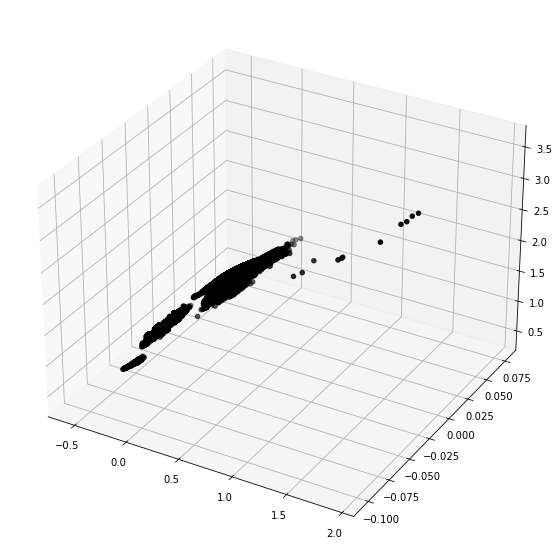

In [75]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(30,10))


ax = fig.add_subplot(1,1,1, projection='3d')



ax.scatter(p3ds[:,[0]],p3ds[:,[1]],p3ds[:,[2]],color = 'black') 

plt.show()

In [71]:
import open3d as o3d
import time

if __name__ == "__main__":
    o3d.utility.set_verbosity_level(o3d.utility.VerbosityLevel.Debug)
    pcd_data = o3d.data.DemoICPPointClouds()
    source_raw = o3d.io.read_point_cloud('data1.ply')

    
    source_raw = source_raw.voxel_down_sample(voxel_size=0.005)

    
    source = source_raw


    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(source)


    for i in range(100):
        time.sleep(.1)
        flip_transform = [[1, 0.1, 0, 0 ],
                          [0, 1, 0, 0], 
                          [0, 0, 1, 0], 
                          [0, 0, 0, 1 ]]
        source.transform(flip_transform)
        vis.update_geometry(source)
        vis.poll_events()
        vis.update_renderer()
        

        flip_transform = np.linalg.inv(np.array(flip_transform))

        source.transform(flip_transform)
        vis.update_geometry(source)
        vis.poll_events()
        vis.update_renderer()

    vis.destroy_window()
    o3d.utility.set_verbosity_level(o3d.utility.VerbosityLevel.Info)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D DEBUG] Format auto File data1.ply
[Open3D WARNING] Read PLY failed: unable to open file: data1.ply
[Open3D DEBUG] Read geometry::PointCloud: 0 vertices.
[Open3D DEBUG] Pointcloud down sampled from 0 points to 0 points.
[Open3D DEBUG] GLFW init.
[Open3D DEBUG] Add geometry and update bounding box to [(0.0000, 0.0000, 0.0000) - (0.0000, 0.0000, 0.0000)]
